<a href="https://colab.research.google.com/github/melomi1010/Python/blob/main/%E7%AC%AC%E5%8D%81%E4%BA%8C%E5%B0%88%E9%A1%8C_%E5%8F%B0%E5%8C%97%E5%B8%82%E9%95%B7%E9%81%B8%E8%88%890714_0720%E9%81%B8%E8%88%89%E7%9B%B8%E9%97%9C%E7%B6%B2%E8%B7%AF%E8%81%B2%E9%87%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 台北市長選舉07/14-07/20選舉相關網路聲量

## Targets:

##1. 爬取PTT八卦版、政黑板以及Dcard時事版7/14-7/20台北市長選舉相關文章
##2. 對留言進行文字探勘及自然語言處理和情緒分析
##3. 計算各參選人網路聲量

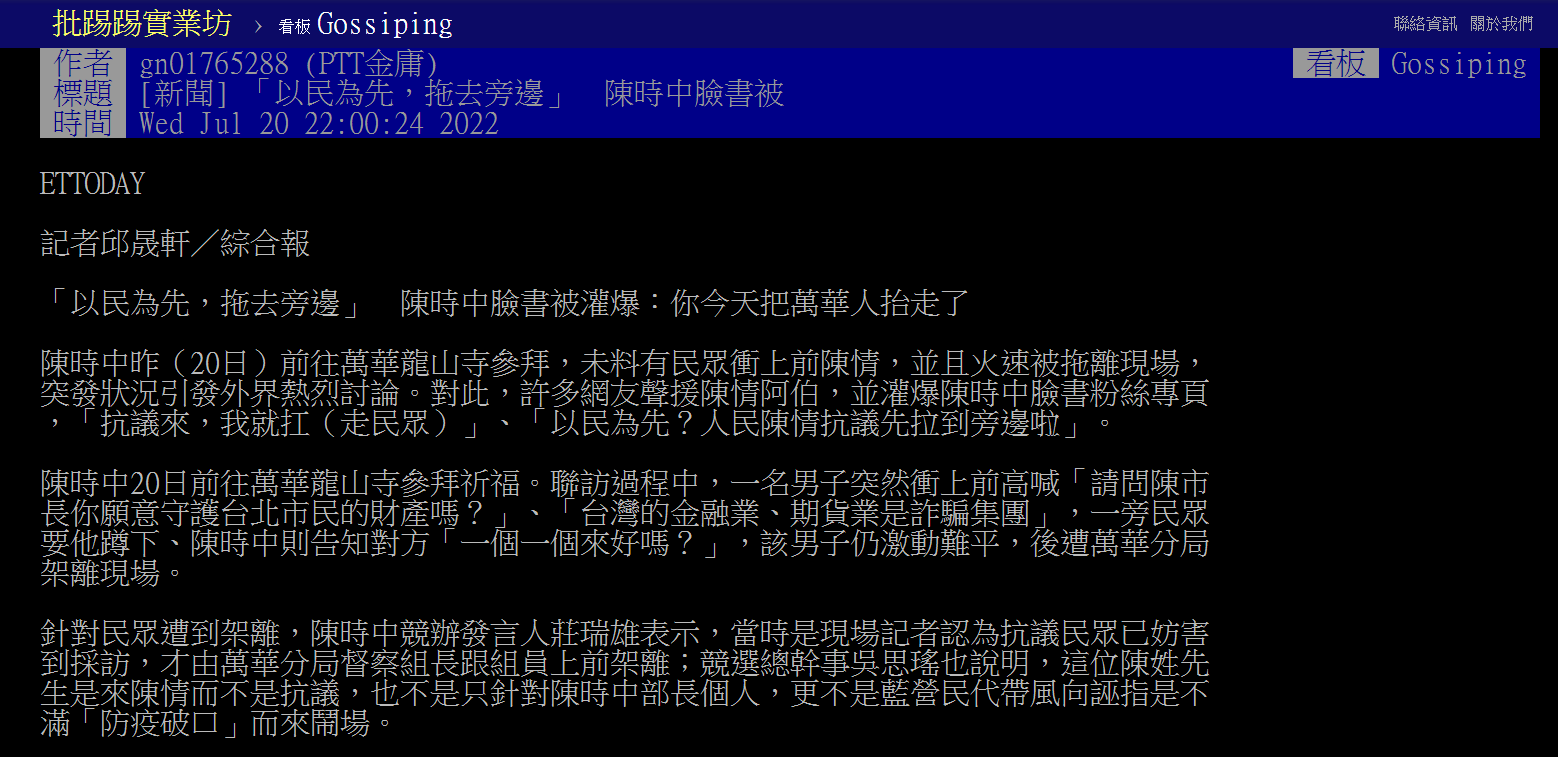

In [ ]:
from selenium import webdriver
import time
import pandas as pd
from datetime import datetime

In [ ]:
# 可以去掉 python 輸出時，因為軟體版本所引起的警告的警告。
import warnings
warnings.filterwarnings('ignore')

## 1.網頁爬取

### PTT八卦版

https://www.ptt.cc/bbs/Gossiping/index.html

設定cookies並開啟八卦版

In [ ]:
driver = webdriver.Chrome("chromedriver.exe")
driver.get("https://www.ptt.cc/bbs/Gossiping/index.html")

# Adds the cookie into current browser context
driver.add_cookie({'name':'over18','value':'1'})

time.sleep(3)
driver.get("https://www.ptt.cc/bbs/Gossiping/index.html")

[{'domain': 'www.ptt.cc', 'httpOnly': False, 'name': 'over18', 'path': '/', 'secure': True, 'value': '1'}, {'domain': '.ptt.cc', 'expiry': 1658382370, 'httpOnly': False, 'name': '_gat', 'path': '/', 'secure': False, 'value': '1'}, {'domain': '.ptt.cc', 'expiry': 1658468710, 'httpOnly': False, 'name': '_gid', 'path': '/', 'secure': False, 'value': 'GA1.2.1365257593.1658382310'}, {'domain': '.ptt.cc', 'expiry': 1721454310, 'httpOnly': False, 'name': '_ga', 'path': '/', 'secure': False, 'value': 'GA1.2.72765284.1658382310'}]


爬取文章連結

In [ ]:
begin = datetime.date(datetime.strptime(str('2022/07/14'),'%Y/%m/%d')) #設定初始日期，做計算日期用
title_list = []
url_list = []
time_check = 1
time.sleep(3)

while time_check > 0:        
    r = driver.find_elements_by_class_name('r-ent') #每篇文章
    for article in r:
        date = article.find_element_by_class_name('date') #每篇文章中的日期
        title = article.find_element_by_class_name('title') #每篇文章中的標題
        #每篇文章中的連結，若文章被刪除設為None
        try:
            url = title.find_element_by_tag_name("a").get_attribute("href") 
        except:
            url = 'None'
        print(url)
        
        now = datetime.date(datetime.strptime(str('2022/'+date.text),'%Y/%m/%d')) #此篇文章日期
        if (now-begin).days >= 0 and (now-begin).days < 8: #計算以初始日期為準的七天內
            print(date.text)
            print(title.text)
            title_list.append(title.text)
            url_list.append(url)
            
    #判斷下一頁是否含有日期範圍內文章        
    time_check = 0
    driver.find_element_by_xpath('//*[@id="action-bar-container"]/div/div[2]/a[2]').click() #點擊進入下一頁
    time.sleep(1)
    check = driver.find_elements_by_class_name('date')
    for date in check:
        now = datetime.date(datetime.strptime(str('2022/'+date.text),'%Y/%m/%d'))
        if (now-begin).days >= 0 and (now-begin).days < 8:
            time_check += 1

7/21
[新聞] 空軍公布共機西南空域動態　廣播驅離飛彈
https://www.ptt.cc/bbs/Gossiping/M.1658332846.A.718.html
7/21
[問卦] IG一堆在那邊hey三小
https://www.ptt.cc/bbs/Gossiping/M.1658332906.A.7D5.html
7/21
(已被ubcs刪除) <chirex>泛政治
None
7/21
[問卦] 蔡阿嘎成立社福慈善機構 酸民484無地自容
https://www.ptt.cc/bbs/Gossiping/M.1658332910.A.911.html
7/21
Re: [新聞] 受論文門影響 國民黨最新民調：張善政贏
https://www.ptt.cc/bbs/Gossiping/M.1658332930.A.92E.html
7/21
[新聞] 被批落跑部長 陳時中：沒有道理！我已做9
https://www.ptt.cc/bbs/Gossiping/M.1658332960.A.87D.html
7/21
[新聞] 美前防長建議男女皆兵 林伯豐：台灣不
https://www.ptt.cc/bbs/Gossiping/M.1658332992.A.A92.html
7/21
[新聞] 對陳時中喊「金融業詐騙集團」遭架走阿北
https://www.ptt.cc/bbs/Gossiping/M.1658333004.A.62C.html
7/21
[新聞] 安倍之死真相指向中聯部
https://www.ptt.cc/bbs/Gossiping/M.1658333022.A.853.html
7/21
[問卦] 為何有些低收入又租房者小孩狂生一堆?
https://www.ptt.cc/bbs/Gossiping/M.1658333028.A.B3E.html
7/21
Re: [問卦] 北市擺爛24年 其他縣市是不是都是廢墟
https://www.ptt.cc/bbs/Gossiping/M.1658333047.A.098.html
7/21
[新聞] 用「裁判時法律」味全3千萬遭沒 想保不
https://www.ptt.cc/bbs/Gossiping/M.1658333110.A.9CF.html
7/21
[問卦] 台灣人這麼喜

7/20
Re: [問卦] 萬華抗議民眾為何會被架走？
https://www.ptt.cc/bbs/Gossiping/M.1658328743.A.59E.html
7/20
Re: [新聞] 「以民為先，拖去旁邊」　陳時中臉書被
https://www.ptt.cc/bbs/Gossiping/M.1658328766.A.8DB.html
7/20
[問卦] 最新免簽數量國家排行榜
https://www.ptt.cc/bbs/Gossiping/M.1658328798.A.EA5.html
7/20
(本文已被刪除) [lazack]
None
7/20
Re: [問卦] 投資型保單投報率棒到爆，但肥宅超討厭？
https://www.ptt.cc/bbs/Gossiping/M.1658328842.A.900.html
7/20
Re: [新聞] 中國停貸危機 專家：中央地方無力救
https://www.ptt.cc/bbs/Gossiping/M.1658328868.A.DFA.html
7/20
[問卦] 急! 音樂方面 姊姊魏如萱 妹妹魏如昀 選?
https://www.ptt.cc/bbs/Gossiping/M.1658328894.A.011.html
7/20
[問卦] 當年蕭敬騰實力有多強??????????????????
https://www.ptt.cc/bbs/Gossiping/M.1658329035.A.BEA.html
7/20
[問卦] 現在不丟雞蛋要丟甚麼
https://www.ptt.cc/bbs/Gossiping/M.1658329128.A.A8D.html
7/20
[爆卦] 中國男籃止步亞洲盃8強！！
https://www.ptt.cc/bbs/Gossiping/M.1658329156.A.51D.html
7/20
(本文已被刪除) [k385476916]
None
7/20
Re: [新聞] 不演了！民宿老闆一聽用國旅補助 秒改口
https://www.ptt.cc/bbs/Gossiping/M.1658329257.A.F4B.html
7/20
[新聞] 桃園高鐵站前建案工人墜樓 桃勞檢處勒令
https://www.ptt.cc/bbs/Gossiping/M.16583

7/20
[問卦] 現在考駕照還要學手排嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658324775.A.817.html
7/20
Re: [問卦] 文組博士到底都在做什麼
https://www.ptt.cc/bbs/Gossiping/M.1658324784.A.537.html
7/20
[問卦] 新公司不習慣會想回老東家嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658324814.A.142.html
7/20
[新聞] 7都高薪公司名單揭曉！　這間科技公司均
https://www.ptt.cc/bbs/Gossiping/M.1658324853.A.494.html
7/20
Re: [問卦] 2022到現在，說一件今年振奮人心的好事吧
https://www.ptt.cc/bbs/Gossiping/M.1658324922.A.280.html
7/20
[問卦] 為什麼女生寧可追劇也要把自己放到過期？
https://www.ptt.cc/bbs/Gossiping/M.1658324965.A.C26.html
7/20
[問卦] 當年警察亂打太陽花學生,你們有去譴責嗎?
https://www.ptt.cc/bbs/Gossiping/M.1658325039.A.463.html
7/20
(本文已被刪除) [bota]
None
7/20
[問卦] 拜大黑佛母有什麼好處？
https://www.ptt.cc/bbs/Gossiping/M.1658325149.A.61F.html
7/20
[問卦] 美國建議台灣男女皆需當兵一年？
https://www.ptt.cc/bbs/Gossiping/M.1658325178.A.1AB.html
7/20
[問卦] 補鐵質的保健食品 用磁鐵吸都沒反應
https://www.ptt.cc/bbs/Gossiping/M.1658325209.A.940.html
7/20
(本文已被刪除) [mailiao]
None
7/20
Re: [問卦] Energy其實不是輸在合約是Toro吧?
https://www.ptt.cc/bbs/Gossiping/M.1658325326.A.ACE.html
7/20


7/20
[問卦] 電漲蛋漲代表台灣人抗壓性很強吧
https://www.ptt.cc/bbs/Gossiping/M.1658320083.A.5A0.html
7/20
[新聞] 彩虹社VTuber跟日本中央聯盟球隊合作！7月26日（二）晚上9
https://www.ptt.cc/bbs/Gossiping/M.1658320093.A.1CF.html
7/20
Re: [問卦] 投資型保單投報率棒到爆，但肥宅超討厭？
https://www.ptt.cc/bbs/Gossiping/M.1658320151.A.3D2.html
7/20
[問卦] 為什麼沒有台灣記者再去找日明星問王柏融
https://www.ptt.cc/bbs/Gossiping/M.1658320164.A.3D9.html
7/20
[問卦] 不是說熊貓外送要拍照? 結果放門口沒拍?
https://www.ptt.cc/bbs/Gossiping/M.1658320169.A.72B.html
7/20
Re: [新聞] 七都高薪公司名單全出爐 「科技新貴」沒
https://www.ptt.cc/bbs/Gossiping/M.1658320183.A.D1B.html
7/20
[新聞] 農曆七月鬼門開！晚上不吹口哨、少靠牆走　命理師曝13大旅遊
https://www.ptt.cc/bbs/Gossiping/M.1658320188.A.233.html
7/20
Re: [新聞] 這畫面真諷刺！陳時中默默「看他被架走」
https://www.ptt.cc/bbs/Gossiping/M.1658320237.A.1E7.html
7/20
[問卦] 基層公務員兼職的首選是當外送員嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658320261.A.500.html
7/20
[問卦] 有月入三萬、年存四十萬的八卦嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658320352.A.F87.html
7/20
[問卦] 今天是老朱到龍山寺參拜會怎樣
https://www.ptt.cc/bbs/Gossiping/M.1658320525.A.7CA.html
7/20
[問卦] 大家會不習慣脫口罩嗎?

[問卦] 孟嘗君聽到債券被燒了在想什麼
https://www.ptt.cc/bbs/Gossiping/M.1658317966.A.2E4.html
7/20
[問卦] 外勞視力都很好嗎@@？？？
https://www.ptt.cc/bbs/Gossiping/M.1658316460.A.A68.html
7/20
[問卦] 野小百合
https://www.ptt.cc/bbs/Gossiping/M.1658316509.A.59E.html
7/20
(本文已被刪除) [kauosong]
None
7/20
Re: [新聞] 民眾鬧場被架離！陳時中被批是「雙面人」
https://www.ptt.cc/bbs/Gossiping/M.1658316553.A.59F.html
7/20
[問卦] 如果是館長身材的會被拖走嗎
https://www.ptt.cc/bbs/Gossiping/M.1658316597.A.A16.html
7/20
[新聞] 俄羅斯盟國敘利亞宣布與烏克蘭斷交
https://www.ptt.cc/bbs/Gossiping/M.1658316605.A.D61.html
7/20
[問卦] 甲甲在私密處紋身有加分嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658316618.A.C9B.html
7/20
[新聞] 北市士林電線桿遭雷擊！慘釀百戶停電
https://www.ptt.cc/bbs/Gossiping/M.1658316639.A.28C.html
7/20
[問卦] 認為 以民為主 的人是不是搞錯了甚麼?
https://www.ptt.cc/bbs/Gossiping/M.1658316677.A.DAF.html
7/20
Re: [問卦] 美國好市多全資投台灣，法國家樂福卻賣台灣的卦？
https://www.ptt.cc/bbs/Gossiping/M.1658316694.A.096.html
7/20
[問卦] 酷拉皮卡為什麼前後改變那麼大？
https://www.ptt.cc/bbs/Gossiping/M.1658316785.A.56A.html
7/20
[問卦] 如果鄭南榕被大蛇丸穢土轉生
https://www.ptt.cc/bbs/Gossip

7/20
[問卦] 看到有人在扛人可以跟著扛嗎
https://www.ptt.cc/bbs/Gossiping/M.1658312885.A.A99.html
7/20
[問卦] 有沒有Google鍵盤補全怪怪的八卦
https://www.ptt.cc/bbs/Gossiping/M.1658312969.A.A6B.html
7/20
Re: 為什麼醜男還沒絕跡？
https://www.ptt.cc/bbs/Gossiping/M.1658313002.A.019.html
7/20
[問卦] 乾哥殺了我女性夥伴的老爸？！
https://www.ptt.cc/bbs/Gossiping/M.1658313021.A.8B7.html
7/20
Re: [問卦] Line pay跟一卡通money到底是怎樣啊
https://www.ptt.cc/bbs/Gossiping/M.1658313031.A.900.html
7/20
[問卦] 失業了怎麼跟家人說？
https://www.ptt.cc/bbs/Gossiping/M.1658313071.A.6EF.html
7/20
[問卦] 新聞加入斗內機制有助於提升品質嗎
https://www.ptt.cc/bbs/Gossiping/M.1658313166.A.FCF.html
7/20
[問卦] 在Ptt對時事批評半天 結果一人到場抗議
https://www.ptt.cc/bbs/Gossiping/M.1658313197.A.976.html
7/20
[新聞] 河南村鎮銀行最早吹哨人 二年前被電視認罪
https://www.ptt.cc/bbs/Gossiping/M.1658313201.A.FB6.html
7/20
[問卦] 我媽要幫我刺青 推薦四個字？
https://www.ptt.cc/bbs/Gossiping/M.1658313237.A.66F.html
7/20
[問卦] 「把人扛走」怎麼講比較民主？
https://www.ptt.cc/bbs/Gossiping/M.1658313258.A.1FF.html
7/20
[新聞] 美驅逐艦航經臺灣海峽　國軍全程掌握海空
https://www.ptt.cc/bbs/Gossiping/M.1658313365.A

7/20
Re: [新聞] 這畫面真諷刺！陳時中默默「看他被架走」
https://www.ptt.cc/bbs/Gossiping/M.1658308396.A.0AD.html
7/20
Re: [新聞] 馬斯克首曝曾與「另一個我」交談 已將大
https://www.ptt.cc/bbs/Gossiping/M.1658308536.A.1F0.html
7/20
[問卦] 衛生股長越來越囂張該怎辦
https://www.ptt.cc/bbs/Gossiping/M.1658308553.A.D64.html
7/20
[問卦] 您認為犯什麼罪一定要公布其姓名呢？
https://www.ptt.cc/bbs/Gossiping/M.1658308623.A.EBC.html
7/20
Re: [問卦] 台灣進入大拉人沒事的時代了嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658308667.A.90A.html
7/20
[新聞] 雞蛋漲價原因曝！旅遊復甦+飼料變貴　農
https://www.ptt.cc/bbs/Gossiping/M.1658308673.A.59C.html
7/20
[新聞] 路透：中國阻止聯合國人權專員公布新疆報
https://www.ptt.cc/bbs/Gossiping/M.1658308719.A.E30.html
7/20
[問卦] 把人拖走/架走，有比較委婉的說法嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658308759.A.61A.html
7/20
Re: [新聞] 林佳龍專訪再提恩恩案 砲打侯友宜「沒有
https://www.ptt.cc/bbs/Gossiping/M.1658308782.A.0F7.html
7/20
[問卦] 梅根遭鄰居取綽號「蒙特斯托公主」！「一
https://www.ptt.cc/bbs/Gossiping/M.1658308825.A.B5E.html
7/20
[問卦] 什麼方式可以穿比不穿還涼？
https://www.ptt.cc/bbs/Gossiping/M.1658308857.A.020.html
7/20
Re: [新聞] 這畫面真諷刺！陳時中默默「看他被架走」
https://www.p

(已被lwt501cx刪除) <compass9981>回文政問
None
7/20
Re: [問卦] 萬華抗議民眾為何會被架走？
https://www.ptt.cc/bbs/Gossiping/M.1658304987.A.F59.html
7/20
[新聞] 喪家請吃便當…250人葬禮集體中毒送醫！
https://www.ptt.cc/bbs/Gossiping/M.1658304995.A.28B.html
7/20
Re: [問卦] 請問一下拖走抗議民眾的法源依據是？
https://www.ptt.cc/bbs/Gossiping/M.1658305055.A.55F.html
7/20
(本文已被刪除) [topchris]
None
7/20
Re: [新聞] 陳時中突遇萬華抗議民眾！　她見現場「1
https://www.ptt.cc/bbs/Gossiping/M.1658305077.A.C51.html
7/20
Re: [問卦] 啊不是不用戴口罩騎車了 怎都戴著？
https://www.ptt.cc/bbs/Gossiping/M.1658305134.A.CAF.html
7/20
[問卦] 台灣終於跟上世界了嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658305136.A.27E.html
7/20
(本文已被刪除) [DoncicInPTT]
None
7/20
[新聞] 資優生第一志願不再是醫學系！過來人力推
https://www.ptt.cc/bbs/Gossiping/M.1658305185.A.251.html
7/20
[問卦] 外送員在路邊碎唸怎麼沒訂單
https://www.ptt.cc/bbs/Gossiping/M.1658305186.A.02D.html
7/20
[問卦] 去新竹看棒賽要配什麼吃才專業
https://www.ptt.cc/bbs/Gossiping/M.1658305213.A.C25.html
7/20
[問卦] 吹冷氣好冷哦！！怎辦？？？
https://www.ptt.cc/bbs/Gossiping/M.1658305220.A.2C6.html
7/20
[問卦] 那家防疫險理賠最乾脆？
https://www.ptt.cc/bbs/Go

[問卦] 有沒有富邦產險輸不起的八卦
https://www.ptt.cc/bbs/Gossiping/M.1658300817.A.A7D.html
7/20
Re: [問卦] 哇塞！台灣人均月總薪資62736元？睪丸梗
https://www.ptt.cc/bbs/Gossiping/M.1658300829.A.B05.html
7/20
(本文已被刪除) [vdml]
None
7/20
Re: [問卦] 眼鏡貴的差在哪裡？
https://www.ptt.cc/bbs/Gossiping/M.1658300937.A.5A6.html
7/20
Re: [新聞] 陳時中參拜龍山寺遇抗議民眾秒
https://www.ptt.cc/bbs/Gossiping/M.1658301163.A.953.html
7/20
Re: [新聞] 陳時中突遇萬華抗議民眾！　她見現場「1
https://www.ptt.cc/bbs/Gossiping/M.1658301184.A.C3C.html
7/20
[問卦] 台大國發所都在研究什麼？
https://www.ptt.cc/bbs/Gossiping/M.1658301238.A.862.html
7/20
[問卦] 劇本要整套演完才算完整,有人看過嗎?
https://www.ptt.cc/bbs/Gossiping/M.1658301244.A.81B.html
7/20
[問卦] 全雜魚運動會
https://www.ptt.cc/bbs/Gossiping/M.1658301254.A.074.html
7/20
[問卦] 這樣算劈腿嗎
https://www.ptt.cc/bbs/Gossiping/M.1658301299.A.21B.html
7/20
[問卦] 散步不用戴口罩？那散步的定義是？
https://www.ptt.cc/bbs/Gossiping/M.1658301465.A.BFB.html
7/20
[問卦] 王心凌39歲 溫妮32歲 泱泱31歲？
https://www.ptt.cc/bbs/Gossiping/M.1658301493.A.8E4.html
7/20
Re: [問卦] 眼球電視台替Gay 捐血發聲，你支持嗎？
https://www.ptt.cc/bbs/Goss

https://www.ptt.cc/bbs/Gossiping/M.1658297161.A.484.html
7/20
[爆卦] 本土+26943 境外+253 死亡+57
https://www.ptt.cc/bbs/Gossiping/M.1658297167.A.11F.html
7/20
(本文已被刪除) [CLOSED]
None
7/20
[問卦] 趙雲當初怎會選擇加入大耳劉集團
https://www.ptt.cc/bbs/Gossiping/M.1658297224.A.46E.html
7/20
[問卦] 老婆在旁邊如何看大奶正妹？
https://www.ptt.cc/bbs/Gossiping/M.1658297231.A.566.html
7/20
[問卦] 不缺蛋只是需求大增?????
https://www.ptt.cc/bbs/Gossiping/M.1658297279.A.D7A.html
7/20
[問卦] 絕命外送師要怎麼拍？
https://www.ptt.cc/bbs/Gossiping/M.1658297297.A.219.html
7/20
[問卦] 指揮官的太太是原諒他了沒啊？
https://www.ptt.cc/bbs/Gossiping/M.1658297356.A.8A7.html
7/20
[問卦] 台灣版的幽遊白書真人版該怎麼選?
https://www.ptt.cc/bbs/Gossiping/M.1658297357.A.52A.html
7/20
[新聞] 熱爆!冰塊需求量大 製冰業者擬下月調漲
https://www.ptt.cc/bbs/Gossiping/M.1658297358.A.911.html
7/20
Re: [問卦] 有幾%的工程師年收沒破百？
https://www.ptt.cc/bbs/Gossiping/M.1658297359.A.FFE.html
7/20
[新聞] 林佳龍︰受總統啟發參選新北 「草船借箭
https://www.ptt.cc/bbs/Gossiping/M.1658297416.A.98E.html
7/20
[問卦] 有什麼系所台大有 卻不是最頂的?
https://www.ptt.cc/bbs/Gossiping/M.1658297422.A.0D

7/20
[問卦] 自住真的不怕跌嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658293748.A.E37.html
7/20
[問卦] 生魚片有股酸味是什麼意思？
https://www.ptt.cc/bbs/Gossiping/M.1658293896.A.A0C.html
7/20
[問卦] 是什麼東西佔營業成本最大宗
https://www.ptt.cc/bbs/Gossiping/M.1658293908.A.C1A.html
7/20
Re: [問卦] 人的體內真的很多蟲？
https://www.ptt.cc/bbs/Gossiping/M.1658293945.A.FA4.html
7/20
Re: [問卦]～（＠ｏ＠）～急！星巴克餐點怎麼點？
https://www.ptt.cc/bbs/Gossiping/M.1658293983.A.1B4.html
7/20
Re: [問卦] ／｜｜｜＼爭鮮那麼難吃，怎麼那麼多人去吃？
https://www.ptt.cc/bbs/Gossiping/M.1658293983.A.34F.html
7/20
[新聞] 村莊辦葬禮！喪主「好心舉動」慘釀250人
https://www.ptt.cc/bbs/Gossiping/M.1658294054.A.AFC.html
7/20
Re: [新聞] 日本妹曝「台男1舉動」超NG！機車族哭了
https://www.ptt.cc/bbs/Gossiping/M.1658294127.A.B54.html
7/20
[問卦] 35 36歲了補有的沒的學歷?
https://www.ptt.cc/bbs/Gossiping/M.1658294132.A.01F.html
7/20
[問卦] 底薪沒六萬 年薪破百萬是不是很噁心
https://www.ptt.cc/bbs/Gossiping/M.1658294167.A.DDF.html
7/20
[新聞] 陳其邁愛裸睡！陳建仁驚看他上空　過程曝
https://www.ptt.cc/bbs/Gossiping/M.1658294215.A.308.html
7/20
[問卦] 腰跟腳底板，哪邊比較怕癢？
https://www.ptt.cc/bbs/Gossiping/M.165

https://www.ptt.cc/bbs/Gossiping/M.1658291135.A.162.html
7/20
[新聞] 提萬華願景 陳時中：文化底蘊+智慧城市
https://www.ptt.cc/bbs/Gossiping/M.1658291241.A.2D8.html
7/20
Re: [問卦] 追有男友的女生，對手只有一個真的嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658291272.A.387.html
7/20
[問卦] 統一若要改家樂福名該取啥名好？
https://www.ptt.cc/bbs/Gossiping/M.1658291328.A.9D1.html
7/20
[新聞] 「顧家鄉、拚未來」 民進黨社群3箭齊發
https://www.ptt.cc/bbs/Gossiping/M.1658291332.A.F10.html
7/20
[新聞] 澎湖大義宮海龜困「許願池」少活70年！
https://www.ptt.cc/bbs/Gossiping/M.1658291336.A.1AA.html
7/20
[新聞] 30歲男歌手驚傳「睡夢中吐血昏迷」爆
https://www.ptt.cc/bbs/Gossiping/M.1658291365.A.987.html
7/20
[問卦] 急!麥當勞肯德基誰才能吃飽
https://www.ptt.cc/bbs/Gossiping/M.1658291367.A.478.html
7/20
[問卦] 女生60公斤算胖麼？
https://www.ptt.cc/bbs/Gossiping/M.1658291385.A.383.html
7/20
[問卦] 有沒有德國擁核民調爆增的卦？
https://www.ptt.cc/bbs/Gossiping/M.1658291399.A.6A9.html
7/20
[新聞] 酒友家喝醉！8旬淫翁見22歲嫩妹房客秒
https://www.ptt.cc/bbs/Gossiping/M.1658291404.A.CE2.html
7/20
Re: [問卦] 美國為何禁止日本建立軍隊？
https://www.ptt.cc/bbs/Gossiping/M.1658290034.A.F42.html
7/20
[新聞] 

7/20
Re: [問卦] 琉球人還想脫離日本獨立嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658286985.A.651.html
7/20
(本文已被刪除) [ClownT]
None
7/20
[問卦] 25處男被當砲友該如何調適？
https://www.ptt.cc/bbs/Gossiping/M.1658287028.A.8BD.html
7/20
[問卦] WNBA可以看的到飛身暴扣嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658287032.A.589.html
7/20
[新聞] 慎入！妙齡女背部長出罕見「巨蟲」 醫師
https://www.ptt.cc/bbs/Gossiping/M.1658287051.A.EA1.html
7/20
Re: [問卦] 文組朋友說：理工科的快被人工智慧取代
https://www.ptt.cc/bbs/Gossiping/M.1658287088.A.DD7.html
7/20
[問卦] 護士這麼正 醫師忍得住不外遇？
https://www.ptt.cc/bbs/Gossiping/M.1658287203.A.EAD.html
7/20
Re: [新聞] 酸林佳龍被基進解除黨職 張博洋再道歉：
https://www.ptt.cc/bbs/Gossiping/M.1658287207.A.F85.html
7/20
[問卦] 誇張！台灣大雞排$146！
https://www.ptt.cc/bbs/Gossiping/M.1658287241.A.715.html
7/20
Re: [問卦] 爭鮮那麼難吃，怎麼那麼多人去吃？
https://www.ptt.cc/bbs/Gossiping/M.1658287274.A.F9E.html
7/20
[問卦] 有人喜歡0卡可樂嗎
https://www.ptt.cc/bbs/Gossiping/M.1658287275.A.50E.html
7/20
Re: [問卦] 琉球人還想脫離日本獨立嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658285671.A.792.html
7/20
[爆卦] 波蘭可能向韓國軍購總價70億美元的大單
https://ww

https://www.ptt.cc/bbs/Gossiping/M.1658283414.A.DF0.html
7/20
Re: [新聞] 美國海關驚魂記！台妞飛抵舊金山機場苦等
https://www.ptt.cc/bbs/Gossiping/M.1658283434.A.580.html
7/20
Re: [新聞]啟用ACC沒看路出事了！休旅國道猛撞工程車
https://www.ptt.cc/bbs/Gossiping/M.1658283471.A.611.html
7/20
[問卦] 紀淑如是T嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658283473.A.836.html
7/20
Re: [問卦] 口腔潰瘍怎麼可以快點好（認真
https://www.ptt.cc/bbs/Gossiping/M.1658283492.A.994.html
7/20
Re: [問卦] 有沒有統一教開始滲透小學的八卦?
https://www.ptt.cc/bbs/Gossiping/M.1658283549.A.BEC.html
7/20
Re: [問卦] 現在用非注音輸入法的年輕人多嗎
https://www.ptt.cc/bbs/Gossiping/M.1658283553.A.F0D.html
7/20
(本文已被刪除) [chter]
None
7/20
Re: [問卦] 減碳是不是詐騙
https://www.ptt.cc/bbs/Gossiping/M.1658282001.A.14B.html
7/20
[問卦] 新竹人是不是很幸福？
https://www.ptt.cc/bbs/Gossiping/M.1658282021.A.455.html
7/20
Re: [問卦] 要發生什麼事，死忠仔才不再死忠？
https://www.ptt.cc/bbs/Gossiping/M.1658282034.A.0BD.html
7/20
Re: [問卦] 未來房價靠什麼支撐？
https://www.ptt.cc/bbs/Gossiping/M.1658282128.A.047.html
7/20
[問卦] 爐渣地圖多久沒更新了？
https://www.ptt.cc/bbs/Gossiping/M.1658282298.A.

https://www.ptt.cc/bbs/Gossiping/M.1658278082.A.E6E.html
7/20
(本文已被刪除) [violetking]
None
7/20
Re: [問卦] 超商超市都買量販通路了，全家買什麼？
https://www.ptt.cc/bbs/Gossiping/M.1658278193.A.BA2.html
7/20
Re: [新聞] 快訊／統一、統一超重訊！確定收購家樂
https://www.ptt.cc/bbs/Gossiping/M.1658278286.A.9EA.html
7/20
[問卦] 本人有姐姐有妹妹有媽媽就是沒有女友怎
https://www.ptt.cc/bbs/Gossiping/M.1658278445.A.314.html
7/20
[問卦] 有沒有消暑良方的八卦？
https://www.ptt.cc/bbs/Gossiping/M.1658278457.A.0A5.html
7/20
Re: [新聞] 林佳龍:若當選 補助新北65歲以上長輩裝假牙
https://www.ptt.cc/bbs/Gossiping/M.1658278475.A.4AF.html
7/20
[問卦] MIC 和MIT 哪個品質更值得信賴?
https://www.ptt.cc/bbs/Gossiping/M.1658278553.A.7D9.html
7/20
[新聞] 《賽馬娘》人氣超旺　父掏30年前賽馬卷
https://www.ptt.cc/bbs/Gossiping/M.1658276085.A.CFB.html
7/20
[問卦] 朋友性幻想對象是茉莉兒？
https://www.ptt.cc/bbs/Gossiping/M.1658276180.A.4A3.html
7/20
[新聞] 台灣半年死亡人數，慘破10萬
https://www.ptt.cc/bbs/Gossiping/M.1658276244.A.650.html
7/20
[問卦] 為何流行胸部挖洞的衣服？
https://www.ptt.cc/bbs/Gossiping/M.1658276274.A.B07.html
7/20
[新聞] 葉倫狂捧韓晶片業 台積電失寵？網曝老美
https://www.ptt.cc/bbs/Gos

7/20
(本文已被刪除) [walkmaster]
None
7/20
Re: [問卦] 會買榜的是否也會買網軍？
https://www.ptt.cc/bbs/Gossiping/M.1658263991.A.122.html
7/20
[問卦] 魔物獵人開場最重要的是斷尾嗎
https://www.ptt.cc/bbs/Gossiping/M.1658264365.A.152.html
7/20
Re: [新聞] 雞蛋缺很大」日缺百萬顆以上 明起雞蛋價
https://www.ptt.cc/bbs/Gossiping/M.1658264704.A.1A5.html
7/20
Re: [新聞] 快訊／統一、統一超重訊！確定收購家樂
https://www.ptt.cc/bbs/Gossiping/M.1658265589.A.0B3.html
7/20
Re: [問卦] 日本484沒救了？？
https://www.ptt.cc/bbs/Gossiping/M.1658265773.A.6EF.html
7/20
[問卦] 為什麼少數的意見可以影響多數人的權益？
https://www.ptt.cc/bbs/Gossiping/M.1658265844.A.E05.html
7/20
Re: [問卦] 現在用非注音輸入法的年輕人多嗎
https://www.ptt.cc/bbs/Gossiping/M.1658266679.A.86F.html
7/20
[問卦] 台北的公務員484超級爽？
https://www.ptt.cc/bbs/Gossiping/M.1658253480.A.D47.html
7/20
Re: [問卦] 開槍轟別人的腦袋會得到快感嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658253775.A.225.html
7/20
[問卦] 竟然有不怕燙的蟑螂？
https://www.ptt.cc/bbs/Gossiping/M.1658254128.A.DA9.html
7/20
[問卦] 光る海に かすむ船は
https://www.ptt.cc/bbs/Gossiping/M.1658254168.A.12D.html
7/20
[新聞] 新北人妻「玩殘男閨蜜」連戰6天都想要
https://www.

7/20
Re: [問卦] 台灣主題樂園前三名怎麼排
https://www.ptt.cc/bbs/Gossiping/M.1658248130.A.4FD.html
7/20
[新聞] 積極修補關係 南韓外長訪日
https://www.ptt.cc/bbs/Gossiping/M.1658248246.A.FD6.html
7/20
[問卦] 家樂福被統一併購後 新老闆第一個動作？
https://www.ptt.cc/bbs/Gossiping/M.1658248251.A.B4A.html
7/20
Re: [問卦] 「這四年你過得好嗎?」2022魔咒應驗了嗎?
https://www.ptt.cc/bbs/Gossiping/M.1658248316.A.BC1.html
7/20
[問卦] 統一再吃下什麼產業就可以控制台灣人了
https://www.ptt.cc/bbs/Gossiping/M.1658248428.A.0E0.html
7/20
[問卦] 有沒有鄉民的偶像
https://www.ptt.cc/bbs/Gossiping/M.1658248489.A.8DA.html
7/20
Re: [新聞] Netflix大動作抓寄生帳號！符合「1條
https://www.ptt.cc/bbs/Gossiping/M.1658248525.A.801.html
7/20
[新聞] 為安倍之死道歉　南韓統一教前會長認：把
https://www.ptt.cc/bbs/Gossiping/M.1658246621.A.8A2.html
7/20
Re: [問卦] 「這四年你過得好嗎?」2022魔咒應驗
https://www.ptt.cc/bbs/Gossiping/M.1658246727.A.025.html
7/20
[問卦] 夏天羊肉不會比較便宜嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658246739.A.D65.html
7/20
[新聞] 統一集團斥資290億元買下台灣家樂福 穩
https://www.ptt.cc/bbs/Gossiping/M.1658246748.A.3A7.html
7/20
[問卦] 震驚..圖奇ET妹 竟然有刺青
https://www.ptt.cc/bbs/Goss

[問卦] 有這一個布袋戲角色的八卦嗎
https://www.ptt.cc/bbs/Gossiping/M.1658244506.A.8C6.html
7/19
(本文已被刪除) [traman]
None
7/19
Re: [問卦] 「這四年你過得好嗎?」2022魔咒應驗了嗎?
https://www.ptt.cc/bbs/Gossiping/M.1658244601.A.C62.html
7/19
[問卦] 網路行銷公司最近在搶生意嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658244637.A.7FF.html
7/19
[問卦]最近怎麼一推藝人廣告枕頭
https://www.ptt.cc/bbs/Gossiping/M.1658244662.A.752.html
7/19
[問卦] 伍佰開演唱會不用自己唱是真的嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658243294.A.182.html
7/19
Re: [問卦] 成龍以前的片為什麼這麼神
https://www.ptt.cc/bbs/Gossiping/M.1658243345.A.1BC.html
7/19
[問卦] 肥宅開車約妹子有加分嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658243381.A.1E6.html
7/19
[問卦] 上班不要看過氣了吧？
https://www.ptt.cc/bbs/Gossiping/M.1658243415.A.FBC.html
7/19
Re: [問卦] 成龍以前的片為什麼這麼神
https://www.ptt.cc/bbs/Gossiping/M.1658243461.A.1AD.html
7/19
Fw: [情報] 拜託大家一起去收容所抽籤認養
https://www.ptt.cc/bbs/Gossiping/M.1658243468.A.77A.html
7/19
[新聞] 護理師被爆和醫師在辦公室「連結」怒提告
https://www.ptt.cc/bbs/Gossiping/M.1658243473.A.CB9.html
7/19
Re: [問卦] 文組朋友說：理工科的快被人工智慧取代
https://www.ptt.cc/bbs/Go

https://www.ptt.cc/bbs/Gossiping/M.1658240165.A.440.html
7/19
(本文已被刪除) [kikiki37]
None
7/19
(本文已被刪除) [assa9647]
None
7/19
Re: [問卦] 醫學系變多到底是不是好事
https://www.ptt.cc/bbs/Gossiping/M.1658240322.A.8E4.html
7/19
Re: [新聞] 雞蛋缺很大」日缺百萬顆以上 明起雞蛋價
https://www.ptt.cc/bbs/Gossiping/M.1658240358.A.55F.html
7/19
[問卦] 男女一起當義務役的話集合會花多久
https://www.ptt.cc/bbs/Gossiping/M.1658238857.A.039.html
7/19
Re: [爆卦] 竹北房價破8字頭了
https://www.ptt.cc/bbs/Gossiping/M.1658238873.A.DCA.html
7/19
[問卦] 二壘妹怎麼變成這樣？
https://www.ptt.cc/bbs/Gossiping/M.1658238887.A.921.html
7/19
Re: [新聞] 林佳龍：若當選 補助新北65歲以上長輩裝
https://www.ptt.cc/bbs/Gossiping/M.1658238997.A.E33.html
7/19
[問卦] 撿到以前的CD片該怎麼處理的八卦?
https://www.ptt.cc/bbs/Gossiping/M.1658239046.A.3A7.html
7/19
Re: [問卦] 未來房價靠什麼支撐？
https://www.ptt.cc/bbs/Gossiping/M.1658239135.A.004.html
7/19
[問卦] 震撼彈！十點比基尼？（圖
https://www.ptt.cc/bbs/Gossiping/M.1658239144.A.DB0.html
7/19
[問卦] 蔡淑臻、秦嵐兩個都演外科醫生鄉民會選誰
https://www.ptt.cc/bbs/Gossiping/M.1658239176.A.DC2.html
7/19
Re: [新聞] 「芭比Q了」、「yyds」是什麼意思？時下
htt

Re: [問卦] 防疫至今最荒謬的措施是哪一項？
https://www.ptt.cc/bbs/Gossiping/M.1658236278.A.903.html
7/19
[問卦] 冷氣開一整晚不關是不是很爽
https://www.ptt.cc/bbs/Gossiping/M.1658234647.A.5BE.html
7/19
[問卦] sou sou 怎麼念才正確？
https://www.ptt.cc/bbs/Gossiping/M.1658234651.A.0BF.html
7/19
[問卦] 會被網路詐騙的人是不是都蠻有自信的
https://www.ptt.cc/bbs/Gossiping/M.1658234660.A.F22.html
7/19
[問卦] 台灣數理用語可否直接用英文？
https://www.ptt.cc/bbs/Gossiping/M.1658234661.A.9D8.html
7/19
[新聞] 中油煉製部弊案第3波追查 前勞工董事陳枝
https://www.ptt.cc/bbs/Gossiping/M.1658234673.A.D1A.html
7/19
[問卦] 漫畫要真人化拍攝就是一個錯吧
https://www.ptt.cc/bbs/Gossiping/M.1658234775.A.147.html
7/19
Re: [新聞] 國立大學畢業月薪26K　妹子面試完秒愣：
https://www.ptt.cc/bbs/Gossiping/M.1658234775.A.74C.html
7/19
[問卦] 出銀行發現對面警察拿槍怎辦????????
https://www.ptt.cc/bbs/Gossiping/M.1658234794.A.412.html
7/19
[新聞] 去化顯卡庫存 傳輝達RTX 40系列中低階將
https://www.ptt.cc/bbs/Gossiping/M.1658234905.A.766.html
7/19
[問卦] SWITCH LITE到底是賣給誰用的 掛????????
https://www.ptt.cc/bbs/Gossiping/M.1658234914.A.5F4.html
7/19
[問卦] 請問這胸的真假？
https://www.ptt.cc/bbs/Gossipi

7/19
[問卦] 韓國總統只做一任五年，有沒有比較好？
https://www.ptt.cc/bbs/Gossiping/M.1658230791.A.C6B.html
7/19
[問卦] 網路時代義務教育是不是廢了
https://www.ptt.cc/bbs/Gossiping/M.1658230794.A.F03.html
7/19
[問卦] 怎麼會覺得退役後打仗就沒你的事?
https://www.ptt.cc/bbs/Gossiping/M.1658230875.A.406.html
7/19
[問卦] 為什麼罰球一輩子練不完？
https://www.ptt.cc/bbs/Gossiping/M.1658230892.A.272.html
7/19
[問卦] 鄉民都不是台北人嗎
https://www.ptt.cc/bbs/Gossiping/M.1658230926.A.5F8.html
7/19
[問卦] 同樣身材嬌小，王心凌就不會顯得腿短？
https://www.ptt.cc/bbs/Gossiping/M.1658230989.A.449.html
7/19
Re: [問卦] 靜思語可以幹嘛
https://www.ptt.cc/bbs/Gossiping/M.1658231049.A.C5F.html
7/19
Re: [問卦] youtuber阿兜仔不教美語走錯了哪一部
https://www.ptt.cc/bbs/Gossiping/M.1658231075.A.516.html
7/19
Re: [新聞] 「民進黨執政才讓台灣有了言論自由」　基
https://www.ptt.cc/bbs/Gossiping/M.1658231103.A.9AD.html
7/19
[問卦] 知名吃到飽餐廳盤子出現蟑螂是怎麼回事？
https://www.ptt.cc/bbs/Gossiping/M.1658231110.A.143.html
7/19
Re: [新聞] 「民進黨執政才讓台灣有了言論自由」　基
https://www.ptt.cc/bbs/Gossiping/M.1658231151.A.AA0.html
7/19
[問卦] 醫學系變多到底是不是好事
https://www.ptt.cc/bbs/Gossiping/M.1658231

[問卦] 曼谷租妻一天6000貴嗎
https://www.ptt.cc/bbs/Gossiping/M.1658228310.A.106.html
7/19
[新聞] 李立群高呼「打仗會死守台灣」挨轟台獨
https://www.ptt.cc/bbs/Gossiping/M.1658226636.A.EF6.html
7/19
[問卦] 如果哥吉拉事件的老婆買50元樂透中頭獎？
https://www.ptt.cc/bbs/Gossiping/M.1658226672.A.278.html
7/19
Re: [問卦] 人有權力後就覺得自己跟神一樣？
https://www.ptt.cc/bbs/Gossiping/M.1658226676.A.C87.html
7/19
[新聞] 爛尾樓風暴中共連出招平息 分析:停貸危機
https://www.ptt.cc/bbs/Gossiping/M.1658226771.A.AE1.html
7/19
[問卦] 跟人約吃飯準時的都會被當白痴對不對？
https://www.ptt.cc/bbs/Gossiping/M.1658226802.A.3F8.html
7/19
[新聞] 共機闖我西南空域　空軍驅離飛彈追監
https://www.ptt.cc/bbs/Gossiping/M.1658226851.A.384.html
7/19
Re: [新聞] 國立大學畢業月薪26K　妹子面試完秒愣：
https://www.ptt.cc/bbs/Gossiping/M.1658226916.A.A58.html
7/19
[問卦] 雙截龍怎麼畫風退化了？
https://www.ptt.cc/bbs/Gossiping/M.1658226927.A.B04.html
7/19
[新聞] 連靜雯落入「Bruce」愛情圈套！5度匯款418萬　幕後19人聯手
https://www.ptt.cc/bbs/Gossiping/M.1658226977.A.A5F.html
7/19
(本文已被刪除) [lazack]
None
7/19
[問卦] F-35掛彈量比F-16還少那買F35幹嘛
https://www.ptt.cc/bbs/Gossiping/M.1658227074.A.DA1.html
7/19
Re: [問卦] 被騙

7/19
[新聞] 南韓官媒：KF-21「獵鷹」戰機首飛33分鐘
https://www.ptt.cc/bbs/Gossiping/M.1658224337.A.AEE.html
7/19
[問卦] 宏達電自己跌下神壇 確定都是蘋果的錯?
https://www.ptt.cc/bbs/Gossiping/M.1658222493.A.4EF.html
7/19
[問卦] 噴水火雞肉飯有這麼不堪？
https://www.ptt.cc/bbs/Gossiping/M.1658222572.A.41A.html
7/19
Re: [問卦] 不全面解除口罩禁令的用意是什麼?
https://www.ptt.cc/bbs/Gossiping/M.1658222638.A.F4A.html
7/19
[問卦] 當年中蘇交惡的時候台灣怎麼沒投共
https://www.ptt.cc/bbs/Gossiping/M.1658222676.A.71E.html
7/19
[問卦] 講到厚顏無恥之人會瞬間想到誰？
https://www.ptt.cc/bbs/Gossiping/M.1658222735.A.FA0.html
7/19
[問卦] 現在還有什麼是不缺 但是需求量大的？
https://www.ptt.cc/bbs/Gossiping/M.1658222782.A.A88.html
7/19
Re: [新聞] 「民進黨執政才讓台灣有了言論自由」　基
https://www.ptt.cc/bbs/Gossiping/M.1658222825.A.63D.html
7/19
[問卦] 女生分手ig設公開？
https://www.ptt.cc/bbs/Gossiping/M.1658222883.A.487.html
7/19
[問卦] 要怎麼面對自己的貧窮?
https://www.ptt.cc/bbs/Gossiping/M.1658222980.A.5EE.html
7/19
[新聞] 日娛／桑原你的飛機頭勒《幽遊白書》真人
https://www.ptt.cc/bbs/Gossiping/M.1658223008.A.50E.html
7/19
Re: [新聞] 民進黨支持度破34％獨霸　國民黨被自己人
https://www.ptt.cc/bbs/Gossiping

7/19
Re: [新聞] 雙城論壇續辦 涉台學者：在九二共識前提
https://www.ptt.cc/bbs/Gossiping/M.1658217989.A.256.html
7/19
Re: [新聞] 台北市長3強拉鋸最新民調出爐　棄保決勝
https://www.ptt.cc/bbs/Gossiping/M.1658218008.A.FD9.html
7/19
Re: [問卦] 四叉貓 拿了什麼好處?
https://www.ptt.cc/bbs/Gossiping/M.1658218099.A.ACB.html
7/19
Re: [新聞] 選陳時中「台北變全球最宜居城市」
https://www.ptt.cc/bbs/Gossiping/M.1658218100.A.189.html
7/19
[問卦] 美女會喜歡照鏡子嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658218117.A.254.html
7/19
Re: [問卦] 人有權力後就覺得自己跟神一樣？
https://www.ptt.cc/bbs/Gossiping/M.1658218217.A.5AF.html
7/19
[問卦] 荷蘭丹麥豬 比台灣豬便宜？
https://www.ptt.cc/bbs/Gossiping/M.1658218258.A.C05.html
7/19
[問卦] 有沒有股票簡訊國際化的八卦？
https://www.ptt.cc/bbs/Gossiping/M.1658218339.A.1C3.html
7/19
Re: [新聞] 穿山甲殺手已不是獸鋏 野化犬隻攻擊成受
https://www.ptt.cc/bbs/Gossiping/M.1658218357.A.E04.html
7/19
[問卦] 未來有沒有可能全人類都要戴帽子？
https://www.ptt.cc/bbs/Gossiping/M.1658218387.A.F0B.html
7/19
[問卦] 臼齒裝金屬假牙異常敏感
https://www.ptt.cc/bbs/Gossiping/M.1658218399.A.881.html
7/19
[問卦] 羽生結弦宣布退役
https://www.ptt.cc/bbs/Gossiping/M.1658218444.

[問卦] 為什麼不敢說戶外不用戴口罩？
https://www.ptt.cc/bbs/Gossiping/M.1658214194.A.76E.html
7/19
Re: [新聞] 口罩令再鬆綁！　機車、單車通勤族、做工
https://www.ptt.cc/bbs/Gossiping/M.1658214267.A.CD5.html
7/19
[問卦] 鯛魚燒跟紅豆餅差在哪?
https://www.ptt.cc/bbs/Gossiping/M.1658214298.A.A8A.html
7/19
[新聞] 民進黨支持度破34％獨霸　國民黨被自己人
https://www.ptt.cc/bbs/Gossiping/M.1658214343.A.6E2.html
7/19
[問卦] 找工作都面試幾間？
https://www.ptt.cc/bbs/Gossiping/M.1658214353.A.1BA.html
7/19
(本文已被刪除) [fraternity]
None
7/19
[問卦] 新香菇品種的八卦
https://www.ptt.cc/bbs/Gossiping/M.1658214427.A.A08.html
7/19
Re: [新聞] 口罩令再鬆綁！　機車、單車通勤族、做工
https://www.ptt.cc/bbs/Gossiping/M.1658214449.A.43D.html
7/19
[問卦] 口罩解一半是來討罵的？
https://www.ptt.cc/bbs/Gossiping/M.1658214450.A.9C8.html
7/19
Re: [問卦] 台灣人怎麼一堆人養黃色柴犬
https://www.ptt.cc/bbs/Gossiping/M.1658214474.A.116.html
7/19
[問卦] 李立群為何被黑
https://www.ptt.cc/bbs/Gossiping/M.1658214492.A.559.html
7/19
(本文已被刪除) [tano]
None
7/19
Re: [新聞] 拾荒翁「無照騎無牌車」　員警心軟劃掉紅單被控貪汙
https://www.ptt.cc/bbs/Gossiping/M.1658214536.A.432.html
7/19
Re: [問卦] 新竹市棒球場 為什麼可以忍受

[問卦] 周杰倫新歌MV問題請教
https://www.ptt.cc/bbs/Gossiping/M.1658210988.A.EF8.html
7/19
[問卦] 花東金針花海值得上去看嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658210997.A.07E.html
7/19
[新聞] 選陳時中「台北變全球最宜居城市」　陳
https://www.ptt.cc/bbs/Gossiping/M.1658211014.A.163.html
7/19
[問卦] 要怎麼自我介紹才可以讓同事有好感
https://www.ptt.cc/bbs/Gossiping/M.1658211020.A.AB7.html
7/19
[爆卦] 本土+26779境外+367死亡+37
https://www.ptt.cc/bbs/Gossiping/M.1658211040.A.850.html
7/19
[問卦] 國內旅遊是在貴什麼？
https://www.ptt.cc/bbs/Gossiping/M.1658211084.A.8E4.html
7/19
Re: [新聞] 台大無教授願審查林智堅論文？
https://www.ptt.cc/bbs/Gossiping/M.1658211134.A.DBD.html
7/19
[問卦] 二月的實聯制罰單寄來了要繳嗎
https://www.ptt.cc/bbs/Gossiping/M.1658211199.A.B1C.html
7/19
Re: [新聞] 哥吉拉事件是假的？爆系管理員狠打臉：
https://www.ptt.cc/bbs/Gossiping/M.1658211204.A.78D.html
7/19
[問卦] ikea咖啡喝到飽只要35元是不是超划算的
https://www.ptt.cc/bbs/Gossiping/M.1658211208.A.189.html
7/19
[新聞] 不熟路況！女駕駛逆向迎面撞　重機男掉落
https://www.ptt.cc/bbs/Gossiping/M.1658211213.A.5C3.html
7/19
Re: [問卦] 再過幾年小學生要強制學越南語?
https://www.ptt.cc/bbs/Gossiping/M.1658211216.

(本文已被刪除) [bathilda]
None
7/19
(本文已被刪除) [zxzx485612]
None
7/19
[新聞] 獨家｜恐怖推銷！女大生填問卷被4人包圍
https://www.ptt.cc/bbs/Gossiping/M.1658206987.A.AD8.html
7/19
[新聞] 張博洋現身三度鞠躬致歉 是否退選議員「
https://www.ptt.cc/bbs/Gossiping/M.1658206999.A.3AA.html
7/19
[問卦] 講一堆減肥理論的人，減肥都失敗？
https://www.ptt.cc/bbs/Gossiping/M.1658207018.A.D3C.html
7/19
Re: [新聞] 獨／找到了！台鐵員工獨攀馬崙山　失聯6
https://www.ptt.cc/bbs/Gossiping/M.1658207043.A.F44.html
7/19
Re: [新聞] 陳時中自爆曾申請綠卡沒續辦 蔣萬安：拿
https://www.ptt.cc/bbs/Gossiping/M.1658207047.A.547.html
7/19
[新聞] 「8年前出庭當證人」李鴻淵沒殺他真相曝
https://www.ptt.cc/bbs/Gossiping/M.1658207091.A.D43.html
7/19
[問卦] 女人用自助點餐機要多久
https://www.ptt.cc/bbs/Gossiping/M.1658207094.A.504.html
7/19
[問卦] 男的帶IKEA鯊魚進廁所是要幹什麼？
https://www.ptt.cc/bbs/Gossiping/M.1658207105.A.BFC.html
7/19
[問卦] 經濟要爛掉了 大家有延後消費嗎
https://www.ptt.cc/bbs/Gossiping/M.1658207132.A.4EB.html
7/19
[問卦] 這一幅牌怎麼會有3張人牌？？
https://www.ptt.cc/bbs/Gossiping/M.1658207180.A.901.html
7/19
[問卦] 完了 芭比Q了? 最後55秒領先9分
https://www.ptt.cc/bbs/Gossiping/M.1658207207.A.7F2.html


[問卦] 人有權力後就覺得自己跟神一樣？
https://www.ptt.cc/bbs/Gossiping/M.1658204426.A.A7F.html
7/19
Re: [問卦] 為何中國爛尾樓跟存款事件會燒起來?
https://www.ptt.cc/bbs/Gossiping/M.1658204477.A.851.html
7/19
Re: [問卦] 有沒有外遇必勝法啊？
https://www.ptt.cc/bbs/Gossiping/M.1658204481.A.591.html
7/19
[問卦] 遇到amber該怎麼辦 o'_'o
https://www.ptt.cc/bbs/Gossiping/M.1658204572.A.0DA.html
7/19
[問卦] 幹你娘警察不敢拖重機嗎
https://www.ptt.cc/bbs/Gossiping/M.1658204674.A.B46.html
7/19
[新聞] 沒錢買生日禮送太太！30歲桃園男買50元彩
https://www.ptt.cc/bbs/Gossiping/M.1658204704.A.A2A.html
7/19
[新聞] 快訊》雙城論壇 柯文哲致詞提共機擾台、
https://www.ptt.cc/bbs/Gossiping/M.1658204740.A.D29.html
7/19
[新聞] 陳佩琪暴怒臉書嗆陳時中 柯文哲：能4個月
https://www.ptt.cc/bbs/Gossiping/M.1658204741.A.F0E.html
7/19
Re: [新聞] 16歲少女約砲免錢！男網友急帶跳蛋、繩
https://www.ptt.cc/bbs/Gossiping/M.1658204761.A.5B0.html
7/19
[問卦] 震驚！ 德國2022可能不會廢核了！
https://www.ptt.cc/bbs/Gossiping/M.1658204765.A.B17.html
7/19
(本文已被刪除) [yokann]
None
7/19
Re: [新聞] 高級酸！白喬茵捐1450元 張博洋不領情：
https://www.ptt.cc/bbs/Gossiping/M.1658203414.A.565.html
7/19
[問卦] fb垃圾廣告有夠多的八卦
ht

Re: [新聞] 不是薪水太低！飯店房務開3萬也徵嘸人 再
https://www.ptt.cc/bbs/Gossiping/M.1658200466.A.BCD.html
7/19
[新聞] 快訊／陳宗彥請辭　副指揮官接任人選
https://www.ptt.cc/bbs/Gossiping/M.1658200492.A.F11.html
7/19
[問卦] 日本女團的野心是不是還在?
https://www.ptt.cc/bbs/Gossiping/M.1658200706.A.368.html
7/19
[問卦] 現在戴口罩+限制旅遊的理由是啥
https://www.ptt.cc/bbs/Gossiping/M.1658200722.A.FB2.html
7/19
[新聞] 天龍國惡夫妻涉虐印尼看護「逼吃屎」各10
https://www.ptt.cc/bbs/Gossiping/M.1658200818.A.1D3.html
7/19
[問卦] 有沒有女權根本假議題的掛??
https://www.ptt.cc/bbs/Gossiping/M.1658200822.A.471.html
7/19
Re: [問卦] 說說你出國後發現在台灣被洗腦的事情
https://www.ptt.cc/bbs/Gossiping/M.1658200825.A.145.html
7/19
Re: [新聞] 不是薪水太低！飯店房務開3萬也徵嘸人 再
https://www.ptt.cc/bbs/Gossiping/M.1658200852.A.D3E.html
7/19
(本文已被刪除) [chumebear]
None
7/19
[新聞] 南寮漁港出意外！女倒車不慎衝破護欄　連
https://www.ptt.cc/bbs/Gossiping/M.1658200916.A.45E.html
7/19
Re: [問卦] 什麼謊言讓小孩覺得背叛感最強烈？
https://www.ptt.cc/bbs/Gossiping/M.1658200941.A.6BD.html
7/19
[問卦] 肥宅想比大胃王 必勝祕訣在哪?
https://www.ptt.cc/bbs/Gossiping/M.1658199709.A.E0F.html
7/19
[問卦] 議員代表公祭的態度
http

[問卦] 虎背熊腰的女生奶會比較大嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658196834.A.119.html
7/19
[問卦] 如果邊境解封，茶商會降價嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658196969.A.751.html
7/19
[問卦] josh 事件會讓台男更沒人要嗎
https://www.ptt.cc/bbs/Gossiping/M.1658196982.A.FE3.html
7/19
[問卦] 為什麼一堆文章以六年做為分界？
https://www.ptt.cc/bbs/Gossiping/M.1658197005.A.B48.html
7/19
[新聞] 再談台海局勢　季辛吉：陸若攻擊台灣、將
https://www.ptt.cc/bbs/Gossiping/M.1658197067.A.92A.html
7/19
Re: [新聞] 林佳龍不忍了喊「真相與品格」 恩恩案直
https://www.ptt.cc/bbs/Gossiping/M.1658197074.A.6CE.html
7/19
Re: [問卦] 越南崛起
https://www.ptt.cc/bbs/Gossiping/M.1658197080.A.810.html
7/19
(本文已被刪除) [vera0204]
None
7/19
Re: [問卦] 為何死忠都那麼看好年底大選？
https://www.ptt.cc/bbs/Gossiping/M.1658197176.A.721.html
7/19
[問卦] 語畢，哄堂大笑。
https://www.ptt.cc/bbs/Gossiping/M.1658197308.A.202.html
7/19
[新聞] 酸林佳龍被基進解除黨職 張博洋再道歉：
https://www.ptt.cc/bbs/Gossiping/M.1658197401.A.E5D.html
7/19
[新聞] 狼師誘國中女上床卻拒絕負責 冷回「沒用
https://www.ptt.cc/bbs/Gossiping/M.1658195607.A.020.html
7/19
[新聞] 尷尬！王必勝避談婚外情 蘇貞昌力挺：相
https://www.ptt.cc/bbs/G

[問卦] 請問和女友做愛要怎麼知道她有爽到的八
https://www.ptt.cc/bbs/Gossiping/M.1658192448.A.F91.html
7/19
Re: [問卦] 急問！早餐150怎麼吃比較飽
https://www.ptt.cc/bbs/Gossiping/M.1658192458.A.BB8.html
7/19
[問卦] 聖人標準要求別人，賤人標準對待自己？
https://www.ptt.cc/bbs/Gossiping/M.1658192568.A.0D0.html
7/19
[新聞] 王必勝被追問「不倫戀」尷尬避答！苦苓
https://www.ptt.cc/bbs/Gossiping/M.1658192589.A.BAE.html
7/19
[問卦] 五千元耳機的音質喇叭要組多少能表現出來
https://www.ptt.cc/bbs/Gossiping/M.1658192603.A.FEF.html
7/19
[新聞]刷一排機車！大叔車開到「度估」 逆向暴衝
https://www.ptt.cc/bbs/Gossiping/M.1658192627.A.057.html
7/19
Re: [問卦] 日本484沒救了？？
https://www.ptt.cc/bbs/Gossiping/M.1658192686.A.238.html
7/19
[問卦] 忘記怎麼尻尻了 ~ ,~
https://www.ptt.cc/bbs/Gossiping/M.1658192735.A.63F.html
7/19
Re: [問卦] 政黑版為何一副死氣沉沉的樣子？
https://www.ptt.cc/bbs/Gossiping/M.1658189904.A.8AE.html
7/19
[問卦] 有沒有佛教跟霍金一樣都是無神論的八卦?
https://www.ptt.cc/bbs/Gossiping/M.1658189921.A.F8A.html
7/19
Re: [新聞] 沒放在心上！林佳龍：希望基進年輕人繼續批判、接受別人
https://www.ptt.cc/bbs/Gossiping/M.1658189954.A.567.html
7/19
[新聞] 名嘴林育卉美呆了 網炸鍋喊「凍蒜凍蒜」
https://www.ptt.cc/bbs/

7/19
Re: [問卦] 銀行帳戶剩一千元怎麼過到月底？
https://www.ptt.cc/bbs/Gossiping/M.1658172244.A.849.html
7/19
[問卦] 物件導向的程式語言是廢物？
https://www.ptt.cc/bbs/Gossiping/M.1658172270.A.4B0.html
7/19
Re: [新聞] 快訊／台北中山區深夜「無預警停電」962戶受影響　台電
https://www.ptt.cc/bbs/Gossiping/M.1658172294.A.834.html
7/19
[問卦] 在台灣養寒帶犬根本虐狗吧？
https://www.ptt.cc/bbs/Gossiping/M.1658172435.A.26C.html
7/19
[新聞] 獨家》欠債14萬 1500萬透天厝竟遭法拍賤
https://www.ptt.cc/bbs/Gossiping/M.1658172811.A.0D7.html
7/19
[新聞] 涉虐印尼看護14個月「打斷牙逼吃穢物」天
https://www.ptt.cc/bbs/Gossiping/M.1658172832.A.0C1.html
7/19
[問卦] 完美的海膽真的存在嗎
https://www.ptt.cc/bbs/Gossiping/M.1658173732.A.06F.html
7/19
Re: [問卦] 物件導向的程式語言是廢物？
https://www.ptt.cc/bbs/Gossiping/M.1658173951.A.202.html
7/19
Re: [問卦] 這世界上有民主國家發生A黨罵B黨，A
https://www.ptt.cc/bbs/Gossiping/M.1658174363.A.37F.html
7/19
Re: [問卦] 所謂佛法者即非佛法 j洗蝦
https://www.ptt.cc/bbs/Gossiping/M.1658175415.A.3A0.html
7/19
[問卦] 什麼謊言讓小孩覺得背叛感最強烈？
https://www.ptt.cc/bbs/Gossiping/M.1658165883.A.B7E.html
7/19
[問卦] 頭一直被貓舔長痘痘怎麼辦?
https://www.ptt.cc/bbs/Gossi

[問卦] 科博館的木乃伊是真的嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658160910.A.D26.html
7/19
Re: [問卦] 台籃丟臉程度超越棒球了嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658160911.A.058.html
7/19
[問卦] 才172票 米糕情何以堪？
https://www.ptt.cc/bbs/Gossiping/M.1658160979.A.B36.html
7/19
[問卦] 版標是啥事情？？
https://www.ptt.cc/bbs/Gossiping/M.1658161019.A.38F.html
7/19
Re: [問卦] 台籃丟臉程度超越棒球了嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658161197.A.923.html
7/19
[問卦] 震えてる指先は 何を求めてさまようの？
https://www.ptt.cc/bbs/Gossiping/M.1658161250.A.9C5.html
7/19
[問卦] 有沒有 拔河 郭昇教練的八卦
https://www.ptt.cc/bbs/Gossiping/M.1658161277.A.039.html
7/18
[新聞] 二度被問外遇「太太諒解嗎？」王必勝拒答
https://www.ptt.cc/bbs/Gossiping/M.1658159430.A.E1C.html
7/18
[問卦] 知道誰是巨人最讓你震撼?
https://www.ptt.cc/bbs/Gossiping/M.1658159485.A.D1A.html
7/18
Re: [問卦] 你會覺得最近妹仔很喜歡露肚子嗎
https://www.ptt.cc/bbs/Gossiping/M.1658159516.A.A47.html
7/18
[問卦] 其他國家也會用抽籤發福利券嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658159596.A.0BD.html
7/18
(本文已被刪除) [youngwen26]
None
7/18
[問卦] 什麼時候才不用為自己的認同道歉
https://www.ptt.cc/bbs/Gossiping/M

[新聞] 倪匡媳婦從小美到大 周慧敏自認不愛笑：
https://www.ptt.cc/bbs/Gossiping/M.1658157095.A.615.html
7/18
[問卦] 美國有可能操控台灣選舉嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658157099.A.539.html
7/18
[問卦] 台籃丟臉程度超越棒球了嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658157146.A.924.html
7/18
[問卦] Jordan：臺灣籃球場是不是沒有罰球線？
https://www.ptt.cc/bbs/Gossiping/M.1658157174.A.8D3.html
7/18
[問卦] 有人還在看籃球的卦？
https://www.ptt.cc/bbs/Gossiping/M.1658157182.A.DDA.html
7/18
[問卦] 明星賽甜美啦啦隊 現身!肥仔買票了嗎
https://www.ptt.cc/bbs/Gossiping/M.1658155936.A.8F8.html
7/18
[新聞] 拜會美前國防部長 朱立倫：國民黨絕非反
https://www.ptt.cc/bbs/Gossiping/M.1658155941.A.3BA.html
7/18
[問卦] 你所在的縣市，最熱門的區是哪
https://www.ptt.cc/bbs/Gossiping/M.1658155975.A.C2F.html
7/18
(本文已被刪除) [yokann]
None
7/18
[問卦] 汽車業務沒值班時都怎麼跑客戶
https://www.ptt.cc/bbs/Gossiping/M.1658156119.A.5FD.html
7/18
[問卦] 有沒有柯南就預言哥吉拉事件的卦
https://www.ptt.cc/bbs/Gossiping/M.1658156131.A.94F.html
7/18
Re: [問卦] 歐美為什麼探索太空？
https://www.ptt.cc/bbs/Gossiping/M.1658156168.A.4A6.html
7/18
Re: [問卦] 你們機車輪胎多久換一次
https://www.ptt.cc/bbs/Gossiping/

Re: [新聞] 陳時中稱太太不罵人不干政 陳佩琪：哪個
https://www.ptt.cc/bbs/Gossiping/M.1658153565.A.76B.html
7/18
(本文已被刪除) [Lex4193]
None
7/18
[問卦] 有中國妹子開語音的遊戲 都好熱鬧?
https://www.ptt.cc/bbs/Gossiping/M.1658151981.A.051.html
7/18
[問卦] 學藝股長跟別班吵架被開除怎麼辦
https://www.ptt.cc/bbs/Gossiping/M.1658152017.A.580.html
7/18
Re: [問卦] 許藍方的外遇對象超矮 = =
https://www.ptt.cc/bbs/Gossiping/M.1658152165.A.69D.html
7/18
[問卦] 綠能的標準是什麼？
https://www.ptt.cc/bbs/Gossiping/M.1658152234.A.CBC.html
7/18
[問卦] 碰到這種槍擊怎麼辦?
https://www.ptt.cc/bbs/Gossiping/M.1658152236.A.13B.html
7/18
[新聞] 前瞻基礎建設第四期預算 增添100億元淨零
https://www.ptt.cc/bbs/Gossiping/M.1658152237.A.B5E.html
7/18
[新聞] 張博洋遭基進黨解職　他喊「等綠營自爆」
https://www.ptt.cc/bbs/Gossiping/M.1658152242.A.5F4.html
7/18
[問卦] 今年買什麼都要等的卦？
https://www.ptt.cc/bbs/Gossiping/M.1658152272.A.2DC.html
7/18
[新聞] 疫情續燒 總統府增5確診
https://www.ptt.cc/bbs/Gossiping/M.1658152352.A.9E3.html
7/18
[問卦] 新房客是通緝犯怎麼處理?
https://www.ptt.cc/bbs/Gossiping/M.1658152357.A.D6C.html
7/18
[新聞] 「囤房稅」7月上路！影響全台14萬人　六
https://www.ptt.cc/bbs/Gossipi

Re: [新聞] 澳洲首批「人民幣結算鐵礦石」運抵中國
https://www.ptt.cc/bbs/Gossiping/M.1658147923.A.6A6.html
7/18
[問卦] 公視人生劇展哪部最好看?
https://www.ptt.cc/bbs/Gossiping/M.1658147951.A.44E.html
7/18
Re: [問卦] 一篇幻想文全台媒體洗了三天？
https://www.ptt.cc/bbs/Gossiping/M.1658147955.A.B93.html
7/18
[新聞] 德甲拜仁「第N次」拒引進C羅　主席再闢
https://www.ptt.cc/bbs/Gossiping/M.1658148061.A.609.html
7/18
[問卦] 為什麼男女吵架都是告狀那方問題比較大
https://www.ptt.cc/bbs/Gossiping/M.1658148132.A.FD8.html
7/18
[問卦] 門口電桿被綁看板 太醜可拆？
https://www.ptt.cc/bbs/Gossiping/M.1658148196.A.F76.html
7/18
Re: [新聞] 快訊／基進黨解除張博洋職務！ 林靖
https://www.ptt.cc/bbs/Gossiping/M.1658148205.A.BAB.html
7/18
[問卦] 小lin說跟財經網美選誰好?
https://www.ptt.cc/bbs/Gossiping/M.1658148284.A.8CB.html
7/18
[問卦] 1990台灣人VS 2020台灣人？
https://www.ptt.cc/bbs/Gossiping/M.1658148301.A.680.html
7/18
[問卦] 飛禽走獸水生素食是什麼意思
https://www.ptt.cc/bbs/Gossiping/M.1658148310.A.FC2.html
7/18
[問卦] 猜這蛋糕多少(高手請進
https://www.ptt.cc/bbs/Gossiping/M.1658148406.A.EF1.html
7/18
[問卦] 北海鱈魚香絲，容許其他家包裝這麼像？
https://www.ptt.cc/bbs/Gossiping/M.1658148442.A.

Re: [問卦] 水冷空調床墊好用嗎?
https://www.ptt.cc/bbs/Gossiping/M.1658144012.A.1AE.html
7/18
[問卦] 個人工作室工作者=_____師？怎麼自介？
https://www.ptt.cc/bbs/Gossiping/M.1658144028.A.02F.html
7/18
[問卦] 垃皇這名詞你們會用嗎
https://www.ptt.cc/bbs/Gossiping/M.1658144075.A.BDE.html
7/18
Re: [新聞] 澳洲首批「人民幣結算鐵礦石」運抵中國
https://www.ptt.cc/bbs/Gossiping/M.1658144133.A.592.html
7/18
Re: [新聞] 31歲船長跳海救女遊客　她沒事！他被螺旋
https://www.ptt.cc/bbs/Gossiping/M.1658144172.A.EBD.html
7/18
Re: [問卦] 台灣連水果王國都是自慰嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658144180.A.4F5.html
7/18
[新聞] 陳時中合體議員拍定裝照 深藍西裝、活潑
https://www.ptt.cc/bbs/Gossiping/M.1658144203.A.D94.html
7/18
[問卦] 蝦皮店到店10:30才能領是哪個天才設計的?
https://www.ptt.cc/bbs/Gossiping/M.1658144259.A.58F.html
7/18
[問卦] 投名狀是不是一部神片?
https://www.ptt.cc/bbs/Gossiping/M.1658144267.A.AE3.html
7/18
(本文已被刪除) [bellman]
None
7/18
[問卦] 當大官外遇很嚴重嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658144296.A.DDF.html
7/18
[新聞] 台積電帶動炒房效應　高雄新市鎮6年一坪
https://www.ptt.cc/bbs/Gossiping/M.1658144331.A.41B.html
7/18
Re: [新聞] 張博洋「不會對林佳龍道歉」截圖外流 台
https

[問卦] 網友譏「狗就要有狗的樣子」是什麼梗？
https://www.ptt.cc/bbs/Gossiping/M.1658140124.A.264.html
7/18
Re: [新聞] 快訊／基進黨解除張博洋職務！ 林靖
https://www.ptt.cc/bbs/Gossiping/M.1658140160.A.B18.html
7/18
Re: [新聞] 暗酸林佳龍炸鍋！台灣基進：張博洋解職、
https://www.ptt.cc/bbs/Gossiping/M.1658140168.A.06E.html
7/18
Re: [問卦] 壓雙黃線也要檢舉是不是
https://www.ptt.cc/bbs/Gossiping/M.1658140346.A.022.html
7/18
Re: [新聞] 暗酸林佳龍炸鍋！台灣基進：張博洋解職、
https://www.ptt.cc/bbs/Gossiping/M.1658140348.A.CCE.html
7/18
Re: [新聞] 張博洋批林佳龍後今遭基進解職 吳欣岱也
https://www.ptt.cc/bbs/Gossiping/M.1658140416.A.094.html
7/18
[問卦] 棒球場籃球場拿來蓋別的東西不是更好？
https://www.ptt.cc/bbs/Gossiping/M.1658140454.A.77E.html
7/18
[問卦] 這蛋黃酥可以嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658140532.A.A4E.html
7/18
[問卦] 我同事每天睡辦公室加班 為啥還可以出書
https://www.ptt.cc/bbs/Gossiping/M.1658140533.A.F96.html
7/18
[問卦] 丼飯加洋蔥是不是都很難吃
https://www.ptt.cc/bbs/Gossiping/M.1658140564.A.436.html
7/18
[新聞] 珍古德芭比上市 鼓舞孩童探索世界
https://www.ptt.cc/bbs/Gossiping/M.1658140566.A.F34.html
7/18
[問卦] 房屋貸款除自備款外 不花一毛錢
https://www.ptt.cc/bbs/Gossiping/M.

(已被ubcs刪除) <DJSHD2>濫用爆卦
None
7/18
Re: [新聞] 張博洋一把火燒掉支持者！基進高市4議員
https://www.ptt.cc/bbs/Gossiping/M.1658136349.A.BD0.html
7/18
(本文已被刪除) [fawangching]
None
7/18
Re: [爆卦] 哥吉拉事件是創作文？
https://www.ptt.cc/bbs/Gossiping/M.1658136533.A.BAF.html
7/18
Re: [新聞] 快訊／基進黨解除張博洋職務！ 林靖堂「
https://www.ptt.cc/bbs/Gossiping/M.1658136540.A.51D.html
7/18
Re: [新聞] 柯文哲批評竹市交通 沈慧虹：大家很清楚
https://www.ptt.cc/bbs/Gossiping/M.1658136583.A.9FD.html
7/18
Re: [新聞] 快訊／基進黨解除張博洋職務！ 林靖堂「
https://www.ptt.cc/bbs/Gossiping/M.1658136624.A.97E.html
7/18
Re: [問卦] Ptt也老化的太嚴重了吧？
https://www.ptt.cc/bbs/Gossiping/M.1658136645.A.858.html
7/18
Re: [新聞] 快訊／基進黨解除張博洋職務！ 林靖堂「
https://www.ptt.cc/bbs/Gossiping/M.1658136662.A.02B.html
7/18
[新聞] 成都爆社區感染…病毒序列「大陸首見」
https://www.ptt.cc/bbs/Gossiping/M.1658136685.A.B3C.html
7/18
Re: [新聞] 台北市長3強拉鋸最新民調出爐　棄保決勝
https://www.ptt.cc/bbs/Gossiping/M.1658136712.A.871.html
7/18
[問卦] 大富翁4 有哪些金句？
https://www.ptt.cc/bbs/Gossiping/M.1658135027.A.316.html
7/18
[問卦] 搭車到一半開始下大雨怎麼辦
https://www.ptt.cc/bbs/Gossiping/M.1

https://www.ptt.cc/bbs/Gossiping/M.1658132464.A.051.html
7/18
[問卦] 城市大遮棚
https://www.ptt.cc/bbs/Gossiping/M.1658132555.A.F68.html
7/18
Re: [問卦] 台南咖啡廳推薦
https://www.ptt.cc/bbs/Gossiping/M.1658132674.A.D86.html
7/18
Re: [問卦] 中壢的優點是啥？
https://www.ptt.cc/bbs/Gossiping/M.1658132706.A.F22.html
7/18
[問卦] 礁溪的旅遊是發生什麼毛病?
https://www.ptt.cc/bbs/Gossiping/M.1658132725.A.C5D.html
7/18
[新聞] 20歲男抖音秀名車戴水鬼　警起底揭真相！
https://www.ptt.cc/bbs/Gossiping/M.1658132741.A.CA4.html
7/18
Re: [問卦] 跟未成年談戀愛是什麼感覺？
https://www.ptt.cc/bbs/Gossiping/M.1658132811.A.609.html
7/18
[問卦] 水冷空調床墊好用嗎?
https://www.ptt.cc/bbs/Gossiping/M.1658130973.A.748.html
7/18
[問卦] 大家都有跟老婆吵架能去借住的哥們嗎?
https://www.ptt.cc/bbs/Gossiping/M.1658131075.A.6EE.html
7/18
[問卦] 日仔會X太太放款迅速
https://www.ptt.cc/bbs/Gossiping/M.1658131106.A.F8A.html
7/18
[新聞] 謝福弘團隊「接管」苗縣黨部 劉政鴻操盤
https://www.ptt.cc/bbs/Gossiping/M.1658131141.A.2CA.html
7/18
Re: [問卦] 清冠一號打臉鄉民了？
https://www.ptt.cc/bbs/Gossiping/M.1658131152.A.997.html
7/18
[問卦] 台灣怎麼用還在民國幾年這種怪年份？
https://www.ptt.cc

[問卦] 什麼東西比老婆老公重要
https://www.ptt.cc/bbs/Gossiping/M.1658128947.A.774.html
7/18
[新聞] 在任911天指揮官交接 陳時中：交給王必勝
https://www.ptt.cc/bbs/Gossiping/M.1658127310.A.B9E.html
7/18
Re: [問卦] 部長要聽指揮官的話嗎？？？
https://www.ptt.cc/bbs/Gossiping/M.1658127341.A.B7E.html
7/18
[問卦] 英國緊急狀態怎麼大家無感
https://www.ptt.cc/bbs/Gossiping/M.1658127418.A.8BD.html
7/18
[問卦] 天使旅館 我來我貼圖我們都是天使人
https://www.ptt.cc/bbs/Gossiping/M.1658127539.A.61F.html
7/18
[問卦] 開馬自達的都會遲到嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658127570.A.A30.html
7/18
[問卦] 女生最容易晚婚的職業是啥呀？
https://www.ptt.cc/bbs/Gossiping/M.1658127604.A.82A.html
7/18
[問卦] 台女是什麼時候開始覺得自己是公主
https://www.ptt.cc/bbs/Gossiping/M.1658127640.A.85E.html
7/18
[問卦] 買什麼手錶好？
https://www.ptt.cc/bbs/Gossiping/M.1658127714.A.0A7.html
7/18
[新聞] 張博洋一把火燒掉支持者！基進高市4議員
https://www.ptt.cc/bbs/Gossiping/M.1658127812.A.D90.html
7/18
Re: [新聞] 烏克蘭60多名官員通敵　澤倫斯基氣炸開除
https://www.ptt.cc/bbs/Gossiping/M.1658127842.A.C3F.html
7/18
[問卦] 自稱哥的人 都是怎麼樣的人？
https://www.ptt.cc/bbs/Gossiping/M.1658127962.A.199.html
7/18
R

7/18
Re: [問卦] 周杰倫新歌都好難聽
https://www.ptt.cc/bbs/Gossiping/M.1658123118.A.E4A.html
7/18
Re: [問卦] IKEA小編也懂哥吉拉？
https://www.ptt.cc/bbs/Gossiping/M.1658123144.A.E3A.html
7/18
[問卦] 為何約砲要說自己的職業＝＝
https://www.ptt.cc/bbs/Gossiping/M.1658123166.A.7E2.html
7/18
Re: [問卦] 有信心說自己專精哪個領域嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658123181.A.5F6.html
7/18
[新聞] 林佳龍喊要公布恩恩案資料 陳世軒：徒弟
https://www.ptt.cc/bbs/Gossiping/M.1658123314.A.EB8.html
7/18
Re: [新聞] 黃珊珊太強民進黨恐得利？郝龍斌操作棄保
https://www.ptt.cc/bbs/Gossiping/M.1658123345.A.AB3.html
7/18
Re: [問卦] 人生的意義是什麼？
https://www.ptt.cc/bbs/Gossiping/M.1658123353.A.B77.html
7/18
[問卦] 欸=w= 最開心的是貨物寄送中
https://www.ptt.cc/bbs/Gossiping/M.1658123432.A.662.html
7/18
(本文已被刪除) [assassinASHE]
None
7/18
Re: [新聞] 表面道歉？張博洋對話外流 再轟林佳龍：
https://www.ptt.cc/bbs/Gossiping/M.1658123474.A.EEA.html
7/18
[問卦] 真的有人沒被約過砲嗎?
https://www.ptt.cc/bbs/Gossiping/M.1658123487.A.CD3.html
7/18
[問卦] 拉屎遇到滿檯有多絕望?
https://www.ptt.cc/bbs/Gossiping/M.1658123507.A.DF0.html
7/18
[問卦] 第一次吃孫東寶要怎麼點
https://www.ptt.cc/bb

(本文已被刪除) [a606332003]
None
7/18
Re: [問卦] 怎反駁「反核四不是反核能」？
https://www.ptt.cc/bbs/Gossiping/M.1658119452.A.D63.html
7/18
[新聞] 詐騙簡訊刪不完！高手出「1奇招」互相傷
https://www.ptt.cc/bbs/Gossiping/M.1658119496.A.475.html
7/18
[問卦] 水喝起來不一樣
https://www.ptt.cc/bbs/Gossiping/M.1658119506.A.9D3.html
7/18
Re: [問卦] 現在一餐60.70吃不飽了吧
https://www.ptt.cc/bbs/Gossiping/M.1658119551.A.F44.html
7/18
[問卦] 為什麼香港在好萊塢電影的出場率比台灣高
https://www.ptt.cc/bbs/Gossiping/M.1658119576.A.991.html
7/18
[問卦] 有沒有加拿大學生低價租豪宅的八卦？
https://www.ptt.cc/bbs/Gossiping/M.1658119592.A.AFC.html
7/18
Re: [問卦] 大家遇到飆股社群會怎麼處理？
https://www.ptt.cc/bbs/Gossiping/M.1658119695.A.8BD.html
7/18
Re: [問卦] 要發生什麼才會讓台灣反核轉向核能
https://www.ptt.cc/bbs/Gossiping/M.1658119718.A.CE2.html
7/18
Re: [新聞] 哥吉拉事件是假的？他提人妻2疑點「故意
https://www.ptt.cc/bbs/Gossiping/M.1658119755.A.82F.html
7/18
[新聞] 1000元動滋券今開搶 網站秒塞爆 網氣炸：
https://www.ptt.cc/bbs/Gossiping/M.1658119767.A.855.html
7/18
(本文已被刪除) [a152508]
None
7/18
[問卦] 身邊朋友結婚有生子，是不是都有房？
https://www.ptt.cc/bbs/Gossiping/M.1658119800.A.633.htm

Re: [問卦] 外送平台上一堆地下廚房 不管管嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658116197.A.59B.html
7/18
Re: [問卦] 現在確診怎樣才算是正常流程啊
https://www.ptt.cc/bbs/Gossiping/M.1658116203.A.2ED.html
7/18
Re: [新聞] 無法接受媳婦是男的！韓前總理反對同志遊
https://www.ptt.cc/bbs/Gossiping/M.1658116257.A.02A.html
7/18
[問卦] 歐洲今年會很慘嗎
https://www.ptt.cc/bbs/Gossiping/M.1658116369.A.0CF.html
7/18
Re: [問卦] 清冠一號打臉鄉民了？
https://www.ptt.cc/bbs/Gossiping/M.1658116383.A.7FE.html
7/18
[問卦] 台鐵的「帳差」是指什麼
https://www.ptt.cc/bbs/Gossiping/M.1658116414.A.38D.html
7/18
Re: [問卦] 外送平台上一堆地下廚房 不管管嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658116458.A.A91.html
7/18
[新聞] 接任新衛福部長　薛瑞元承諾：不讓「唯一的夫人」失望
https://www.ptt.cc/bbs/Gossiping/M.1658116461.A.6F0.html
7/18
[問卦] 請問各位這種情況可以衝了嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658116517.A.B3F.html
7/18
Re: [問卦] 請問群創今天首的住10元的八卦嗎
https://www.ptt.cc/bbs/Gossiping/M.1658116566.A.1A7.html
7/18
[問卦] 欸=w= 車子要上市 就剛好拍到測試車
https://www.ptt.cc/bbs/Gossiping/M.1658116568.A.7A9.html
7/18
[爆卦] NASA在火星表面拍到飛天義大利麵怪物照片
https://www.ptt.cc/bbs/Gossipin

Re: [問卦] 現代還有像萬曆帝一樣怠政的領導者嗎
https://www.ptt.cc/bbs/Gossiping/M.1658112881.A.4DA.html
7/18
Re: [問卦] 怎反駁「反核四不是反核能」？
https://www.ptt.cc/bbs/Gossiping/M.1658112994.A.264.html
7/18
[問卦] 冠c哥被佛母問名字會怎麼回答？
https://www.ptt.cc/bbs/Gossiping/M.1658113090.A.5E5.html
7/18
[問卦] 本想上吊 但巨乳人妻約我旅行吃螃蟹
https://www.ptt.cc/bbs/Gossiping/M.1658113181.A.76F.html
7/18
[問卦] 家人拿你什麼東西 你會氣到想打人？？
https://www.ptt.cc/bbs/Gossiping/M.1658113193.A.B33.html
7/18
[新聞] 談淨零碳排 蔡其昌:不論在哪個位置永續是
https://www.ptt.cc/bbs/Gossiping/M.1658113275.A.829.html
7/18
[問卦] 刮鬍刀的台日價差也太扯了吧
https://www.ptt.cc/bbs/Gossiping/M.1658113305.A.172.html
7/18
[新聞] 迦納出現2起「馬堡病毒」死亡病例！目前
https://www.ptt.cc/bbs/Gossiping/M.1658113358.A.4D6.html
7/18
[問卦] 阿肥家裡養了很多寵物該腫摸拌？
https://www.ptt.cc/bbs/Gossiping/M.1658113372.A.7D3.html
7/18
[新聞] 漢光新戰法 強化反斬首
https://www.ptt.cc/bbs/Gossiping/M.1658113413.A.605.html
7/18
Re: [新聞] 黃珊珊太強民進黨恐得利？郝龍斌操作棄保
https://www.ptt.cc/bbs/Gossiping/M.1658113413.A.125.html
7/18
[問卦] 群星合唱最頂的是哪一首？
https://www.ptt.cc/bbs/Gossiping/M.165811344

Re: [新聞] 頂樓已有4台洗衣機！「她想再買1台」老
https://www.ptt.cc/bbs/Gossiping/M.1658108931.A.CED.html
7/18
Re: [問卦] 在台豚骨拉麵Top3怎麼排
https://www.ptt.cc/bbs/Gossiping/M.1658108938.A.899.html
7/18
[問卦] 體檢發現自己長了一公分有多開心？
https://www.ptt.cc/bbs/Gossiping/M.1658109018.A.AB9.html
7/18
[問卦] 台灣工安是狗屎嗎
https://www.ptt.cc/bbs/Gossiping/M.1658109136.A.237.html
7/18
[問卦] 安柏^U^ 洗衣機女 哥吉拉女
https://www.ptt.cc/bbs/Gossiping/M.1658109178.A.545.html
7/18
Re: [問卦] 中國崛起了，台灣該如何與之相處？
https://www.ptt.cc/bbs/Gossiping/M.1658109195.A.877.html
7/18
Re: [問卦] 還有人在用不銹鋼吸管嗎?
https://www.ptt.cc/bbs/Gossiping/M.1658109231.A.342.html
7/18
[問卦] 如果我有讀心術 小智內心會想什麼
https://www.ptt.cc/bbs/Gossiping/M.1658109233.A.A10.html
7/18
Re: [問卦] 預算一萬元該投資耳機還是喇叭？
https://www.ptt.cc/bbs/Gossiping/M.1658109239.A.7CA.html
7/18
[新聞] 酸林佳龍「腦袋裝什麼」張博洋、台灣基
https://www.ptt.cc/bbs/Gossiping/M.1658109322.A.8DA.html
7/18
[問卦] 吻魚粥的異物 這是垃圾嗎?
https://www.ptt.cc/bbs/Gossiping/M.1658109419.A.018.html
7/18
[問卦] 停滯是不是等於又老又窮
https://www.ptt.cc/bbs/Gossiping/M.1658109481.A.13D.ht

[問卦] 一年也過半了，說說各縣市的記憶吧
https://www.ptt.cc/bbs/Gossiping/M.1658101697.A.1D8.html
7/18
Re: [問卦] 其實台灣拉麵....已經比日本還要貴了吧???
https://www.ptt.cc/bbs/Gossiping/M.1658101864.A.9F7.html
7/18
[問卦] 去ATM領錢,如果少吐錢出來怎麼辦？
https://www.ptt.cc/bbs/Gossiping/M.1658102070.A.F50.html
7/18
[問卦] 有沒有huangjy009的卦？
https://www.ptt.cc/bbs/Gossiping/M.1658102109.A.E28.html
7/18
Re: [問卦] 面試咖啡廳外場被拒絕？
https://www.ptt.cc/bbs/Gossiping/M.1658102181.A.0BB.html
7/18
Re: [問卦] 請問群創今天首的住10元的八卦嗎
https://www.ptt.cc/bbs/Gossiping/M.1658102220.A.94A.html
7/18
[問卦] 電腦水冷484只是噱頭?
https://www.ptt.cc/bbs/Gossiping/M.1658102250.A.E95.html
7/18
[問卦] 小孩生幾個剛好？
https://www.ptt.cc/bbs/Gossiping/M.1658102253.A.AA6.html
7/18
[問卦] 國語課是不是浪費很多時間
https://www.ptt.cc/bbs/Gossiping/M.1658102279.A.54A.html
7/18
[問卦] 現在確診怎樣才算是正常流程啊
https://www.ptt.cc/bbs/Gossiping/M.1658102294.A.BAD.html
7/18
Re: [問卦] 其實台灣拉麵....已經比日本還要貴了吧???
https://www.ptt.cc/bbs/Gossiping/M.1658102526.A.21B.html
7/18
[問卦] 綠卡要怎麼拿?
https://www.ptt.cc/bbs/Gossiping/M.1658102823.A.67C.ht

Re: [問卦] 有沒有一二殯的卦？
https://www.ptt.cc/bbs/Gossiping/M.1658078136.A.81B.html
7/18
[問卦] 台女說自己世界最頂？
https://www.ptt.cc/bbs/Gossiping/M.1658078144.A.5BC.html
7/18
[問卦] 大夜班工作
https://www.ptt.cc/bbs/Gossiping/M.1658078298.A.937.html
7/18
Re: [新聞] 台大無教授願審查林智堅論文？
https://www.ptt.cc/bbs/Gossiping/M.1658078558.A.76C.html
7/18
[問卦] 長期住地下室會發生什麼事？
https://www.ptt.cc/bbs/Gossiping/M.1658078565.A.514.html
7/18
Re: [問卦] 長期住地下室會發生什麼事？
https://www.ptt.cc/bbs/Gossiping/M.1658078731.A.3CB.html
7/18
Re: [問卦] 台女說自己世界最頂？
https://www.ptt.cc/bbs/Gossiping/M.1658078750.A.26C.html
7/18
[新聞] FF39爆「社入黃牛」爭議 粉絲排23小時頭
https://www.ptt.cc/bbs/Gossiping/M.1658079069.A.D3F.html
7/18
[問卦] 聽說國外機場大亂真的假的？
https://www.ptt.cc/bbs/Gossiping/M.1658079170.A.0E4.html
7/18
Re: [問卦] 我就問 口罩還有戴多久？什麼時候能出國
https://www.ptt.cc/bbs/Gossiping/M.1658079304.A.851.html
7/18
Re: [新聞] 傻眼！師傅檢查冷氣索車馬費　遭拒報警
https://www.ptt.cc/bbs/Gossiping/M.1658079491.A.80D.html
7/18
Re: [問卦] 結婚後還玩模型不玩老婆？
https://www.ptt.cc/bbs/Gossiping/M.1658079825.A.E26.html
7/1

[新聞] 高雄實習男師女廁偷拍女老師 竟能全身而退
https://www.ptt.cc/bbs/Gossiping/M.1658072896.A.982.html
7/17
[問卦] 關聖帝君打得贏大黑佛母嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658072954.A.2C6.html
7/17
[問卦] 聽過藝術照的人現在都幾歲了?
https://www.ptt.cc/bbs/Gossiping/M.1658072974.A.9AE.html
7/17
[問卦] 為何女生考上公職後會馬上提分手??
https://www.ptt.cc/bbs/Gossiping/M.1658072995.A.636.html
7/17
[新聞] 精神科醫證實：一個人吃飯容易胖！「孤獨
https://www.ptt.cc/bbs/Gossiping/M.1658073081.A.CDA.html
7/17
Re: [問卦] 結婚後還玩模型不玩老婆？
https://www.ptt.cc/bbs/Gossiping/M.1658073093.A.E02.html
7/17
Re: [新聞]拜登：將繼續全面參與中東事務 不會一走了
https://www.ptt.cc/bbs/Gossiping/M.1658073139.A.105.html
7/17
Re: [問卦] 中華電信申請光纖要等多久呀？
https://www.ptt.cc/bbs/Gossiping/M.1658073152.A.DF3.html
7/17
[問卦] 有沒有願意買保險卻不願意健檢的八卦
https://www.ptt.cc/bbs/Gossiping/M.1658073172.A.BD8.html
7/17
[問卦] 台北人夏天會穿牛仔褲出門嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658073228.A.CB7.html
7/17
[問卦] 什麼姓氏一看就知道是外省人?
https://www.ptt.cc/bbs/Gossiping/M.1658073231.A.492.html
7/17
Re: [問卦] 月光族都不怕變遊民嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658073256.

[問卦] 被無良寵物店趕出來 大家幫我討公道好不?
https://www.ptt.cc/bbs/Gossiping/M.1658069163.A.467.html
7/17
[問卦] 自備杯子折5塊好像很有吸引力
https://www.ptt.cc/bbs/Gossiping/M.1658069169.A.FF8.html
7/17
Re: [新聞] 台大無教授願審查林智堅論文？
https://www.ptt.cc/bbs/Gossiping/M.1658069173.A.8C5.html
7/17
[問卦]原來這才是真的妳 習慣演戲隨時在磨練演技
https://www.ptt.cc/bbs/Gossiping/M.1658069244.A.94A.html
7/17
[問卦] 哇靠 前輩養了隻會講話的狗欸！
https://www.ptt.cc/bbs/Gossiping/M.1658069251.A.07F.html
7/17
[問卦] 追女生時如果唱「求佛」女生會心動？
https://www.ptt.cc/bbs/Gossiping/M.1658069262.A.2DF.html
7/17
[問卦] 欸，歐洲左膠背後都有俄羅斯的支持吧？
https://www.ptt.cc/bbs/Gossiping/M.1658069321.A.4EA.html
7/17
[問卦] 台灣老公寓還能撐多久？
https://www.ptt.cc/bbs/Gossiping/M.1658069372.A.435.html
7/17
[問卦] 回家路上看到遊民在地上全身汗
https://www.ptt.cc/bbs/Gossiping/M.1658069394.A.CC0.html
7/17
(本文已被刪除) [victorly]
None
7/17
[問卦] 你各位有阿貴這種好朋友嗎?
https://www.ptt.cc/bbs/Gossiping/M.1658069499.A.52C.html
7/17
(本文已被刪除) [wdz1223]
None
7/17
Re: [問卦] 自備杯子折5塊好像很有吸引力
https://www.ptt.cc/bbs/Gossiping/M.1658069626.A.E89.html
7/17
Re: [問卦] 最近治安很差的

https://www.ptt.cc/bbs/Gossiping/M.1658065298.A.69E.html
7/17
[問卦] 帥哥的話,模型會被老婆拿去送人嗎
https://www.ptt.cc/bbs/Gossiping/M.1658065305.A.C1D.html
7/17
[問卦] 你各位！現在三段風速電風扇 都開到幾？
https://www.ptt.cc/bbs/Gossiping/M.1658065355.A.31B.html
7/17
[問卦] 豬肉上面的紅色蓋章可以吃嗎
https://www.ptt.cc/bbs/Gossiping/M.1658065401.A.11C.html
7/17
[問卦] 做餐飲、做超商的女人是不是當女友很適
https://www.ptt.cc/bbs/Gossiping/M.1658065427.A.66A.html
7/17
[公告] 被桶期間分身帳號推發文十年蛤 水桶
https://www.ptt.cc/bbs/Gossiping/M.1658065484.A.EC7.html
7/17
Re: [新聞] 反差！曼谷機場塞爆觀光客　桃機空蕩苦等
https://www.ptt.cc/bbs/Gossiping/M.1658065487.A.3AA.html
7/17
[問卦] 台彩商品適用轉蛋法嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658065578.A.E3F.html
7/17
[問卦] 為什麼是復興漢服而不是復興清朝漢女裝？
https://www.ptt.cc/bbs/Gossiping/M.1658065647.A.9CE.html
7/17
Re: [問卦] 以前的台男怎那麼大氣
https://www.ptt.cc/bbs/Gossiping/M.1658065700.A.BB3.html
7/17
[問卦] 溜溜球圈子是發生什麼事情了啊
https://www.ptt.cc/bbs/Gossiping/M.1658065772.A.B9A.html
7/17
[問卦] 我就問 口罩還有戴多久？什麼時候能出國
https://www.ptt.cc/bbs/Gossiping/M.1658063685.A.78A.html
7/17
[問卦] 復健

[問卦] 女生向你揮手　　怎辦？
https://www.ptt.cc/bbs/Gossiping/M.1658061095.A.4C3.html
7/17
[問卦] 足球賽為何不把球夾在脖子上？
https://www.ptt.cc/bbs/Gossiping/M.1658061123.A.DB5.html
7/17
Re: [問卦] 台灣的旅宿價格怎麼敢開那麼高
https://www.ptt.cc/bbs/Gossiping/M.1658061217.A.DB4.html
7/17
[問卦] 你各位敢分享被家暴的經驗?
https://www.ptt.cc/bbs/Gossiping/M.1658061268.A.3ED.html
7/17
[新聞] 烏克蘭貨機墜毀希臘8人罹難 載11噸武器原定飛孟加拉
https://www.ptt.cc/bbs/Gossiping/M.1658061315.A.5DB.html
7/17
(本文已被刪除) [arsl400]
None
7/17
[問卦] 認真問，橋墩怎麼蓋的啊？
https://www.ptt.cc/bbs/Gossiping/M.1658061350.A.F99.html
7/17
Re: [問卦] 王柏融明年滾回中職還會有瞎迷進場看他嗎
https://www.ptt.cc/bbs/Gossiping/M.1658061395.A.620.html
7/17
Re: [新聞] 送走老公「哥吉拉」被提離婚！妻竟討房
https://www.ptt.cc/bbs/Gossiping/M.1658061444.A.BE5.html
7/17
Re: [問卦] 跟心儀的實況主拍到合照了 太爽啦
https://www.ptt.cc/bbs/Gossiping/M.1658061445.A.14C.html
7/17
Re: [新聞] 捷運偷拍女乘客乳溝！姿態僵硬露餡　他辯
https://www.ptt.cc/bbs/Gossiping/M.1658061450.A.3EF.html
7/17
[問卦] 各位每日便當裡面有吃到石斑魚了嗎
https://www.ptt.cc/bbs/Gossiping/M.1658059370.A.5BF.html
7/17
[問卦] 哥吉拉事件是真有其人，還是只是寫手的
h

https://www.ptt.cc/bbs/Gossiping/M.1658056864.A.B4D.html
7/17
[問卦] Josh公布被家暴的實際情況
https://www.ptt.cc/bbs/Gossiping/M.1658056885.A.D96.html
7/17
[問卦] 天使是不是白痴？
https://www.ptt.cc/bbs/Gossiping/M.1658056911.A.A75.html
7/17
[問卦] 中學課本如何教太陽花事件？
https://www.ptt.cc/bbs/Gossiping/M.1658056922.A.939.html
7/17
[新聞] 獨／連日分析生技公司4死案 高大成收到
https://www.ptt.cc/bbs/Gossiping/M.1658056929.A.240.html
7/17
[問卦] 錢被偷了又苦無證據怎麼辦
https://www.ptt.cc/bbs/Gossiping/M.1658056983.A.F36.html
7/17
Re: [問卦] 是怎樣才會娶到哥吉拉妻這種極品
https://www.ptt.cc/bbs/Gossiping/M.1658056997.A.E1E.html
7/17
[問卦] 指揮官變市長是升職還降？
https://www.ptt.cc/bbs/Gossiping/M.1658057128.A.574.html
7/17
[問卦] 台灣為何不流行撐竿跳?
https://www.ptt.cc/bbs/Gossiping/M.1658057134.A.15A.html
7/17
Re: [問卦] 吃水果CP值是不是很低？
https://www.ptt.cc/bbs/Gossiping/M.1658057134.A.B8D.html
7/17
[問卦] 搞核四會導致缺電你要早說啊 怎麼不早說?
https://www.ptt.cc/bbs/Gossiping/M.1658057146.A.341.html
7/17
Re: [問卦] 以前中士多大
https://www.ptt.cc/bbs/Gossiping/M.1658055430.A.361.html
7/17
[問卦] 台灣怎麼一堆死肥豬在路上行走？
https://www.ptt

[新聞] 全台首例！確診康復後「蛋蛋的哀傷」　2
https://www.ptt.cc/bbs/Gossiping/M.1658051685.A.BED.html
7/17
[問卦] 女同事有時候講話都會打我一下是代表什
https://www.ptt.cc/bbs/Gossiping/M.1658051707.A.C5A.html
7/17
[問卦] 為何很多人把小孩送出國唸書？
https://www.ptt.cc/bbs/Gossiping/M.1658051809.A.EE7.html
7/17
[問卦] 還有人記得方儉嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658051999.A.F42.html
7/17
[問卦] 萬元拍照最強的手機是哀鳳SE嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658052131.A.658.html
7/17
Re: [問卦] 為什麼四大名著 西遊記影響力最大？
https://www.ptt.cc/bbs/Gossiping/M.1658052132.A.197.html
7/17
[新聞] 美跨性別女囚搞大2獄友肚子　遭強制移住
https://www.ptt.cc/bbs/Gossiping/M.1658052146.A.6AE.html
7/17
Re: [問卦] 所以共機繞台怎樣才是最佳解？
https://www.ptt.cc/bbs/Gossiping/M.1658052193.A.FD8.html
7/17
Re: [新聞] 蔡英文再喊「顧好下一代」國民黨：人民
https://www.ptt.cc/bbs/Gossiping/M.1658050523.A.2E5.html
7/17
[問卦] 男孩兒26歲月入4萬是不是該分手？
https://www.ptt.cc/bbs/Gossiping/M.1658050553.A.C80.html
7/17
Re: [問卦] 台南鱔魚意麵一份要210了喔?
https://www.ptt.cc/bbs/Gossiping/M.1658050620.A.F17.html
7/17
[問卦] 當太空人有沒有實務上的限制
https://www.ptt.cc/bbs/Gossiping/M.165805

Re: [問卦] 78年級要怎麼跟小孩解釋「太陽花學運」？
https://www.ptt.cc/bbs/Gossiping/M.1658048131.A.153.html
7/17
[問卦] 哪個民族性越來越看不到了
https://www.ptt.cc/bbs/Gossiping/M.1658048132.A.5F1.html
7/17
Re: [問卦] 目前哥吉拉回家了但老公還沒回家..
https://www.ptt.cc/bbs/Gossiping/M.1658048220.A.8C9.html
7/17
[新聞] 民進黨去年收入4.3億、支出5.6億　「人事
https://www.ptt.cc/bbs/Gossiping/M.1658048233.A.3B7.html
7/17
[問卦] moschino 要怎麼念？
https://www.ptt.cc/bbs/Gossiping/M.1658046684.A.63C.html
7/17
(已被mother刪除) <flymyfinger>無記者
None
7/17
[問卦] 五分埔有什麼必買必吃的八卦?
https://www.ptt.cc/bbs/Gossiping/M.1658046765.A.C3C.html
7/17
[問卦] blackpink哪個成員被踢走 根本無感???
https://www.ptt.cc/bbs/Gossiping/M.1658046795.A.533.html
7/17
[新聞] 盲眼龍婆預言2022年「6大災難」降臨！ 如今神準命中了
https://www.ptt.cc/bbs/Gossiping/M.1658046796.A.D2A.html
7/17
Re: [新聞] 捷運偷拍女乘客乳溝！姿態僵硬露餡　他辯
https://www.ptt.cc/bbs/Gossiping/M.1658046842.A.B27.html
7/17
Re: [問卦] 法律系是不是社會的亂源?
https://www.ptt.cc/bbs/Gossiping/M.1658046914.A.2ED.html
7/17
[問卦] 哥吉拉事件帶給我們什麼啟示？
https://www.ptt.cc/bbs/Gossiping/M.1658046953.A.E59.html
7/17


https://www.ptt.cc/bbs/Gossiping/M.1658044093.A.12F.html
7/17
[新聞] 草屯4死槍擊案兇手李鴻淵被當職業殺手 原
https://www.ptt.cc/bbs/Gossiping/M.1658044140.A.79E.html
7/17
(本文已被刪除) [dream8288]
None
7/17
[問卦] 一支40萬台幣的哥吉拉錶真的有人買嗎?!
https://www.ptt.cc/bbs/Gossiping/M.1658042639.A.0B5.html
7/17
[問卦] 去太魯閣馬拉松有被落石砸的風險嗎
https://www.ptt.cc/bbs/Gossiping/M.1658042686.A.6FD.html
7/17
[問卦] 一顆滷蛋多少錢才正確？？？？？？？？？
https://www.ptt.cc/bbs/Gossiping/M.1658042841.A.949.html
7/17
[問卦]不要比爛!來說說看這二十年來最有感的政策
https://www.ptt.cc/bbs/Gossiping/M.1658042879.A.DFE.html
7/17
Re: [新聞] 新北辦確診亡者祈福法會 恩恩爸：莫名其
https://www.ptt.cc/bbs/Gossiping/M.1658042957.A.AD1.html
7/17
[問卦] 沒錢真的是自己不努力對吧
https://www.ptt.cc/bbs/Gossiping/M.1658043013.A.B17.html
7/17
[問卦] 認真問重機上國道怎麼穿雨衣？
https://www.ptt.cc/bbs/Gossiping/M.1658043033.A.AFA.html
7/17
Re: [問卦] 認真!!台男怎麼大多被台女吃的死死的八
https://www.ptt.cc/bbs/Gossiping/M.1658043101.A.A87.html
7/17
[問卦] 所以共機繞台怎樣才是最佳解？
https://www.ptt.cc/bbs/Gossiping/M.1658043103.A.90C.html
7/17
[問卦] 中山站的奶子也太多了吧？
https://www.ptt.cc/bbs/Gossip

[問卦] 哥吉拉事件等於破壞台女的什麼?
https://www.ptt.cc/bbs/Gossiping/M.1658039893.A.187.html
7/17
[問卦] 慟!2021高雄旅遊人次只略贏台南
https://www.ptt.cc/bbs/Gossiping/M.1658039936.A.F30.html
7/17
[問卦] 如果台女跟哥吉拉男離婚？
https://www.ptt.cc/bbs/Gossiping/M.1658038273.A.C36.html
7/17
[新聞] 核戰要來了？紐約市發布「核武自救」影片
https://www.ptt.cc/bbs/Gossiping/M.1658038276.A.CA9.html
7/17
Re: [新聞] 快訊／林佳龍承諾「當選新北市長第一件
https://www.ptt.cc/bbs/Gossiping/M.1658038299.A.E34.html
7/17
Re: [新聞] 柯文哲：烏俄戰爭殷鑑不遠 不要選舉就拿
https://www.ptt.cc/bbs/Gossiping/M.1658038309.A.06E.html
7/17
Re: [新聞] 快訊／林佳龍承諾「當選新北市長第一
https://www.ptt.cc/bbs/Gossiping/M.1658038491.A.0F9.html
7/17
[問卦] 台灣飯店旅宿的薪資到底有多慘？
https://www.ptt.cc/bbs/Gossiping/M.1658038515.A.343.html
7/17
[問卦] 如果黑嘉嘉是你老婆 把你的哥吉拉拿去人
https://www.ptt.cc/bbs/Gossiping/M.1658038539.A.9EF.html
7/17
[新聞] 綠全代會 陳柏惟、林昶佐起立向民進黨黨
https://www.ptt.cc/bbs/Gossiping/M.1658038573.A.155.html
7/17
Re: [問卦] 正常台北人，一個月交際應酬吃飯花費多少
https://www.ptt.cc/bbs/Gossiping/M.1658038611.A.25D.html
7/17
[問卦] 低端攔車有想過後果？
https://www.ptt.cc/bbs/Gossipin

[問卦] 從事殯葬業是不是挺有前景的？
https://www.ptt.cc/bbs/Gossiping/M.1658035935.A.FA4.html
7/17
Re: [問卦] 為什麼會有人輸不起呢？
https://www.ptt.cc/bbs/Gossiping/M.1658035950.A.16E.html
7/17
Re: [問卦] 78年級要怎麼跟小孩解釋「太陽花學運」？
https://www.ptt.cc/bbs/Gossiping/M.1658035975.A.7A9.html
7/17
[問卦] 斑馬對人來說是非常危險的動物八卦
https://www.ptt.cc/bbs/Gossiping/M.1658035989.A.E13.html
7/17
[問卦] 認真問，公仔模型的坑是在房價吧？
https://www.ptt.cc/bbs/Gossiping/M.1658035990.A.34E.html
7/17
[問卦] 所以酸民腦補的黑道財殺???
https://www.ptt.cc/bbs/Gossiping/M.1658034652.A.462.html
7/17
[問卦] 老婆如果長的像Yuri 你會怎樣?
https://www.ptt.cc/bbs/Gossiping/M.1658034680.A.461.html
7/17
(本文已被刪除) [fraternity]
None
7/17
Re: [問卦] 驚！ 虎斑貓貓一定都有M字標記？？
https://www.ptt.cc/bbs/Gossiping/M.1658034781.A.46C.html
7/17
(本文已被刪除) [yokann]
None
7/17
[問卦] 爸爸阿公輩老婆亂丟老公東西會怎樣
https://www.ptt.cc/bbs/Gossiping/M.1658034862.A.35C.html
7/17
(本文已被刪除) [BBBC64]
None
7/17
[問卦] 中國人：新中國從來沒打過敗仗！
https://www.ptt.cc/bbs/Gossiping/M.1658034900.A.100.html
7/17
[問卦] 推說民意反核是推卸責任吧
https://www.ptt.cc/bbs/Gossiping/M.1658034914.

https://www.ptt.cc/bbs/Gossiping/M.1658033082.A.05D.html
7/17
[新聞] 柯文哲：烏俄戰爭殷鑑不遠 不要選舉就拿
https://www.ptt.cc/bbs/Gossiping/M.1658031664.A.3A9.html
7/17
Re: [問卦] 有人會覺得台灣快沉了嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658031696.A.66E.html
7/17
[問卦] 通貨膨脹為什麼胖子變多
https://www.ptt.cc/bbs/Gossiping/M.1658031731.A.A42.html
7/17
[問卦] 有沒有碧奧蘭蒂的八卦？
https://www.ptt.cc/bbs/Gossiping/M.1658031762.A.BC5.html
7/17
Re: [問卦] 為何沒人檢討學校的家政課？
https://www.ptt.cc/bbs/Gossiping/M.1658031790.A.B72.html
7/17
(本文已被刪除) [bathilda]
None
7/17
[問卦] 哥吉拉文如果是Dcard發的還有人car嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658031932.A.26A.html
7/17
[問卦] buffet霸主
https://www.ptt.cc/bbs/Gossiping/M.1658031976.A.E4C.html
7/17
[新聞] 獨家影片｜失智父尿失禁慘遭逆子「水刑
https://www.ptt.cc/bbs/Gossiping/M.1658032114.A.DD4.html
7/17
[問卦] 媽媽要你把老公肉棒借妹妹用可以嗎
https://www.ptt.cc/bbs/Gossiping/M.1658032161.A.4F9.html
7/17
[問卦] 雅思4個7分跟中央資工所入學考試哪個比
https://www.ptt.cc/bbs/Gossiping/M.1658032173.A.722.html
7/17
[問卦] 燃煤發電正名為肺泡發電才對吧？
https://www.ptt.cc/bbs/Gossiping/M.1658032198.A.F4

[問卦] 評論台女新聞時事 結果被吉！！！！！
https://www.ptt.cc/bbs/Gossiping/M.1658028165.A.AED.html
7/17
[新聞] 俠女搭救連戰 方瑀驚嘆奇蹟善緣
https://www.ptt.cc/bbs/Gossiping/M.1658028169.A.269.html
7/17
[新聞] 和陳時中相處一個禮拜　管碧玲：我已經
https://www.ptt.cc/bbs/Gossiping/M.1658028180.A.6AC.html
7/17
[新聞] 陳時中速組競選團隊 蔣萬安：若防疫也快
https://www.ptt.cc/bbs/Gossiping/M.1658028189.A.438.html
7/17
[問卦]中醫醫外面偷生的有道德的人會怎麼醫？
https://www.ptt.cc/bbs/Gossiping/M.1658028201.A.25C.html
7/17
[問卦] 真的有穿上會變涼的外套？
https://www.ptt.cc/bbs/Gossiping/M.1658028257.A.E1C.html
7/17
(本文已被刪除) [ichigo100]
None
7/17
[問卦] 什麼東西被送人你會翻臉
https://www.ptt.cc/bbs/Gossiping/M.1658028266.A.1C8.html
7/17
Re: [新聞] 綠批馬能源爛攤 馬英九反擊「完全執政還一天到晚馬維拉
https://www.ptt.cc/bbs/Gossiping/M.1658028280.A.55A.html
7/17
[問卦] 台灣男人沒有許願的權利？
https://www.ptt.cc/bbs/Gossiping/M.1658028293.A.315.html
7/17
[問卦] 新店戰神vs民眾-有沒有不同視角的掛??
https://www.ptt.cc/bbs/Gossiping/M.1658028380.A.587.html
7/17
Re: [問卦] 不買房 住老家 單身 每月零用錢4萬？
https://www.ptt.cc/bbs/Gossiping/M.1658028436.A.F80.html
7/17
[新聞] 中國網劇被批抄襲《大長今》黨媒狡辯
htt

Re: [新聞] 馬英九質疑能源政策 民進黨：國民黨留給
https://www.ptt.cc/bbs/Gossiping/M.1658024135.A.91C.html
7/17
[問卦] Google街景 學生妹搭肩學生弟
https://www.ptt.cc/bbs/Gossiping/M.1658024327.A.592.html
7/17
Re: [新聞] 珍藏多年「哥吉拉公仔」被妻拿去送人　他
https://www.ptt.cc/bbs/Gossiping/M.1658024346.A.8B9.html
7/17
[新聞] 美國猴痘飆破1400例　CDC警告還會繼續擴
https://www.ptt.cc/bbs/Gossiping/M.1658024393.A.BE5.html
7/17
[問卦] 才一個哥吉拉模型在那邊鬧什麼
https://www.ptt.cc/bbs/Gossiping/M.1658024401.A.5BA.html
7/17
[新聞] 6年大停電5次！馬英九嘆曾當面提醒蔡英文
https://www.ptt.cc/bbs/Gossiping/M.1658024435.A.F45.html
7/17
(本文已被刪除) [leavez]
None
7/17
[問卦] 備轉容量從本來3%拉到10%以上
https://www.ptt.cc/bbs/Gossiping/M.1658024487.A.AF0.html
7/17
Re: [問卦] 中國這次經濟出事會比雷曼還大條嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658024587.A.453.html
7/17
[問卦] 一般人做酷的全台休息站企劃會成功嗎?
https://www.ptt.cc/bbs/Gossiping/M.1658024608.A.CBF.html
7/17
[問卦] 各位城武有像阿貴這種好友嗎？
https://www.ptt.cc/bbs/Gossiping/M.1658024609.A.ABB.html
7/17
Re: [新聞] 珍藏多年「哥吉拉公仔」被妻拿去送人　他
https://www.ptt.cc/bbs/Gossiping/M.1658024613.A.954.html
7/17
Re: [問卦] 凱基證卷

Re: [問卦] 認真!!台男怎麼大多被台女吃的死死的八
https://www.ptt.cc/bbs/Gossiping/M.1658019620.A.1C2.html
7/17
Re: [問卦] 法國人懶惰愛罷工為何科技發達薪水高??
https://www.ptt.cc/bbs/Gossiping/M.1658019674.A.132.html
7/17
[問卦] 豬肉滿福寶加蛋+鮮奶484最好的選擇r?
https://www.ptt.cc/bbs/Gossiping/M.1658019786.A.709.html
7/17
Re: [問卦] 認真!!台男怎麼大多被台女吃的死死的八
https://www.ptt.cc/bbs/Gossiping/M.1658019926.A.4AB.html
7/17
[問卦] 「安妮亞喂」484老人用語？
https://www.ptt.cc/bbs/Gossiping/M.1658020087.A.71E.html
7/17
Re: [新聞] 珍藏多年「哥吉拉公仔」被妻拿去送人
https://www.ptt.cc/bbs/Gossiping/M.1658020125.A.B80.html
7/17
[問卦] 怎麼沒有黃色小玉西瓜汁？
https://www.ptt.cc/bbs/Gossiping/M.1658020131.A.C12.html
7/17
Re: [問卦] 為什麼韓國基督教這麽盛行？
https://www.ptt.cc/bbs/Gossiping/M.1658020151.A.19B.html
7/17
[問卦] 足球小將翼
https://www.ptt.cc/bbs/Gossiping/M.1658020255.A.379.html
7/17
Re: [問卦] 為啥戲劇裡一堆渣男，現實世界一堆舔狗?
https://www.ptt.cc/bbs/Gossiping/M.1658020345.A.A8A.html
7/17
[問卦] 海珊到底有多強
https://www.ptt.cc/bbs/Gossiping/M.1658020424.A.DCE.html
7/17
[問卦] 台灣吃不到真正意義上的花椒？
https://www.ptt.cc/bbs/Gossiping/M.165802043

https://www.ptt.cc/bbs/Gossiping/M.1657998667.A.4C1.html
7/17
Re: [新聞] 珍藏多年「哥吉拉公仔」被妻拿去送人　他
https://www.ptt.cc/bbs/Gossiping/M.1657999149.A.D58.html
7/17
[新聞] 搜索犬立大功 墨西哥「毒梟中的毒梟」
https://www.ptt.cc/bbs/Gossiping/M.1657999247.A.552.html
7/17
Re: [新聞] 珍藏多年「哥吉拉公仔」被妻拿去送人　他
https://www.ptt.cc/bbs/Gossiping/M.1657999886.A.1B6.html
7/17
[問卦]鄉民有什麼被人毀掉的寶物嗎
https://www.ptt.cc/bbs/Gossiping/M.1657999944.A.6F3.html
7/17
[問卦] 以咒為例 很少國片能讓人人一次看懂?
https://www.ptt.cc/bbs/Gossiping/M.1658000411.A.729.html
7/17
[問卦] 你各位不要亂教半套妹
https://www.ptt.cc/bbs/Gossiping/M.1658001110.A.E87.html
7/17
Re: [問卦] line回答主管ok，不禮貌？
https://www.ptt.cc/bbs/Gossiping/M.1658001372.A.36F.html
7/17
Re: [新聞] 林佳龍:侯友宜能量已發揮極致 若接棒可後
https://www.ptt.cc/bbs/Gossiping/M.1658002163.A.628.html
7/17
[新聞] 馬尾妹慘遭2違停車夾擊 鮮肉警幫開車脫困
https://www.ptt.cc/bbs/Gossiping/M.1658002196.A.BCD.html
7/17
Re: [問卦] 賞鯨船沒遇到鯨豚該怎辦
https://www.ptt.cc/bbs/Gossiping/M.1658002219.A.798.html
7/17
[問卦] 男人為啥要結婚
https://www.ptt.cc/bbs/Gossiping/M.1658002607.A.AC8.html
7/17
R

https://www.ptt.cc/bbs/Gossiping/M.1657989455.A.858.html
7/17
Re: [新聞] 看不起我！找友遭拒門外 竟撂人開槍報復
https://www.ptt.cc/bbs/Gossiping/M.1657989476.A.C9E.html
7/17
[問卦] 阿貴是不是很偉大的人
https://www.ptt.cc/bbs/Gossiping/M.1657989477.A.21E.html
7/17
Re: [問卦] 隆納·雷根這番話含意?
https://www.ptt.cc/bbs/Gossiping/M.1657989545.A.28E.html
7/17
[問卦] 習近平在中國網路上的禁語。
https://www.ptt.cc/bbs/Gossiping/M.1657989627.A.80C.html
7/17
[問卦] 女網得過四大賽冠軍 最正的仍是莎拉波娃?
https://www.ptt.cc/bbs/Gossiping/M.1657989642.A.8BB.html
7/17
[新聞] 大咖天王爆偷吃21歲親外甥！偷情7個月「
https://www.ptt.cc/bbs/Gossiping/M.1657989701.A.032.html
7/17
[新聞] 蔡阿嘎環島7天　二伯爸「膝蓋痛到走不動
https://www.ptt.cc/bbs/Gossiping/M.1657989884.A.69A.html
7/17
[新聞] 女老師上健康教育課大談性經驗　驚爆「
https://www.ptt.cc/bbs/Gossiping/M.1657989920.A.573.html
7/17
[問卦] 台積電老董算誠實嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657990005.A.7AC.html
7/17
[新聞] Toyota 第 16 代 Crown 正式發表！一口氣推出 4 款車型
https://www.ptt.cc/bbs/Gossiping/M.1657990036.A.316.html
7/17
[問卦] 有沒有周杰倫的新歌屠榜的八卦
https://www.ptt.cc/bbs/Gossiping/M.1657987792.A.0A8.ht

[問卦] 勞健保到底是不是員工福利？
https://www.ptt.cc/bbs/Gossiping/M.1657984934.A.4E9.html
7/16
[問卦] 同治為什麼會去嫖妓
https://www.ptt.cc/bbs/Gossiping/M.1657984973.A.E3E.html
7/16
Re: [問卦] 郭芙是不是金庸小說最討厭的人物
https://www.ptt.cc/bbs/Gossiping/M.1657984995.A.38A.html
7/16
[問卦] 中國為啥爛尾樓這麼多？不是有土斯有財嗎
https://www.ptt.cc/bbs/Gossiping/M.1657985027.A.35B.html
7/16
Re: [新聞] 珍藏多年「哥吉拉公仔」被妻拿去送人　他
https://www.ptt.cc/bbs/Gossiping/M.1657985070.A.9A3.html
7/16
[問卦] 班上來了一個叫朵朵的女孩 ☺
https://www.ptt.cc/bbs/Gossiping/M.1657985083.A.DCA.html
7/16
[問卦] 女盆有會一字馬 晚上都會幹麻R? o'_'o
https://www.ptt.cc/bbs/Gossiping/M.1657985084.A.C53.html
7/16
[問卦] 倉科加奈為什麼笑起來這麼甜美？
https://www.ptt.cc/bbs/Gossiping/M.1657985108.A.2F5.html
7/16
[新聞] 首例BA5社區案匡列增　母同事匡7人、1人
https://www.ptt.cc/bbs/Gossiping/M.1657985195.A.45E.html
7/16
[問卦] 大便太用力結果肛門裂開 大號一直流血
https://www.ptt.cc/bbs/Gossiping/M.1657985246.A.551.html
7/16
Re: [問卦] 第一次參加同輩或晚輩的喪禮是幾歲？
https://www.ptt.cc/bbs/Gossiping/M.1657985273.A.44A.html
7/16
[問卦] 勞動神鷹這次扛得住嗎？
https://www.ptt.cc/bbs/Gossiping/M.165798

[問卦] 連佳里都買不起了要買哪裡哭哭？
https://www.ptt.cc/bbs/Gossiping/M.1657980506.A.A0F.html
7/16
[新聞] 協志工商走入歷史！教育部核定111學年停
https://www.ptt.cc/bbs/Gossiping/M.1657980544.A.CC8.html
7/16
[問卦] 殺人犯重刑犯流放遠洋可不可行
https://www.ptt.cc/bbs/Gossiping/M.1657980556.A.422.html
7/16
Re: [問卦] 臺灣哪兩個女歌手類似惠妮和瑪麗亞的關係
https://www.ptt.cc/bbs/Gossiping/M.1657980593.A.4DE.html
7/16
[問卦] 持修演唱會妹子好多啊
https://www.ptt.cc/bbs/Gossiping/M.1657980721.A.A4A.html
7/16
Re: [新聞] 快訊／高雄前鎮區驚傳氣爆 消防局出動1
https://www.ptt.cc/bbs/Gossiping/M.1657980723.A.31E.html
7/16
[問卦] 有人在基隆成功一路掉手機嗎
https://www.ptt.cc/bbs/Gossiping/M.1657980876.A.FFF.html
7/16
Re: [新聞] 因天然氣危機，歐盟暫停對烏克蘭的援助
https://www.ptt.cc/bbs/Gossiping/M.1657980920.A.8F7.html
7/16
[新聞] 南韓前國腳旅歐爆出逃兵役被註銷護照　想
https://www.ptt.cc/bbs/Gossiping/M.1657980923.A.C7F.html
7/16
[新聞] 蛋白區房價奔天！北投最貴預售單價137萬
https://www.ptt.cc/bbs/Gossiping/M.1657980972.A.2FF.html
7/16
[問卦] 欸!有沒有人覺得好市多商品縮水啊??
https://www.ptt.cc/bbs/Gossiping/M.1657981180.A.138.html
7/16
[問卦] 張惠妹 vs 席琳狄翁 誰強？
https://www.ptt.cc/bbs/Gossiping/M

https://www.ptt.cc/bbs/Gossiping/M.1657976130.A.A56.html
7/16
[問卦] 看完咒狂流鼻血怎麼辦？！
https://www.ptt.cc/bbs/Gossiping/M.1657976141.A.FFB.html
7/16
[問卦] 酪梨最讚的吃法????????!!!!!
https://www.ptt.cc/bbs/Gossiping/M.1657976184.A.EF2.html
7/16
[問卦] 阿娘喂！廖老大飲料店超多人！
https://www.ptt.cc/bbs/Gossiping/M.1657976222.A.768.html
7/16
Re: [新聞] 形象大逆轉！李鴻淵狠殺4人　鄰居揭「孝
https://www.ptt.cc/bbs/Gossiping/M.1657976334.A.7BC.html
7/16
[問卦] 為什麼男生都會喜歡比自己大的姐姐？
https://www.ptt.cc/bbs/Gossiping/M.1657976353.A.C02.html
7/16
[問卦] 省隊vs國家隊
https://www.ptt.cc/bbs/Gossiping/M.1657976405.A.92F.html
7/16
Re: [問卦] 穿很少的女生知道路上會被看嗎
https://www.ptt.cc/bbs/Gossiping/M.1657976432.A.24E.html
7/16
[問卦] 為什麼沒有海濤法師說法
https://www.ptt.cc/bbs/Gossiping/M.1657976435.A.9CF.html
7/16
[問卦] 亞洲盃籃球
https://www.ptt.cc/bbs/Gossiping/M.1657976447.A.3CF.html
7/16
[問卦] 法國馬路上是不是很少紅綠燈?
https://www.ptt.cc/bbs/Gossiping/M.1657976450.A.52C.html
7/16
[問卦] 學弟越穿越邋遢 怎麼處置?
https://www.ptt.cc/bbs/Gossiping/M.1657974797.A.E7A.html
7/16
[問卦] 好想上班喔
https://www.ptt.cc/bbs/Go

[問卦] 未來是不是 只要通過教檢 就能當老師
https://www.ptt.cc/bbs/Gossiping/M.1657971850.A.D7F.html
7/16
[問卦] 純喫茶最近在熱賣什麼??
https://www.ptt.cc/bbs/Gossiping/M.1657971855.A.128.html
7/16
[問卦] 重機仔現在是想代表機車族群嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657971885.A.DAE.html
7/16
Re: [新聞] 疑太陽能設備電桶爆炸 嘉義養豬場逾600頭
https://www.ptt.cc/bbs/Gossiping/M.1657971911.A.8D9.html
7/16
[問卦] 女大生出來賣敢開的比JK還要貴!?
https://www.ptt.cc/bbs/Gossiping/M.1657971932.A.511.html
7/16
[問卦] 燒烤吃到飽用煮的老闆會哭嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657971932.A.C98.html
7/16
[問卦] 我耖！魯夫竟然不是橡膠果實？？？
https://www.ptt.cc/bbs/Gossiping/M.1657971964.A.279.html
7/16
Re: [新聞] 馬英九：不能死守非核家園落伍觀念 缺知
https://www.ptt.cc/bbs/Gossiping/M.1657971985.A.60F.html
7/16
[問卦] 有沒有施旖婕沒發報導的掛？
https://www.ptt.cc/bbs/Gossiping/M.1657971996.A.DC6.html
7/16
[問卦] 會在ptt瘋狂罵人的人是那種人？
https://www.ptt.cc/bbs/Gossiping/M.1657972054.A.A77.html
7/16
[問卦] 單點當吃到飽算財富自由嗎
https://www.ptt.cc/bbs/Gossiping/M.1657972102.A.F00.html
7/16
[新聞] 重機過彎「側架擦地」摔車　24歲男撞電
https://www.ptt.cc/bbs/Gossiping/M.1657970403.

[問卦] 被家人罵應該怎調適
https://www.ptt.cc/bbs/Gossiping/M.1657967069.A.860.html
7/16
[問卦] 吃到飽只吃螃蟹 老闆會哭嗎
https://www.ptt.cc/bbs/Gossiping/M.1657967285.A.32E.html
7/16
[問卦] 吃到飽只吃生菜沙拉 回家會哭嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657967312.A.648.html
7/16
Re: [新聞]路權團體號召1500萬輛50C.C以上機車「7/18
https://www.ptt.cc/bbs/Gossiping/M.1657967369.A.7DD.html
7/16
[問卦] 吃到飽跟老闆炒飯屁眼會哭嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657967450.A.359.html
7/16
[問卦] 表弟越講越故意怎麼辦？
https://www.ptt.cc/bbs/Gossiping/M.1657967585.A.2D7.html
7/16
Re: [新聞]路權團體號召1500萬輛50C.C以上機車「7/18
https://www.ptt.cc/bbs/Gossiping/M.1657967623.A.9A5.html
7/16
[問卦] 吃到飽只在八卦板問卦板主會哭嗎?
https://www.ptt.cc/bbs/Gossiping/M.1657967629.A.D33.html
7/16
[問卦] 吃到飽狂吃冰淇淋老闆會哭嗎
https://www.ptt.cc/bbs/Gossiping/M.1657967644.A.2DB.html
7/16
[問卦] 「等你有小孩就知道了」如何反駁？[發錢]
https://www.ptt.cc/bbs/Gossiping/M.1657967721.A.3FD.html
7/16
Re: [問卦] 原來戴森球就是太陽能??
https://www.ptt.cc/bbs/Gossiping/M.1657967829.A.D75.html
7/16
[問卦] 吃到飽只吃蛋老闆會哭嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657965584.A.

(本文已被刪除) [makinoyui]
None
7/16
Re: [問卦] 台灣為啥沒有歐美的運動風氣制度
https://www.ptt.cc/bbs/Gossiping/M.1657962394.A.D14.html
7/16
Re: [問卦] 為啥老人覺得吹冷氣罪大惡極？
https://www.ptt.cc/bbs/Gossiping/M.1657962398.A.73C.html
7/16
[問卦] 阿辰師怎麼那麼強
https://www.ptt.cc/bbs/Gossiping/M.1657962405.A.860.html
7/16
Re: [問卦] 紫微斗數最頂的命格是什麼
https://www.ptt.cc/bbs/Gossiping/M.1657962406.A.24C.html
7/16
[問卦] 有男的坐機車後座會抓前面駕駛的腰嗎...
https://www.ptt.cc/bbs/Gossiping/M.1657962427.A.CB3.html
7/16
[問卦] 為什麼女森騎車 外套要反穿 ☺
https://www.ptt.cc/bbs/Gossiping/M.1657962441.A.E7C.html
7/16
Re: [新聞] 快電商跟茉本的抄襲爭議？？？
https://www.ptt.cc/bbs/Gossiping/M.1657962569.A.4C6.html
7/16
[新聞] 獨／新冠確診康復會早洩！解尿困難更痛苦
https://www.ptt.cc/bbs/Gossiping/M.1657962574.A.F84.html
7/16
[問卦] 為什麼只要中國的壞事就大肆報導啊？
https://www.ptt.cc/bbs/Gossiping/M.1657962605.A.0E8.html
7/16
[問卦] 為什麼鄉下沒有遊民？
https://www.ptt.cc/bbs/Gossiping/M.1657962670.A.C45.html
7/16
Re: [新聞] 首例BA.5本土社區感染！20多歲女重複
https://www.ptt.cc/bbs/Gossiping/M.1657962678.A.A8E.html
7/16
[問卦] 有沒有「風箏」畢業歌的八卦？
https://www.ptt.c

[問卦] 以前的上班族都怎麼當薪水小偷
https://www.ptt.cc/bbs/Gossiping/M.1657956847.A.3AA.html
7/16
[問卦] 哪個地方惡鄰居最多
https://www.ptt.cc/bbs/Gossiping/M.1657956938.A.C6E.html
7/16
[新聞] 快訊／北投大停電！　居民嚇壞：冷氣突然
https://www.ptt.cc/bbs/Gossiping/M.1657956971.A.759.html
7/16
[問卦] 哪些人最會製造仇恨跟對立?
https://www.ptt.cc/bbs/Gossiping/M.1657957001.A.5D5.html
7/16
[新聞] 讓新北超越台北！林佳龍競選口號「新北大
https://www.ptt.cc/bbs/Gossiping/M.1657957038.A.498.html
7/16
[問卦] 5600X+3080一開電腦房間就開始變熱怎辦
https://www.ptt.cc/bbs/Gossiping/M.1657957166.A.306.html
7/16
[問卦] 鬍鬚張的魯肉很珍貴嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657957184.A.5EB.html
7/16
[問卦] 現在的歌手面臨的競爭是不是很大？
https://www.ptt.cc/bbs/Gossiping/M.1657957188.A.862.html
7/16
[問卦] 看完咒 鏡子裡一直出現謝霆鋒！
https://www.ptt.cc/bbs/Gossiping/M.1657957355.A.704.html
7/16
Re: [問卦] DC電風扇跟傳統風扇有何差別
https://www.ptt.cc/bbs/Gossiping/M.1657957361.A.50B.html
7/16
[問卦] 老婆要賺多少才合格
https://www.ptt.cc/bbs/Gossiping/M.1657957419.A.790.html
7/16
[問卦] 有沒有疫情衰退氣候又變極端的八卦？
https://www.ptt.cc/bbs/Gossiping/M.1657957432.A.BD6.html
7/16
R

[新聞] 單價160萬→96萬！　大直豪宅掛「特殊
https://www.ptt.cc/bbs/Gossiping/M.1657952439.A.728.html
7/16
Re: [新聞]台灣解嚴35年！范雲：還沒從國民黨蔣氏政
https://www.ptt.cc/bbs/Gossiping/M.1657952549.A.F6F.html
7/16
[問卦] 地下彩券是不是比較有可信度
https://www.ptt.cc/bbs/Gossiping/M.1657952566.A.58F.html
7/16
[問卦] 超商瓶裝原味茶喝哪牌才專業？
https://www.ptt.cc/bbs/Gossiping/M.1657952600.A.3C1.html
7/16
[問卦] 放棄竹科高薪去台北的人在想什麼
https://www.ptt.cc/bbs/Gossiping/M.1657952619.A.625.html
7/16
[問卦] 幹也太熱了吧， 戴口罩是要悶死誰
https://www.ptt.cc/bbs/Gossiping/M.1657952623.A.DAC.html
7/16
[問卦] 北部有飯店一晚+晚餐buffet可以五千以內
https://www.ptt.cc/bbs/Gossiping/M.1657952668.A.F14.html
7/16
Re: [新聞] 馬英九：不能死守非核家園落伍觀念 缺知
https://www.ptt.cc/bbs/Gossiping/M.1657952670.A.45B.html
7/16
Re: [問卦] 他媽的房價所得比創新高 政府裝沒事
https://www.ptt.cc/bbs/Gossiping/M.1657952697.A.753.html
7/16
[新聞] 林秉樞羈押8個月交保！　高嘉瑜：晴天
https://www.ptt.cc/bbs/Gossiping/M.1657952721.A.67B.html
7/16
[問卦] 為何台灣女孩兒會覺得自己在當傭人
https://www.ptt.cc/bbs/Gossiping/M.1657952823.A.299.html
7/16
[問卦] 修完演算法 還是算不到學妹的心意
https://www.ptt.cc/bbs/Gossip

Re: [問卦] 不google有辦法說出孔子說的一句話嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657947608.A.2F2.html
7/16
Re: [問卦] 加蛋15是不是回不去了
https://www.ptt.cc/bbs/Gossiping/M.1657947623.A.E8F.html
7/16
[問卦] 路易莎會員卡為什麼不直接做app 就好？
https://www.ptt.cc/bbs/Gossiping/M.1657947629.A.AC9.html
7/16
[問卦] twtiner
https://www.ptt.cc/bbs/Gossiping/M.1657947719.A.3CF.html
7/16
[問卦] Michael Bay 會怎麼拍「咒」？
https://www.ptt.cc/bbs/Gossiping/M.1657947837.A.063.html
7/16
Re: [新聞] 超車不讓生氣了！高雄男竟槍擊他車　警查
https://www.ptt.cc/bbs/Gossiping/M.1657947886.A.38A.html
7/16
[問卦] 有沒有妹子一人看電影的八卦？
https://www.ptt.cc/bbs/Gossiping/M.1657947893.A.646.html
7/16
Re: [新聞] 珍藏多年「哥吉拉公仔」被妻拿去送人　他
https://www.ptt.cc/bbs/Gossiping/M.1657947924.A.47F.html
7/16
[問卦] 為什麼小學要讀六年？五年不行？
https://www.ptt.cc/bbs/Gossiping/M.1657948018.A.9A4.html
7/16
[問卦] 當初是怎麼發明隱形眼鏡？
https://www.ptt.cc/bbs/Gossiping/M.1657948086.A.E49.html
7/16
[新聞] 網紅直播刮刮樂爽中5千萬！　尖叫爆哭27
https://www.ptt.cc/bbs/Gossiping/M.1657948109.A.F46.html
7/16
Re: [新聞] 驚悚！花蓮港吊掛疑鋼索斷　工人遭33噸
https://www.ptt.cc/bbs/Gossip

7/16
[問卦] 加蛋15是不是回不去了
https://www.ptt.cc/bbs/Gossiping/M.1657943231.A.44E.html
7/16
[問卦] 疑似台灣發生的嚴重工安意外影片？
https://www.ptt.cc/bbs/Gossiping/M.1657943248.A.63F.html
7/16
[問卦] 貓的肚子到底可不可以摸啊
https://www.ptt.cc/bbs/Gossiping/M.1657943287.A.C4E.html
7/16
[新聞] 王必勝接指揮官錯誤？柯文哲：政府不行
https://www.ptt.cc/bbs/Gossiping/M.1657943303.A.74C.html
7/16
[問卦] 有人知道麥當勞到底TM想怎樣嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657943316.A.310.html
7/16
[新聞] 超車不讓生氣了！高雄男竟槍擊他車　警查
https://www.ptt.cc/bbs/Gossiping/M.1657943328.A.FD2.html
7/16
Re: [新聞] 陝西上千人圍銀保監 停貸爛尾樓增至235案
https://www.ptt.cc/bbs/Gossiping/M.1657943522.A.85D.html
7/16
[問卦] 台灣人的槍到底從哪來的啊？
https://www.ptt.cc/bbs/Gossiping/M.1657943544.A.CFE.html
7/16
Re: [新聞] 花敬群狠嗆北市府居住政策：只剩用口水
https://www.ptt.cc/bbs/Gossiping/M.1657943585.A.119.html
7/16
[問卦] 看過最鐵齒的行為是什麼(有咒劇情雷)
https://www.ptt.cc/bbs/Gossiping/M.1657943653.A.54E.html
7/16
[問卦] 急！女生暗示我想要小孩代表？
https://www.ptt.cc/bbs/Gossiping/M.1657943678.A.010.html
7/16
Re: [新聞] 花敬群狠嗆北市府居住政策：只剩用口水
https://www.ptt.cc/bbs/Gossiping/M.

[問卦] 40年屋可以賣30-40萬/坪？
https://www.ptt.cc/bbs/Gossiping/M.1657940521.A.4BB.html
7/16
Re: [問卦] 白色智障：為什麼不打飛機？
https://www.ptt.cc/bbs/Gossiping/M.1657940538.A.60D.html
7/16
Re: [問卦] 白色智障：為什麼不打飛機？
https://www.ptt.cc/bbs/Gossiping/M.1657938863.A.984.html
7/16
[問卦] 做非法的大麻，何不做合法的香煙？= =
https://www.ptt.cc/bbs/Gossiping/M.1657938872.A.CEB.html
7/16
[問卦] 咖哩拿到FMVP是被大黑佛母詛咒嗎
https://www.ptt.cc/bbs/Gossiping/M.1657938891.A.FB8.html
7/16
[新聞] 陳時中再找4綠委研擬政策 管碧玲任政策小
https://www.ptt.cc/bbs/Gossiping/M.1657938950.A.A36.html
7/16
Re: [問卦] 台電一天到晚叫你省電？
https://www.ptt.cc/bbs/Gossiping/M.1657938967.A.B03.html
7/16
[問卦] 40多歲未婚女看到30多歲已婚男是什麼心
https://www.ptt.cc/bbs/Gossiping/M.1657938975.A.9E7.html
7/16
[新聞] 泰國小象跌進排水槽 救難隊援手助脫困
https://www.ptt.cc/bbs/Gossiping/M.1657938993.A.1A5.html
7/16
[新聞] 民眾檢舉車違停路間買香腸未成 貼文酸高
https://www.ptt.cc/bbs/Gossiping/M.1657939039.A.781.html
7/16
Re: [問卦] 白色智障：為什麼不打飛機？
https://www.ptt.cc/bbs/Gossiping/M.1657939086.A.056.html
7/16
Re: [問卦] 為何外勞能加班到7～8萬？
https://www.ptt.cc/bbs/Gossiping/M

7/16
Re: [問卦] 完全禁止宗教信仰不好嗎??
https://www.ptt.cc/bbs/Gossiping/M.1657936098.A.229.html
7/16
Re: [問卦] 白色智障：為什麼不打飛機？
https://www.ptt.cc/bbs/Gossiping/M.1657936109.A.85E.html
7/16
[問卦] 第一次去FF 39 該注意啥？
https://www.ptt.cc/bbs/Gossiping/M.1657936163.A.103.html
7/16
Re: [問卦] 講認真的你不佩服全聯員工嗎?
https://www.ptt.cc/bbs/Gossiping/M.1657936306.A.4EC.html
7/16
Re: [問卦] 去貼吧、B站留言繁體字 中國人會不爽嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657933942.A.D37.html
7/16
[問卦] 東京街上那些穿女僕裝是幹嘛的?
https://www.ptt.cc/bbs/Gossiping/M.1657934006.A.AD3.html
7/16
[問卦] 超過速限多少才會被罰阿?
https://www.ptt.cc/bbs/Gossiping/M.1657934222.A.8A1.html
7/16
[問卦] 女人沒戴婚戒怎麼看出結婚沒
https://www.ptt.cc/bbs/Gossiping/M.1657934250.A.576.html
7/16
[問卦] 為何外勞能加班到7～8萬？
https://www.ptt.cc/bbs/Gossiping/M.1657934378.A.5F8.html
7/16
[新聞]「鳳翔安居」動土 高雄社宅目標增至1.2萬
https://www.ptt.cc/bbs/Gossiping/M.1657934469.A.B78.html
7/16
[新聞] 台南漁光島再傳「男大生溺水失蹤」　友人
https://www.ptt.cc/bbs/Gossiping/M.1657934718.A.79B.html
7/16
Re: [問卦] 蝙蝠俠是臭宅處男吧??
https://www.ptt.cc/bbs/Gossiping/M.16579348

[問卦] 蘿酷藤芒奇勇奪季冠軍要感謝誰？？
https://www.ptt.cc/bbs/Gossiping/M.1657928255.A.1E2.html
7/16
Re: [問卦] 一貫道教徒狂傳教是不是邪教啊
https://www.ptt.cc/bbs/Gossiping/M.1657928286.A.A5D.html
7/16
Re: [問卦] 一貫道教徒狂傳教是不是邪教啊
https://www.ptt.cc/bbs/Gossiping/M.1657928300.A.B8A.html
7/16
Re: [問卦] 印度背刺美國搞去美元化，怎麼看?
https://www.ptt.cc/bbs/Gossiping/M.1657928534.A.8C3.html
7/16
Re: [問卦] 人臉辨識轉帳好嗎?
https://www.ptt.cc/bbs/Gossiping/M.1657928597.A.ED0.html
7/16
[問卦] 大家最近也有被熱醒的經驗嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657915655.A.9C1.html
7/16
Re: [問卦] 冷凍水餃冷水下是不是天大的騙局
https://www.ptt.cc/bbs/Gossiping/M.1657915698.A.938.html
7/16
[問卦] 台北最好吃的麵線
https://www.ptt.cc/bbs/Gossiping/M.1657915933.A.B47.html
7/16
Re: [問卦] 冷凍水餃冷水下是不是天大的騙局
https://www.ptt.cc/bbs/Gossiping/M.1657916172.A.AE8.html
7/16
[新聞] 台南漁光島再傳「男大生溺水失蹤」　友人
https://www.ptt.cc/bbs/Gossiping/M.1657916689.A.136.html
7/16
[問卦] 去貼吧、B站留言繁體字 中國人會不爽嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657917142.A.5D7.html
7/16
[問卦] 人臉辨識轉帳好嗎?
https://www.ptt.cc/bbs/Gossiping/M.1657917523.A.DFA.h

[問卦] 真耶穌會，是正統的基督宗教嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657903537.A.0DB.html
7/16
[問卦] 你希望台灣哪些邪教被掃蕩消滅？
https://www.ptt.cc/bbs/Gossiping/M.1657903590.A.31D.html
7/16
[新聞] 華人女婿創歷史 密大選出205年來首位亞裔
https://www.ptt.cc/bbs/Gossiping/M.1657903643.A.687.html
7/16
[問卦] 差不多的中國風，差不多該幫你送個終
https://www.ptt.cc/bbs/Gossiping/M.1657903703.A.D14.html
7/16
Re: [爆卦] 林昶佐被嗆逐字稿 (三熊圖版)
https://www.ptt.cc/bbs/Gossiping/M.1657903904.A.517.html
7/16
[問卦] 為啥8+9生小孩如此容易啊?
https://www.ptt.cc/bbs/Gossiping/M.1657901768.A.268.html
7/16
[問卦] 國內七天六夜的行程要去哪裡才好玩？
https://www.ptt.cc/bbs/Gossiping/M.1657901830.A.EE2.html
7/16
[問卦] FF39要幾點過去排隊？
https://www.ptt.cc/bbs/Gossiping/M.1657901854.A.5E0.html
7/16
[新聞] 跟長官合照竟「偷比中指」！中和警員解
https://www.ptt.cc/bbs/Gossiping/M.1657901869.A.1B5.html
7/16
[新聞] 楊小黎刪文了 與車商溝通後 「從誠意出發
https://www.ptt.cc/bbs/Gossiping/M.1657901870.A.72C.html
7/16
[問卦] 劉煥榮算是真正有悔意的殺人犯嗎?
https://www.ptt.cc/bbs/Gossiping/M.1657901884.A.D30.html
7/16
[問卦] 藥局藥師配藥的八卦
https://www.ptt.cc/bbs/Gossiping/M.1657901892.A.2C0.h

[問卦] 叛將風雲疑問
https://www.ptt.cc/bbs/Gossiping/M.1657898616.A.508.html
7/15
Re: [問卦] 一貫道教徒狂傳教是不是邪教啊
https://www.ptt.cc/bbs/Gossiping/M.1657898621.A.BAE.html
7/15
Re: [問卦] 日本栃木縣是怎麼樣的地方?
https://www.ptt.cc/bbs/Gossiping/M.1657898672.A.AEA.html
7/15
Re: [問卦] 一貫道教徒狂傳教是不是邪教啊
https://www.ptt.cc/bbs/Gossiping/M.1657898719.A.631.html
7/15
Fw: [申請] 多重帳號查詢 (Gossiping 2022/01/12)
https://www.ptt.cc/bbs/Gossiping/M.1657896715.A.9FF.html
7/15
Re: [新聞] 「南投槍手智商低到令人咋舌！」 高大成
https://www.ptt.cc/bbs/Gossiping/M.1657896717.A.2D4.html
7/15
[問卦] 南韓學生會不會很羨慕台灣學生？
https://www.ptt.cc/bbs/Gossiping/M.1657896776.A.A3C.html
7/15
Re: [新聞] 共機擾台點名蔡英文 柯P：總統不能保衛國
https://www.ptt.cc/bbs/Gossiping/M.1657896813.A.E9D.html
7/15
[問卦] 有沒有GOOGLE搜尋出問題的八卦?
https://www.ptt.cc/bbs/Gossiping/M.1657896884.A.B64.html
7/15
[問卦] 這場打歌舞台Sunny發生什麼事？
https://www.ptt.cc/bbs/Gossiping/M.1657896971.A.E12.html
7/15
Re: [新聞] 「南投槍手智商低到令人咋舌！」 高大成
https://www.ptt.cc/bbs/Gossiping/M.1657897016.A.19C.html
7/15
[新聞] 上班如坐牢！　科技公司「防洩密」360度
https://www.pt

https://www.ptt.cc/bbs/Gossiping/M.1657893576.A.6EB.html
7/15
[新聞] 乃木坂46 久保史緒里 首次演出電影扛主演
https://www.ptt.cc/bbs/Gossiping/M.1657893750.A.D04.html
7/15
[問卦] 燒肉smile划算嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657893804.A.55E.html
7/15
[新聞] 日本展開疫後海外旅行推廣活動 遊台灣是
https://www.ptt.cc/bbs/Gossiping/M.1657893816.A.9AD.html
7/15
[問卦] 慈雲夜市有什麼好玩的？
https://www.ptt.cc/bbs/Gossiping/M.1657893877.A.92D.html
7/15
[問卦] 大4女工讀生都穿低胸緊身露肚臍熱褲 打工
https://www.ptt.cc/bbs/Gossiping/M.1657892170.A.F3F.html
7/15
Re: [問卦] 交通專業人士那麼多為什麼交通還是那麼糟
https://www.ptt.cc/bbs/Gossiping/M.1657892179.A.2C0.html
7/15
[問卦] 為什麼有人還在內用, 不怕確診?
https://www.ptt.cc/bbs/Gossiping/M.1657892221.A.1D8.html
7/15
[新聞] 日本產經新聞刊全版廣告 175名台灣人及
https://www.ptt.cc/bbs/Gossiping/M.1657892243.A.EBE.html
7/15
[問卦] 很少人知道這種角度的技巧！每次都做出
https://www.ptt.cc/bbs/Gossiping/M.1657892317.A.22D.html
7/15
[問卦] 草屯嫌犯也太嘴==
https://www.ptt.cc/bbs/Gossiping/M.1657892347.A.7C7.html
7/15
[問卦] 鼻屎般的動機，汪洋般的殺意。柯南害的??
https://www.ptt.cc/bbs/Gossiping/M.1657892516.A.B91.html
7/15
[問

https://www.ptt.cc/bbs/Gossiping/M.1657888214.A.FB3.html
7/15
Re: [問卦] 生女兒比生兒子好吧
https://www.ptt.cc/bbs/Gossiping/M.1657888314.A.A1D.html
7/15
Re: [新聞] 加入陳時中團隊遭酸 高嘉瑜：用歌聲征服
https://www.ptt.cc/bbs/Gossiping/M.1657888358.A.52D.html
7/15
Re: [新聞] 男碩士找D奶妹20K援交　她穿丁字褲賣力激戰3小時！被白
https://www.ptt.cc/bbs/Gossiping/M.1657888441.A.896.html
7/15
[問卦] 只能買一張周董的專輯要買哪張？
https://www.ptt.cc/bbs/Gossiping/M.1657888450.A.F24.html
7/15
Re: [問卦] 飯店吃到飽月票16,800值得？
https://www.ptt.cc/bbs/Gossiping/M.1657886872.A.465.html
7/15
[新聞] 快訊／接次長與指揮官！王必勝感性說：
https://www.ptt.cc/bbs/Gossiping/M.1657886873.A.4EF.html
7/15
[問卦] 請說一位既是廢物又會落跑的指揮官
https://www.ptt.cc/bbs/Gossiping/M.1657886940.A.4B4.html
7/15
[問卦] 說到木葉團藏第一個會想到台灣的誰？
https://www.ptt.cc/bbs/Gossiping/M.1657886947.A.F99.html
7/15
[問卦] 有人到現在住家還沒開冷氣嗎?
https://www.ptt.cc/bbs/Gossiping/M.1657887014.A.73E.html
7/15
[問卦] 在台灣酒駕後 社會死亡最嚴重的是誰啊？
https://www.ptt.cc/bbs/Gossiping/M.1657887062.A.199.html
7/15
[問卦] 台灣前5最頂的飯店有哪些？
https://www.ptt.cc/bbs/Gossiping/M.1657887077.A.F65.

[問卦] 現在開始進場買金融股當定存會太早嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657884314.A.4F0.html
7/15
[問卦] 東方的教育出啥問題
https://www.ptt.cc/bbs/Gossiping/M.1657884335.A.173.html
7/15
Re: [問卦] 飯店吃到飽月票16,800值得？
https://www.ptt.cc/bbs/Gossiping/M.1657884339.A.692.html
7/15
[問卦] "中正高中"什麼時候才要改回"士林高中"??
https://www.ptt.cc/bbs/Gossiping/M.1657884339.A.DCF.html
7/15
Re: [問卦] 飯店吃到飽月票16,800值得？
https://www.ptt.cc/bbs/Gossiping/M.1657884361.A.D63.html
7/15
[問卦] 台灣是不是只剩我沒槍?
https://www.ptt.cc/bbs/Gossiping/M.1657884419.A.EE5.html
7/15
[問卦] 拜登見到王儲了嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657884423.A.105.html
7/15
[問卦] 能接受很正的妹 但一直被戴綠帽嗎
https://www.ptt.cc/bbs/Gossiping/M.1657884430.A.09E.html
7/15
[問卦] 金融業的妹子一直瘋狂找我？
https://www.ptt.cc/bbs/Gossiping/M.1657882265.A.BC9.html
7/15
Re: [問卦] 飯店吃到飽月票16,800值得？
https://www.ptt.cc/bbs/Gossiping/M.1657882287.A.460.html
7/15
Re: [問卦] 飯店吃到飽月票16,800值得？
https://www.ptt.cc/bbs/Gossiping/M.1657882359.A.0DA.html
7/15
Re: [新聞] 辦雙城論壇仍共機擾台？ 柯文哲：為什麼
https://www.ptt.cc/bbs/Gossiping/M.1657882604

7/15
[問卦] Windows 11 已就緒 - 而且免費!
https://www.ptt.cc/bbs/Gossiping/M.1657879225.A.AC2.html
7/15
Re: [新聞] 逃亡20小時落網！槍手落網「抬頭挺胸」
https://www.ptt.cc/bbs/Gossiping/M.1657879302.A.160.html
7/15
[問卦] 麥香魚有什麼資格用盒裝？
https://www.ptt.cc/bbs/Gossiping/M.1657879323.A.34F.html
7/15
Re: [問卦] 真的民主國家才會擁槍合法吧
https://www.ptt.cc/bbs/Gossiping/M.1657879404.A.489.html
7/15
[問卦] 真的有人像綜藝玩很大那樣到處玩嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657879428.A.D14.html
7/15
[新聞] 北高雄傳「驚天巨響」嚇壞居民　元凶找
https://www.ptt.cc/bbs/Gossiping/M.1657879447.A.525.html
7/15
[問卦] 所以爆頭到底要從哪進去才能一槍S亡??
https://www.ptt.cc/bbs/Gossiping/M.1657879496.A.557.html
7/15
[問卦] 金曲獎會只剩台男在看嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657878020.A.545.html
7/15
Re: [問卦] 有憂鬱症的正妹沒人追，該出手嗎
https://www.ptt.cc/bbs/Gossiping/M.1657878024.A.90F.html
7/15
[爆卦] 今年數奧台灣隊1金2銀3銅
https://www.ptt.cc/bbs/Gossiping/M.1657878030.A.35F.html
7/15
[問卦] 汽車儀錶板都有水箱的提示嗎??
https://www.ptt.cc/bbs/Gossiping/M.1657878038.A.BEB.html
7/15
[問卦] 小妹晚餐便當太難吃
https://www.ptt.cc/bbs/Gossiping/M.1657878086

https://www.ptt.cc/bbs/Gossiping/M.1657874396.A.12F.html
7/15
Re: [問卦] 烏俄打完了嗎?
https://www.ptt.cc/bbs/Gossiping/M.1657874449.A.AA6.html
7/15
[新聞] 薛瑞元接任衛福部長 王必勝接指揮中心指
https://www.ptt.cc/bbs/Gossiping/M.1657874484.A.8EF.html
7/15
[問卦] 哇咩呷肉？
https://www.ptt.cc/bbs/Gossiping/M.1657874491.A.414.html
7/15
[新聞] 台中木乃伊是真屍！館方證實：20年來他
https://www.ptt.cc/bbs/Gossiping/M.1657874518.A.20E.html
7/15
[新聞] 台灣解嚴35週年　范雲嘆：還沒從國民黨
https://www.ptt.cc/bbs/Gossiping/M.1657874574.A.50A.html
7/15
Re: [問卦] 下輩子臉帥卻矮，臉醜卻高，你怎麼選?
https://www.ptt.cc/bbs/Gossiping/M.1657874687.A.EB4.html
7/15
[問卦] 這很台中是指?
https://www.ptt.cc/bbs/Gossiping/M.1657874708.A.8C0.html
7/15
Re: [新聞] 抓到了！南投行刑式槍殺4死　冷血槍手落2
https://www.ptt.cc/bbs/Gossiping/M.1657873082.A.0C3.html
7/15
[問卦] 不知道爺爺外公的名字很誇張嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657873107.A.7AC.html
7/15
[問卦] 各位做過或看過什麼貪小便宜的事?
https://www.ptt.cc/bbs/Gossiping/M.1657873321.A.EC7.html
7/15
Re: [新聞] 冷血槍殺5人「不後悔」槍手背景曝光　國
https://www.ptt.cc/bbs/Gossiping/M.1657873344.A.7B8.html
7/15
Re: [新聞] 辦

7/15
[問卦] 養生館真的可以養生嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657870376.A.068.html
7/15
Re: [問卦] 如果你是槍手 會怎麼逃亡
https://www.ptt.cc/bbs/Gossiping/M.1657870390.A.E34.html
7/15
[問卦] 1+1 = ?
https://www.ptt.cc/bbs/Gossiping/M.1657870410.A.5EB.html
7/15
[新聞] 首例社區感染！1家3口群聚 北部女「二度
https://www.ptt.cc/bbs/Gossiping/M.1657870423.A.C9E.html
7/15
[新聞] 王在希：台灣文化是中華文化分支 兩岸文
https://www.ptt.cc/bbs/Gossiping/M.1657870447.A.7AD.html
7/15
[新聞]印度出現猴痘確診首例 15名接觸者觀察中
https://www.ptt.cc/bbs/Gossiping/M.1657870450.A.110.html
7/15
Re: [新聞] 競速害死華航副機師！科技董座BMW狂飆
https://www.ptt.cc/bbs/Gossiping/M.1657870492.A.5FF.html
7/15
Re: [新聞] 柯文哲為何執意消滅YouBike？原來催生者
https://www.ptt.cc/bbs/Gossiping/M.1657869023.A.836.html
7/15
Re: [新聞] 山上原本想「火燒韓鶴子」殺統一教主夫人
https://www.ptt.cc/bbs/Gossiping/M.1657869110.A.93A.html
7/15
Re: [新聞] 王世堅估陳時中可拿4成3選票　預言「黃
https://www.ptt.cc/bbs/Gossiping/M.1657869122.A.11A.html
7/15
[問卦] 麥當勞跌落神壇了嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657869185.A.24E.html
7/15
[問卦] 社會安全網跟老婆餅有什麼差別？
https://www.ptt.cc/bbs/Gossip

https://www.ptt.cc/bbs/Gossiping/M.1657865541.A.BB2.html
7/15
Re: [新聞] 林智堅有竹科報告著作權？王鴻薇秀證據：
https://www.ptt.cc/bbs/Gossiping/M.1657865603.A.616.html
7/15
Re: [新聞] 藍轟陳時中落跑　她憶朱立倫4落跑記錄
https://www.ptt.cc/bbs/Gossiping/M.1657865606.A.3B4.html
7/15
[問卦] 為什麼公司都喜歡買套裝桌機？
https://www.ptt.cc/bbs/Gossiping/M.1657865749.A.F13.html
7/15
[新聞] 斯里蘭卡總統不只逃跑 傳還靠email辭職
https://www.ptt.cc/bbs/Gossiping/M.1657865887.A.ED7.html
7/15
[問卦] 台灣哪裡可以兩點午休 吃到一碗20的蚵仔
https://www.ptt.cc/bbs/Gossiping/M.1657865888.A.92A.html
7/15
[問卦] 喜歡上好友的女朋友怎麼辦？
https://www.ptt.cc/bbs/Gossiping/M.1657865972.A.1DE.html
7/15
Re: [爆卦] 台南廢棄物、廢土亂倒問題全國最嚴重
https://www.ptt.cc/bbs/Gossiping/M.1657865974.A.97F.html
7/15
[問卦] 什麼事讓你覺得台灣像鬼島?
https://www.ptt.cc/bbs/Gossiping/M.1657864243.A.C43.html
7/15
Re: [問卦] 幹你媽國旅補助三小的還是貴到爆啊!!!!!!
https://www.ptt.cc/bbs/Gossiping/M.1657864262.A.D51.html
7/15
[問卦] 台灣為啥不廣邀黑人入籍啊?
https://www.ptt.cc/bbs/Gossiping/M.1657864270.A.60A.html
7/15
Re: [問卦] 我朋友被稱讚腿臀很棒
https://www.ptt.cc/bbs/Gossiping/M.1657864278.A.A56.

https://www.ptt.cc/bbs/Gossiping/M.1657860983.A.5C1.html
7/15
[問卦] 熟悉的辣個周杰倫是不是回來了！！
https://www.ptt.cc/bbs/Gossiping/M.1657861003.A.B0A.html
7/15
[新聞] 分科測驗地理出題護航政府反核 學者怒批
https://www.ptt.cc/bbs/Gossiping/M.1657861016.A.8A3.html
7/15
Re: [新聞] 8年恩怨埋殺機！嫌犯槍槍轟頭狠奪4命
https://www.ptt.cc/bbs/Gossiping/M.1657861019.A.5DB.html
7/15
Re: [新聞] 兇嫌「8年前嗆殺女課長」逃刑責　今行刑
https://www.ptt.cc/bbs/Gossiping/M.1657861092.A.F8A.html
7/15
[問卦] 解套的股民應該感謝政府？
https://www.ptt.cc/bbs/Gossiping/M.1657861175.A.998.html
7/15
[問卦] 有沒有H 組停電的八卦
https://www.ptt.cc/bbs/Gossiping/M.1657861242.A.E17.html
7/15
[問卦] 周五或周一請假會觀感不好嗎
https://www.ptt.cc/bbs/Gossiping/M.1657861259.A.C24.html
7/15
Re: [問卦] 幹你媽國旅補助三小的還是貴到爆啊!!!!!!
https://www.ptt.cc/bbs/Gossiping/M.1657861292.A.F06.html
7/15
[問卦] 明星
https://www.ptt.cc/bbs/Gossiping/M.1657861311.A.491.html
7/15
[問卦] 25310列車
https://www.ptt.cc/bbs/Gossiping/M.1657861425.A.30B.html
7/15
[問卦] 買台積電 一個禮拜就賺了10％
https://www.ptt.cc/bbs/Gossiping/M.1657859961.A.274.html
7/15
[問卦] 台灣大雞排漢堡大家可以嗎？
https

[新聞] 林佳龍批新北社會住宅不合格沒用心 不能讓年輕人安居樂業
https://www.ptt.cc/bbs/Gossiping/M.1657858141.A.E6C.html
7/15
Re: [新聞] 蒙面槍手為離職員工 - 南投槍殺4死1危
https://www.ptt.cc/bbs/Gossiping/M.1657858165.A.E80.html
7/15
[問卦] 我該信任我的牙醫嗎?
https://www.ptt.cc/bbs/Gossiping/M.1657858203.A.DA3.html
7/15
(本文已被刪除) [Dukkha]
None
7/15
[問卦] 還在用天大地大台科大當梗開玩笑的幾歲了
https://www.ptt.cc/bbs/Gossiping/M.1657858249.A.5DF.html
7/15
[問卦] 生技是不是謀炭吉才被人走進去開槍
https://www.ptt.cc/bbs/Gossiping/M.1657858298.A.2B7.html
7/15
Re: [新聞] 高雄27歲女護理師遭37秒緊盯！瓦斯阿伯「
https://www.ptt.cc/bbs/Gossiping/M.1657858322.A.52E.html
7/15
Re: [新聞] 快訊／國務機要費除罪化　陳水扁、吳淑
https://www.ptt.cc/bbs/Gossiping/M.1657858330.A.C81.html
7/15
[問卦] 漢人版型恕不服務外勞 能開嗎
https://www.ptt.cc/bbs/Gossiping/M.1657858373.A.07E.html
7/15
[新聞] 「禮貌小偷」入侵遇顧家小狗 嚇到拔腿狂奔當日落網
https://www.ptt.cc/bbs/Gossiping/M.1657858375.A.901.html
7/15
[問卦] 我就問，台灣還有什麼要除罪的？
https://www.ptt.cc/bbs/Gossiping/M.1657858410.A.A11.html
7/15
Re: [問卦] 為什麼鋁渣爐渣都被倒在台南高雄？
https://www.ptt.cc/bbs/Gossiping/M.1657856799.A.CEA.html
7/15
[問卦] 周杰倫

Re: [問卦] 體毛與鬍子
https://www.ptt.cc/bbs/Gossiping/M.1657853768.A.8F2.html
7/15
[問卦] google搜尋有問題？
https://www.ptt.cc/bbs/Gossiping/M.1657853892.A.FCA.html
7/15
Re: [新聞] 高雄27歲女護理師遭37秒緊盯！瓦斯阿伯「
https://www.ptt.cc/bbs/Gossiping/M.1657853896.A.FD8.html
7/15
Re: [新聞] 陳時中正式請辭「我沒有落跑！」自認
https://www.ptt.cc/bbs/Gossiping/M.1657853904.A.676.html
7/15
Re: [新聞] 西安300業主搬進爛尾樓 悲慘狀況引關注
https://www.ptt.cc/bbs/Gossiping/M.1657853949.A.5DF.html
7/15
Re: [問卦] 武術高手真的可以一打多嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657853992.A.184.html
7/15
Re: [問卦] 頁岩油的投資比美國經濟還貴嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657854050.A.F15.html
7/15
[新聞] 公務員遇降薪潮 中國地方政府深陷財政泥潭
https://www.ptt.cc/bbs/Gossiping/M.1657854067.A.396.html
7/15
[問卦] 40歲還是處男的人有多少
https://www.ptt.cc/bbs/Gossiping/M.1657854140.A.AC0.html
7/15
Re: [新聞] 「台灣人請勿入內」越南服飾店公告網戰
https://www.ptt.cc/bbs/Gossiping/M.1657854176.A.487.html
7/15
[問卦] 公共廁所馬桶蓋蓋著
https://www.ptt.cc/bbs/Gossiping/M.1657854196.A.B38.html
7/15
[問卦] 周杰倫 新專輯 即將挑戰bts年冠銷量紀錄
https://www.ptt.cc/bbs/Gossiping/M.

7/15
Re: [新聞] 兩艘俄羅斯煤炭船靠泊台中港與林口港 環
https://www.ptt.cc/bbs/Gossiping/M.1657849031.A.629.html
7/15
[問卦] 牙醫是自由業啊？
https://www.ptt.cc/bbs/Gossiping/M.1657849035.A.DDA.html
7/15
[問卦] 麵線20元、兩點睡午覺 不知民間疾苦？
https://www.ptt.cc/bbs/Gossiping/M.1657849147.A.CFE.html
7/15
[新聞] 陳時中戰隊成形！吳思瑤：莊瑞雄、林楚
https://www.ptt.cc/bbs/Gossiping/M.1657849178.A.89E.html
7/15
Re: [新聞] 「台灣人請勿入內」越南服飾店公告網戰
https://www.ptt.cc/bbs/Gossiping/M.1657849181.A.88C.html
7/15
[問卦] 德古拉如果是基層社畜的話？
https://www.ptt.cc/bbs/Gossiping/M.1657849324.A.2E7.html
7/15
[問卦] 為什麼佛教徒死後是到西方極樂世界？
https://www.ptt.cc/bbs/Gossiping/M.1657849325.A.2BD.html
7/15
Re: [新聞] 「台灣人請勿入內」越南服飾店公告網戰
https://www.ptt.cc/bbs/Gossiping/M.1657849378.A.D50.html
7/15
[問卦] 有哪些職業可以兩點睡午覺
https://www.ptt.cc/bbs/Gossiping/M.1657849499.A.E0B.html
7/15
[問卦] 為什麼以前冷氣遙控那麼強？
https://www.ptt.cc/bbs/Gossiping/M.1657849564.A.704.html
7/15
Re: [問卦] 本人蠻帥的不應該30處男484委屈了的八卦
https://www.ptt.cc/bbs/Gossiping/M.1657849573.A.869.html
7/15
Re: [新聞] 「台灣人請勿入內」越南服飾店公告網戰
https://www.ptt.cc/bbs/Goss

7/15
[問卦] 有胖妹不知道自己胖的八卦?
https://www.ptt.cc/bbs/Gossiping/M.1657846068.A.6CE.html
7/15
[問卦] 衛生股長轉學不算落跑？
https://www.ptt.cc/bbs/Gossiping/M.1657843310.A.CB2.html
7/15
[問卦] 反閒預言比爾蓋茲再也不是首富？
https://www.ptt.cc/bbs/Gossiping/M.1657843405.A.C1F.html
7/15
[問卦] 為什麼賣軟體可以賣到全球首富呢？
https://www.ptt.cc/bbs/Gossiping/M.1657843437.A.15C.html
7/15
Re: [問卦] 台灣硬是不跟上國際升息腳步，能怎辦
https://www.ptt.cc/bbs/Gossiping/M.1657843477.A.99E.html
7/15
Re: [問卦] 有沒有博客來詐騙的八卦?
https://www.ptt.cc/bbs/Gossiping/M.1657843501.A.17F.html
7/15
[問卦] 愛用蝦皮的不選淘寶？？
https://www.ptt.cc/bbs/Gossiping/M.1657843546.A.418.html
7/15
[問卦] 愛不單行
https://www.ptt.cc/bbs/Gossiping/M.1657843897.A.8A9.html
7/15
Re: [新聞] 台大沒人願審林智堅論文案？郭正亮曝3可
https://www.ptt.cc/bbs/Gossiping/M.1657843943.A.7D4.html
7/15
[問卦] 桃園捷運 A8 停車場
https://www.ptt.cc/bbs/Gossiping/M.1657844068.A.135.html
7/15
[問卦] ♥紙房子最後教授給姪子的紙條寫什麼？？
https://www.ptt.cc/bbs/Gossiping/M.1657844157.A.3D7.html
7/15
Re: [新聞] 陳時中正式請辭「我沒有落跑！」自認
https://www.ptt.cc/bbs/Gossiping/M.1657844209.A.64B.html
7/1

Re: [新聞] 沙國更加親俄 想要石油增產 拜登得下工夫
https://www.ptt.cc/bbs/Gossiping/M.1657828127.A.7ED.html
7/15
Re: [新聞] 南投槍擊4死！創辦人號稱「牛樟芝之父」
https://www.ptt.cc/bbs/Gossiping/M.1657821773.A.73A.html
7/15
[問卦] 美軍在阿富汗的失敗是不是因為尊重宗教
https://www.ptt.cc/bbs/Gossiping/M.1657821888.A.D94.html
7/15
Re: [問卦] 周董不能簡單唱就好嗎
https://www.ptt.cc/bbs/Gossiping/M.1657822004.A.8ED.html
7/15
Re: [新聞] 林佳龍稱林口交流道擴建交長任內做的　侯
https://www.ptt.cc/bbs/Gossiping/M.1657822097.A.63F.html
7/15
Re: [問卦]那些說安倍兇手山上徹也沒資格恨老媽捐錢
https://www.ptt.cc/bbs/Gossiping/M.1657822136.A.FEC.html
7/15
[問卦] 哪些地方槍枝管制做得最好？
https://www.ptt.cc/bbs/Gossiping/M.1657822190.A.854.html
7/15
[問卦] 是枝裕和為啥會去導韓國片？
https://www.ptt.cc/bbs/Gossiping/M.1657822249.A.52B.html
7/15
[問卦] 鹹水雞套餐要選什麼青菜?
https://www.ptt.cc/bbs/Gossiping/M.1657822313.A.63C.html
7/15
[問卦] 論文被質疑原創性該怎麼辦
https://www.ptt.cc/bbs/Gossiping/M.1657822333.A.0FD.html
7/15
Re: [新聞]「林智堅論文案確有風險!」綠高度擔憂破窗
https://www.ptt.cc/bbs/Gossiping/M.1657822430.A.83F.html
7/15
[問卦] ipad哪台最適合學習啊
https://www.ptt.cc/bbs/Gossiping/M.16

7/15
[問卦] 熱狗vs杰倫
https://www.ptt.cc/bbs/Gossiping/M.1657817015.A.7A2.html
7/15
[問卦] 這是什麼蟲?
https://www.ptt.cc/bbs/Gossiping/M.1657815114.A.B79.html
7/15
[問卦] 任天堂支持同志 任粉也終脫離井蛙 (發錢)
https://www.ptt.cc/bbs/Gossiping/M.1657815178.A.3D4.html
7/15
[問卦] 信劄拆封誰為難 不過寥寥數行
https://www.ptt.cc/bbs/Gossiping/M.1657815254.A.EFA.html
7/15
[問卦] 朱茵vs艾莉莎莎
https://www.ptt.cc/bbs/Gossiping/M.1657815263.A.395.html
7/15
[問卦] 大家覺得誰最適合當大谷翔平的老婆？
https://www.ptt.cc/bbs/Gossiping/M.1657815271.A.D07.html
7/15
[問卦] 周杰倫 為何寫曲無法像以前神?
https://www.ptt.cc/bbs/Gossiping/M.1657815294.A.644.html
7/15
[問卦] 我就算逆境環繞 我面對也要帶著笑
https://www.ptt.cc/bbs/Gossiping/M.1657815295.A.FF9.html
7/15
[問卦] 謝謝周杰倫。
https://www.ptt.cc/bbs/Gossiping/M.1657815297.A.8A3.html
7/15
[問卦] 現在還有哪些免費交友軟體
https://www.ptt.cc/bbs/Gossiping/M.1657815326.A.78A.html
7/15
[問卦] 操
https://www.ptt.cc/bbs/Gossiping/M.1657815327.A.295.html
7/15
[問卦] 這年頭去台海當海盜有搞頭嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657815345.A.E2F.html
7/15
Re: [問卦] 你最後一部看的日劇是哪部！？
https://www.ptt.cc/

Re: [新聞]「林智堅論文案確有風險!」綠高度擔憂破窗
https://www.ptt.cc/bbs/Gossiping/M.1657812830.A.EC7.html
7/14
[問卦] 溫習螢幕上 妳可愛的模樣
https://www.ptt.cc/bbs/Gossiping/M.1657811318.A.C2F.html
7/14
[新聞] 好市多會員未到期！「續約才給結帳」女氣炸
https://www.ptt.cc/bbs/Gossiping/M.1657811335.A.CD8.html
7/14
[新聞] 陸委會拒認「九二共識」 大陸國台辦：暴
https://www.ptt.cc/bbs/Gossiping/M.1657811342.A.D1E.html
7/14
[問卦] 知道 魚冊 這個東西的人多嗎
https://www.ptt.cc/bbs/Gossiping/M.1657811357.A.60A.html
7/14
[問卦] 43歲女生，月經只來三天，還能生嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657811375.A.214.html
7/14
Re: [問卦] 溫妮為什麼可以如此凍齡
https://www.ptt.cc/bbs/Gossiping/M.1657811406.A.530.html
7/14
[問卦] 地瓜怎麼吃最頂?
https://www.ptt.cc/bbs/Gossiping/M.1657811422.A.641.html
7/14
[問卦] 周杰倫現在是走抖音風嗎
https://www.ptt.cc/bbs/Gossiping/M.1657811496.A.4AB.html
7/14
[新聞] 牛！台積電調高今年營收年增介於34-36％
https://www.ptt.cc/bbs/Gossiping/M.1657811498.A.799.html
7/14
[問卦] 很雷的「家裡工作」有哪些？
https://www.ptt.cc/bbs/Gossiping/M.1657811534.A.1E0.html
7/14
[問卦] R:永康是個怎樣的地方？
https://www.ptt.cc/bbs/Gossiping/M.1657811577.A.4D3.html
7/1

[爆卦] 美股道瓊指數 開盤大跌超過600點
https://www.ptt.cc/bbs/Gossiping/M.1657808738.A.78F.html
7/14
[爆卦] 周杰倫專輯提前上架
https://www.ptt.cc/bbs/Gossiping/M.1657806904.A.46F.html
7/14
[新聞] 心疼夏克立黃嘉千婚變 阿基師籲：夫妻要
https://www.ptt.cc/bbs/Gossiping/M.1657806904.A.043.html
7/14
[問卦] 一人說一種夏天必吃的冰品
https://www.ptt.cc/bbs/Gossiping/M.1657806963.A.000.html
7/14
[問卦] 竹科工程師發現自己綠光罩頂時會？？？
https://www.ptt.cc/bbs/Gossiping/M.1657807018.A.DD3.html
7/14
[問卦] 指揮中心還有存在的必要嗎?
https://www.ptt.cc/bbs/Gossiping/M.1657807060.A.2A1.html
7/14
[問卦] 賽馬娘到底有什麼好玩的？
https://www.ptt.cc/bbs/Gossiping/M.1657807066.A.349.html
7/14
[問卦] 外國有沒有比較好
https://www.ptt.cc/bbs/Gossiping/M.1657807102.A.0A5.html
7/14
[問卦] netflix 是不是很nice
https://www.ptt.cc/bbs/Gossiping/M.1657807103.A.FB5.html
7/14
[問卦] 你們有真正講義氣的兄弟嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657807112.A.573.html
7/14
Re: [問卦] 投顧老師為啥用轟天雷不用彭博?
https://www.ptt.cc/bbs/Gossiping/M.1657807167.A.82C.html
7/14
Re: [問卦]南機場夜市有什麼必吃的嗎？（發錢）
https://www.ptt.cc/bbs/Gossiping/M.1657807249.A.0D1.html
7/14
Re: [新聞]

[問卦] 網購買米有什麼問題嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657804800.A.C54.html
7/14
[問卦] 台積法說了無新意 老狗變不出新把戲?
https://www.ptt.cc/bbs/Gossiping/M.1657803471.A.681.html
7/14
[問卦] 某連鎖火雞肉飯太鹹還一堆人在排隊？
https://www.ptt.cc/bbs/Gossiping/M.1657803516.A.821.html
7/14
[問卦] 南部連年輕人都在講台語是？
https://www.ptt.cc/bbs/Gossiping/M.1657803558.A.FC2.html
7/14
[問卦] 如果是護國超人盯著妹子看會被吉嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657803584.A.B33.html
7/14
[問卦] 按摩要找老師傅還是年輕妹
https://www.ptt.cc/bbs/Gossiping/M.1657803602.A.23D.html
7/14
[問卦] 中油加油站還有賣煤油啊
https://www.ptt.cc/bbs/Gossiping/M.1657803620.A.A51.html
7/14
[問卦] 越忙的職業越受女生歡迎？
https://www.ptt.cc/bbs/Gossiping/M.1657803727.A.0F7.html
7/14
[問卦] 請問腳底板有皮肉傷
https://www.ptt.cc/bbs/Gossiping/M.1657803728.A.0B1.html
7/14
[新聞] 林鶴明轟無黨籍投機！黃珊珊酸「老派」：
https://www.ptt.cc/bbs/Gossiping/M.1657803728.A.B6F.html
7/14
[問卦] 好的恐怖片是不是要有色色環節
https://www.ptt.cc/bbs/Gossiping/M.1657803730.A.66F.html
7/14
[新聞] 三峽藍染節開跑 各式活動遍地開
https://www.ptt.cc/bbs/Gossiping/M.1657803763.A.D27.html
7/14
[新聞]「林智堅論文案確有風險!

[問卦] 被曬乾的野生蠶寶寶？(昆蟲)
https://www.ptt.cc/bbs/Gossiping/M.1657801029.A.45E.html
7/14
[問卦] 路邊的小電器行都怎麼存活的八卦？
https://www.ptt.cc/bbs/Gossiping/M.1657801063.A.8C4.html
7/14
[問卦] 台灣有跟小林說一樣有料的youtuber嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657799101.A.951.html
7/14
[新聞] 恩恩案指揮中心提出質疑 新北做出6點回應
https://www.ptt.cc/bbs/Gossiping/M.1657799125.A.B3F.html
7/14
[問卦] 為什麼垃圾簡訊還這麼兇
https://www.ptt.cc/bbs/Gossiping/M.1657799184.A.5FA.html
7/14
[新聞] 鬼月來了　印度神童師姐曝最新禁忌　有祂在不怕殭屍與鬼
https://www.ptt.cc/bbs/Gossiping/M.1657799192.A.9AF.html
7/14
Re: [問卦] 阿滴還在走素食人設嗎
https://www.ptt.cc/bbs/Gossiping/M.1657799194.A.0BB.html
7/14
[問卦] 看著貓貓逐漸衰老，484無法抵抗？？
https://www.ptt.cc/bbs/Gossiping/M.1657799197.A.C88.html
7/14
[問卦] 階級制度,仍然存在?
https://www.ptt.cc/bbs/Gossiping/M.1657799227.A.11C.html
7/14
[問卦] 有沒有博客來詐騙的八卦?
https://www.ptt.cc/bbs/Gossiping/M.1657799295.A.206.html
7/14
[爆卦] 永寧捷運站有人被壓制在地上
https://www.ptt.cc/bbs/Gossiping/M.1657799298.A.8EA.html
7/14
[問卦] TWICE Mina、三吉彩花、渡邊直美 3人同台
https://www.ptt.cc/bbs/Gossiping/M.1657799397

[爆卦] 勒布朗從馬龍手中拿下第一局
https://www.ptt.cc/bbs/Gossiping/M.1657796608.A.99F.html
7/14
[新聞] 開台74突熄火害大塞車　妙齡女好慌！雙
https://www.ptt.cc/bbs/Gossiping/M.1657796634.A.AEA.html
7/14
Re: [問卦] 現在到底能不能買房？政府風向？
https://www.ptt.cc/bbs/Gossiping/M.1657796718.A.675.html
7/14
[問卦] 你準備好去日本玩了嗎
https://www.ptt.cc/bbs/Gossiping/M.1657796742.A.BE9.html
7/14
Re: [問卦] 鄉民的學貸都多久還完啊
https://www.ptt.cc/bbs/Gossiping/M.1657795338.A.25D.html
7/14
[問卦] 洪爺精華站是精華在哪？
https://www.ptt.cc/bbs/Gossiping/M.1657795454.A.94B.html
7/14
Re: [新聞] 老牌紅豆牛奶冰「全白環保包裝」挺減碳！
https://www.ptt.cc/bbs/Gossiping/M.1657795498.A.EDA.html
7/14
Re: [問卦] 一人說一句臺灣防疫過人之處好嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657795514.A.8BF.html
7/14
[問卦] 女生刺青刺哪個部位最性感？
https://www.ptt.cc/bbs/Gossiping/M.1657795523.A.D3A.html
7/14
[問卦] 現在日幣大跌日本亞馬遜是不是更便宜了
https://www.ptt.cc/bbs/Gossiping/M.1657795556.A.E54.html
7/14
[問卦] 外送師 變成慘業了?
https://www.ptt.cc/bbs/Gossiping/M.1657795563.A.B84.html
7/14
[新聞] 高嘉瑜自爆「國發所唸一個禮拜就考上！」
https://www.ptt.cc/bbs/Gossiping/M.1657795582.A.996.html

https://www.ptt.cc/bbs/Gossiping/M.1657792338.A.2E2.html
7/14
[問卦] 靠版稅吃一輩子的名作家是什麼感覺
https://www.ptt.cc/bbs/Gossiping/M.1657792523.A.EF9.html
7/14
Re: [爆卦] 日幣大爆崩139對1美元
https://www.ptt.cc/bbs/Gossiping/M.1657792581.A.F12.html
7/14
[問卦] 一人說一句臺灣防疫過人之處好嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657792615.A.374.html
7/14
[問卦] 要IG
https://www.ptt.cc/bbs/Gossiping/M.1657792632.A.EAA.html
7/14
[問卦] 上次聚會留了您聯絡方式
https://www.ptt.cc/bbs/Gossiping/M.1657790750.A.0D9.html
7/14
[問卦] 50嵐 有什麼類似檸檬優酪的好喝？
https://www.ptt.cc/bbs/Gossiping/M.1657790799.A.D19.html
7/14
[新聞] 車拋錨害台74線大塞車 女坐分隔島抱膝痛
https://www.ptt.cc/bbs/Gossiping/M.1657790957.A.D39.html
7/14
[問卦] 永康是個怎樣的地方？
https://www.ptt.cc/bbs/Gossiping/M.1657791171.A.15F.html
7/14
[問卦] 如果日本大開國門，風俗業會大賺嗎
https://www.ptt.cc/bbs/Gossiping/M.1657791204.A.12C.html
7/14
[問卦] 台北橋下這是發生什麼了？？
https://www.ptt.cc/bbs/Gossiping/M.1657791295.A.D54.html
7/14
[問卦] 有新光人員急事找我 我該加她line嗎
https://www.ptt.cc/bbs/Gossiping/M.1657791385.A.8DA.html
7/14
[問卦] 為什麼台北高雄人口外流但落差很大
https://www

Re: [問卦] 會覺得台北市沒進步的都什麼人?
https://www.ptt.cc/bbs/Gossiping/M.1657787629.A.A85.html
7/14
[新聞] 陳時中讚盧秀燕防疫 蔡其昌：那是我還沒
https://www.ptt.cc/bbs/Gossiping/M.1657787643.A.955.html
7/14
[爆卦] 日幣大爆崩139對1美元
https://www.ptt.cc/bbs/Gossiping/M.1657787716.A.EE3.html
7/14
Re: [新聞] 陳時中請辭參選台北市長 自評防疫表現有
https://www.ptt.cc/bbs/Gossiping/M.1657787755.A.080.html
7/14
[新聞] 林智堅碩論不只抄竹科報告 國民黨曝證據
https://www.ptt.cc/bbs/Gossiping/M.1657787794.A.522.html
7/14
[新聞] 滿6周就得生！俄亥俄10歲女童被逼跨州墮
https://www.ptt.cc/bbs/Gossiping/M.1657786386.A.DAE.html
7/14
[新聞]「昌龍會」整合完成 林佳龍：一定會參與蔡其昌的競選團隊
https://www.ptt.cc/bbs/Gossiping/M.1657786531.A.B80.html
7/14
[問卦] 台幣1元換日幣5元 有沒有可能?
https://www.ptt.cc/bbs/Gossiping/M.1657786592.A.652.html
7/14
[問卦] 男生的衣服很少大面積露出身體？
https://www.ptt.cc/bbs/Gossiping/M.1657786614.A.00D.html
7/14
[新聞] BA.5歐洲復發!台北神童再發功 柯文哲:台灣
https://www.ptt.cc/bbs/Gossiping/M.1657786700.A.C30.html
7/14
Re: [新聞] 安倍兇手山上徹也原家境富裕！母信教賣地
https://www.ptt.cc/bbs/Gossiping/M.1657786739.A.B18.html
7/14
[問卦] 會有人去過科博館/天文館後想當科學家嗎
https://www.

[問卦] 幫學長擦屁股
https://www.ptt.cc/bbs/Gossiping/M.1657782919.A.027.html
7/14
[問卦] 會覺得台北市沒進步的都什麼人?
https://www.ptt.cc/bbs/Gossiping/M.1657782952.A.9D7.html
7/14
Re: [新聞] 桃園火車站冷氣竟已壞6年以上 員工怒：工
https://www.ptt.cc/bbs/Gossiping/M.1657783065.A.D75.html
7/14
[新聞] 「綠水鬼」暫放女友腿上 10分鐘後消失了
https://www.ptt.cc/bbs/Gossiping/M.1657783125.A.B57.html
7/14
[問卦] 會覺得桃園市沒進步的都什麼人？
https://www.ptt.cc/bbs/Gossiping/M.1657783163.A.8AF.html
7/14
[新聞] 台南南區變壓器「出車禍」釀停電　肇事
https://www.ptt.cc/bbs/Gossiping/M.1657783214.A.74D.html
7/14
[問卦] 我成為第一批打Novavax疫苗的人
https://www.ptt.cc/bbs/Gossiping/M.1657783227.A.77A.html
7/14
[問卦] 大茂黑瓜跟大黑佛母誰比較可怕?
https://www.ptt.cc/bbs/Gossiping/M.1657783241.A.7EE.html
7/14
[問卦] 便宜快篩哪裡買
https://www.ptt.cc/bbs/Gossiping/M.1657780438.A.030.html
7/14
[新聞] 新北恩恩案報告稱依照中央指引！指揮中
https://www.ptt.cc/bbs/Gossiping/M.1657780492.A.B69.html
7/14
[問卦] 你各位覺得及格是幾分？
https://www.ptt.cc/bbs/Gossiping/M.1657780546.A.DD9.html
7/14
[問卦] 研究所值得讀嗎
https://www.ptt.cc/bbs/Gossiping/M.1657780571.A.C58.html
7/14
Re: [問卦] 一

7/14
[問卦] 年薪破百的感覺？
https://www.ptt.cc/bbs/Gossiping/M.1657777513.A.E9A.html
7/14
Re: [問卦] 有沒有資訊戰專家疑似資助敵軍行為？？
https://www.ptt.cc/bbs/Gossiping/M.1657777552.A.BC8.html
7/14
[問卦] 各位應該都有被路人看屌的經驗吧 ?
https://www.ptt.cc/bbs/Gossiping/M.1657777694.A.F9C.html
7/14
[新聞] 澳花所長胡傳明資助4孤兒長大 38年來掏11
https://www.ptt.cc/bbs/Gossiping/M.1657777719.A.401.html
7/14
[問卦] 天使隊要不要直接改名大谷隊？
https://www.ptt.cc/bbs/Gossiping/M.1657777722.A.096.html
7/14
Re: [問卦] 有沒有可能以後年輕人都不會用電腦
https://www.ptt.cc/bbs/Gossiping/M.1657777797.A.F7C.html
7/14
Re: [新聞] 睡覺聽見：注意你很久！他遭「長髮男」硬
https://www.ptt.cc/bbs/Gossiping/M.1657777799.A.35C.html
7/14
[問卦] 剩黑松沙士能給偶小確幸惹QQ
https://www.ptt.cc/bbs/Gossiping/M.1657777854.A.39F.html
7/14
[問卦] 小朋友484不怕死？
https://www.ptt.cc/bbs/Gossiping/M.1657775859.A.11A.html
7/14
[問卦] 張鈞甯跟陳意涵怎麼選
https://www.ptt.cc/bbs/Gossiping/M.1657775902.A.D27.html
7/14
Re: [新聞] 男大生宿營「剪陰毛+偷拍」送性平會 學姊
https://www.ptt.cc/bbs/Gossiping/M.1657775933.A.7D4.html
7/14
Re: [問卦] youtube是如何紅起來的
https://www.ptt.cc/bbs/Gossiping/M.1657

[問卦] 輪胎卡著小神像？
https://www.ptt.cc/bbs/Gossiping/M.1657773712.A.2A0.html
7/14
[問卦] 慟，朋友創業創到變成保全
https://www.ptt.cc/bbs/Gossiping/M.1657773763.A.EDD.html
7/14
Re: [新聞] 桃園火車站冷氣竟已壞6年以上 員工怒：工
https://www.ptt.cc/bbs/Gossiping/M.1657773781.A.4C7.html
7/14
[問卦] youtube是如何紅起來的
https://www.ptt.cc/bbs/Gossiping/M.1657773797.A.DE2.html
7/14
[新聞] 高雄捷運岡山路竹2階B段環評過關 可望7
https://www.ptt.cc/bbs/Gossiping/M.1657773828.A.CE3.html
7/14
[新聞] 十縣市 已課囤房稅
https://www.ptt.cc/bbs/Gossiping/M.1657773885.A.5C0.html
7/14
[問卦] 看到噁心的東西會吐證明想吃看看？
https://www.ptt.cc/bbs/Gossiping/M.1657773900.A.C30.html
7/14
Re: [問卦]～（＠ｏ＠）～以前的人怕鬼現在的人怕窮
https://www.ptt.cc/bbs/Gossiping/M.1657773910.A.6A6.html
7/14
Re: [問卦] ／｜｜｜＼私立女校跟公立女校有什麼差別嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657773911.A.78B.html
7/14
[新聞]手機4度對準短裙OL 監視器全都錄!捷運偷拍
https://www.ptt.cc/bbs/Gossiping/M.1657773917.A.725.html
7/14
[問卦] 一直看穿很少的女生有犯法嗎
https://www.ptt.cc/bbs/Gossiping/M.1657773944.A.48E.html
7/14
Re: [問卦] 通貨膨脹率單月9%+ 是怎樣的概念..
https://www.ptt.cc/bbs/Gossiping/M.1657

[新聞] 5個孩子4個爸！離譜媽凌虐3歲女不給飯
https://www.ptt.cc/bbs/Gossiping/M.1657770254.A.CEB.html
7/14
[問卦] 都一把年紀了還在XX葛格 啥心態？
https://www.ptt.cc/bbs/Gossiping/M.1657770257.A.18C.html
7/14
[新聞] 反擊陳時中控「台北停滯」　黃珊珊：民
https://www.ptt.cc/bbs/Gossiping/M.1657770276.A.E44.html
7/14
Re: [問卦] 所以現在是只要自己不爽就上網公審爆料?
https://www.ptt.cc/bbs/Gossiping/M.1657770297.A.824.html
7/14
Re: [爆卦] 黃土條指名單挑沈puma
https://www.ptt.cc/bbs/Gossiping/M.1657770298.A.1DE.html
7/14
[新聞] 「小綿羊」飆國道任我行擊潰紅斑馬　女
https://www.ptt.cc/bbs/Gossiping/M.1657770302.A.611.html
7/14
[新聞] 男大生宿營「剪陰毛+偷拍」送性平會 學姊
https://www.ptt.cc/bbs/Gossiping/M.1657770310.A.3B6.html
7/14
[問卦] 日元繼續下去被禿鷹圍剿會發生什麼事嗎
https://www.ptt.cc/bbs/Gossiping/M.1657770358.A.8DE.html
7/14
[問卦] 日韓甲甲會因為同婚想來台灣嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657770364.A.E14.html
7/14
Re: [問卦] 藥師佛是仇女還是LGBT+友善？
https://www.ptt.cc/bbs/Gossiping/M.1657770366.A.AF5.html
7/14
[問卦] 自律？守法？奴性？
https://www.ptt.cc/bbs/Gossiping/M.1657768911.A.396.html
7/14
Re: [問卦] 台灣人是不是對於"保持環境整潔"有障礙??
https://www.ptt.cc/bbs/Gossi

[問卦] 年薪800 高學歷科技業 vs 400萬房東
https://www.ptt.cc/bbs/Gossiping/M.1657765074.A.9B8.html
7/14
[問卦] YT的敏感關鍵字有哪些？
https://www.ptt.cc/bbs/Gossiping/M.1657765094.A.EFB.html
7/14
[問卦] 髮型設計師妹妹她的手富貴手怎辦？
https://www.ptt.cc/bbs/Gossiping/M.1657765109.A.E91.html
7/14
[問卦] 通膨跟通縮哪個更有利經濟循環阿
https://www.ptt.cc/bbs/Gossiping/M.1657765135.A.09D.html
7/14
Re: [問卦] JamesWebb望遠鏡第一張照片即將揭曉
https://www.ptt.cc/bbs/Gossiping/M.1657765199.A.FD9.html
7/14
[爆卦] 電動自行車也上國道
https://www.ptt.cc/bbs/Gossiping/M.1657765222.A.957.html
7/14
[問卦] 拜登向其子持股中石化賣出緊急儲備石油？
https://www.ptt.cc/bbs/Gossiping/M.1657765257.A.A31.html
7/14
Re: [問卦] 承認烏東二國是否有助於外交突破?
https://www.ptt.cc/bbs/Gossiping/M.1657765266.A.744.html
7/14
[問卦] 「咒」到底好不好看呀？
https://www.ptt.cc/bbs/Gossiping/M.1657765350.A.20F.html
7/14
Re: [問卦] 年薪800 高學歷科技業 vs 400萬房東
https://www.ptt.cc/bbs/Gossiping/M.1657765436.A.253.html
7/14
[問卦] 跟妹子組隊到底好不好
https://www.ptt.cc/bbs/Gossiping/M.1657765531.A.D98.html
7/14
[新聞] 國保生育給付 一站式申領
https://www.ptt.cc/bbs/Gossiping/M.1657765702.A.0

Re: [問卦] JamesWebb望遠鏡第一張照片即將揭曉
https://www.ptt.cc/bbs/Gossiping/M.1657758501.A.65B.html
7/14
Re: [問卦] 空戰開打啦! 焦糖哥哥直接洗臉館長
https://www.ptt.cc/bbs/Gossiping/M.1657758536.A.9F7.html
7/14
[問卦] 台灣房貸太多所以不敢升息？
https://www.ptt.cc/bbs/Gossiping/M.1657758537.A.B5D.html
7/14
[問卦] 被通勤者之歌封鎖了啦
https://www.ptt.cc/bbs/Gossiping/M.1657758542.A.4CC.html
7/14
Re: [問卦] 風力發電0.072％
https://www.ptt.cc/bbs/Gossiping/M.1657758672.A.7F0.html
7/14
[新聞] 快訊／轎車暴衝！3人等公車遭撞飛　1人
https://www.ptt.cc/bbs/Gossiping/M.1657758720.A.398.html
7/14
[新聞] 逃逸移工酒駕拒檢跑給警追躲車底
https://www.ptt.cc/bbs/Gossiping/M.1657758840.A.2C7.html
7/14
[問卦] 一直快篩陽性該怎麼辦？
https://www.ptt.cc/bbs/Gossiping/M.1657758970.A.9F6.html
7/14
[問卦] 出家人倒底要不要吹冷氣
https://www.ptt.cc/bbs/Gossiping/M.1657758973.A.948.html
7/14
[新聞] 陳時中今辭衛福部長！內定他接任　內閣將
https://www.ptt.cc/bbs/Gossiping/M.1657759068.A.FCC.html
7/14
[新聞] 拜登會沙國王儲將避免握手 引聯想
https://www.ptt.cc/bbs/Gossiping/M.1657759099.A.968.html
7/14
[問卦] 玩第一人稱3D遊戲會頭暈
https://www.ptt.cc/bbs/Gossiping/M.1657759107.A.2A2.html
7/1

7/14
[問卦] Mirco-B充電孔怎麼還沒消失啊
https://www.ptt.cc/bbs/Gossiping/M.1657736998.A.A3D.html
7/14
[問卦] 有沒有非洲的媳婦比較會生的卦
https://www.ptt.cc/bbs/Gossiping/M.1657737015.A.4A1.html
7/14
[問卦] 普信男是多數嗎？☁
https://www.ptt.cc/bbs/Gossiping/M.1657737522.A.BAF.html
7/14
Re: [問卦] 紫微斗數最頂的命格是什麼
https://www.ptt.cc/bbs/Gossiping/M.1657737665.A.86C.html
7/14
Re: [新聞] 安倍兇手山上徹也原家境富裕！母信教賣地
https://www.ptt.cc/bbs/Gossiping/M.1657737920.A.C5E.html
7/14
[問卦] 明天公司有兩位大哥級的主管報到
https://www.ptt.cc/bbs/Gossiping/M.1657738133.A.0F1.html
7/14
[問卦] 韓國女生是不是脾氣很差
https://www.ptt.cc/bbs/Gossiping/M.1657738369.A.4EC.html
7/14
[問卦] 一人說一個不看攻略無法破關的遊戲
https://www.ptt.cc/bbs/Gossiping/M.1657738729.A.8FB.html
7/14
[問卦] 心儀的女生連三天7：15都會去健身房該腫
https://www.ptt.cc/bbs/Gossiping/M.1657738852.A.7CE.html
7/14
Re: [問卦] 紫微斗數最頂的命格是什麼
https://www.ptt.cc/bbs/Gossiping/M.1657738859.A.57A.html
7/14
[問卦] 我頭給你的英文怎麼說
https://www.ptt.cc/bbs/Gossiping/M.1657739090.A.159.html
7/14
[問卦] 標哥水餃好吃嗎的八卦
https://www.ptt.cc/bbs/Gossiping/M.1657739341.A.778.html
7/14
[問

https://www.ptt.cc/bbs/Gossiping/M.1657730578.A.236.html
7/14
Re: [新聞] 安倍兇手山上徹也原家境富裕！母信教賣地
https://www.ptt.cc/bbs/Gossiping/M.1657730582.A.35B.html
7/13
[問卦] 8+9妹為何喜歡找竹科回收而不是公務員??
https://www.ptt.cc/bbs/Gossiping/M.1657727733.A.BF2.html
7/13
[新聞] 1張圖「無情對比」林智堅與張善政 他斷1
https://www.ptt.cc/bbs/Gossiping/M.1657727819.A.108.html
7/13
Re: [新聞] 獨家｜北市今宣布發近1200元敬老金　柯P
https://www.ptt.cc/bbs/Gossiping/M.1657727881.A.B58.html
7/13
[新聞] 「大稻埕情人節」煙火長度、時間
https://www.ptt.cc/bbs/Gossiping/M.1657727966.A.1B3.html
7/13
Re: [新聞] 獨家｜北市今宣布發近1200元敬老金　柯P
https://www.ptt.cc/bbs/Gossiping/M.1657727994.A.7D3.html
7/14
[問卦] 消夜吃甚麼好
https://www.ptt.cc/bbs/Gossiping/M.1657728003.A.926.html
7/14
[新聞] 網紅偕羊駝萌寵新北出任務 暑假青少年安
https://www.ptt.cc/bbs/Gossiping/M.1657728018.A.220.html
7/14
[問卦] 外送師：素砲不算約砲
https://www.ptt.cc/bbs/Gossiping/M.1657728037.A.979.html
7/14
[新聞] 國民黨苗栗「一團心結」　鍾東錦辭主委
https://www.ptt.cc/bbs/Gossiping/M.1657728040.A.1BA.html
7/14
[問卦] 鋼筆要鐳射什麼字上去比較好
https://www.ptt.cc/bbs/Gossiping/M.1657728093.A.402.html


Re: [問卦] 歷代統治者最愛民的是不是朱元璋？
https://www.ptt.cc/bbs/Gossiping/M.1657724830.A.7D4.html
7/13
[問卦] 菜泥好吃嗎?
https://www.ptt.cc/bbs/Gossiping/M.1657724856.A.A35.html
7/13
[問卦] 全台灣牛奶火鍋湯底最讚的484偈亭？
https://www.ptt.cc/bbs/Gossiping/M.1657725084.A.32B.html
7/13
[問卦] 口試可報帳180元，可以買什麼東西？
https://www.ptt.cc/bbs/Gossiping/M.1657725132.A.BDC.html
7/13
[問卦] 討厭一個人的言論就封鎖？？
https://www.ptt.cc/bbs/Gossiping/M.1657723008.A.125.html
7/13
Re: [新聞] 李永得嗆柯文哲拿出備忘錄頭給你 北市反
https://www.ptt.cc/bbs/Gossiping/M.1657723032.A.A3E.html
7/13
[新聞] 十大軍用「地王」曝光 國防部決定全交還政府
https://www.ptt.cc/bbs/Gossiping/M.1657723092.A.025.html
7/13
[問卦] 屁屁到底要怎麼洗 才算乾淨
https://www.ptt.cc/bbs/Gossiping/M.1657723135.A.9F6.html
7/13
[新聞] 「做愛1次給300萬」單親媽失身險賠上女兒
https://www.ptt.cc/bbs/Gossiping/M.1657723238.A.381.html
7/13
[問卦] 紫微斗數最頂的命格是什麼
https://www.ptt.cc/bbs/Gossiping/M.1657723249.A.722.html
7/13
[問卦] 台灣哪個離島最好玩？
https://www.ptt.cc/bbs/Gossiping/M.1657723255.A.6F0.html
7/13
[問卦] 後天要考試的鄉民都如何舒壓
https://www.ptt.cc/bbs/Gossiping/M.1657723331.A.266.html
7

https://www.ptt.cc/bbs/Gossiping/M.1657720323.A.AA5.html
7/13
[新聞] 廟會活動新招！「比基尼」陣頭遶境 6辣妹
https://www.ptt.cc/bbs/Gossiping/M.1657720340.A.A0C.html
7/13
[問卦] 日本青森是怎樣一個地方？好玩嗎？
https://www.ptt.cc/bbs/Gossiping/M.1657720420.A.70C.html
7/13
[問卦] 古代人怎麼發現滿月會引起水災？
https://www.ptt.cc/bbs/Gossiping/M.1657720436.A.5DE.html
7/13
[新聞] 美前國安顧問波頓承認助策劃他國政變 並
https://www.ptt.cc/bbs/Gossiping/M.1657718658.A.8A7.html
7/13
[問卦] 學妹說約她吃飯的門檻餐廳是陶板屋？
https://www.ptt.cc/bbs/Gossiping/M.1657718691.A.5AC.html
7/13
Re: [新聞] 瓦斯阿伯「眼神性騷」影片曝光！　狂
https://www.ptt.cc/bbs/Gossiping/M.1657718793.A.A8E.html
7/13
[問卦] 肛門腺要怎麼擠才內行
https://www.ptt.cc/bbs/Gossiping/M.1657718803.A.FEB.html
7/13
[問卦] 練習跳舞有什麼好處啊
https://www.ptt.cc/bbs/Gossiping/M.1657718821.A.D9A.html
7/13
Re: [新聞] 斥資13億社會住宅動土 花敬群：台南社宅
https://www.ptt.cc/bbs/Gossiping/M.1657718939.A.3FF.html
7/13
Re: [問卦] 空戰不找四叉貓的原因？
https://www.ptt.cc/bbs/Gossiping/M.1657718942.A.FC8.html
7/13
[問卦] 股票為啥設計1000股是1張股票 掛????????
https://www.ptt.cc/bbs/Gossiping/M.1657719021.A.DF5.html
7/

KeyboardInterrupt: 

In [ ]:
print('7/14-7/20八卦版共 {} 篇文章'.format(len(title_list)))       

7/14-7/20八卦版共 10734 篇文章


存成DataFrame

In [ ]:
df = pd.DataFrame()
df['Title'] = title_list
df['Url'] = url_list
df

,Title,Url
0,[問卦] 住新竹東區的那裡最頂,https://www.ptt.cc/bbs/Gossiping/M.1658332231....
1,[問卦] 當離開一個職場就什麼都不是了對吧？,https://www.ptt.cc/bbs/Gossiping/M.1658332293....
2,[新聞] 陳時中自評防疫成績「75-80分」 預告8月,https://www.ptt.cc/bbs/Gossiping/M.1658332405....
3,[問卦] 不要考慮多餘的事484比較好,https://www.ptt.cc/bbs/Gossiping/M.1658332442....
4,[新聞] 高嘉瑜批 : 國發基金9800萬投資台劇 卻將,https://www.ptt.cc/bbs/Gossiping/M.1658332456....
...,...,...
10729,[問卦] 要買小米盒子還是谷歌Chromecast?,https://www.ptt.cc/bbs/Gossiping/M.1657728267....
10730,[問卦] fromis9是不是平均最正女團？,https://www.ptt.cc/bbs/Gossiping/M.1657728280....
10731,[問卦] 重陽敬老金是不是該漲了？,https://www.ptt.cc/bbs/Gossiping/M.1657728603....
10732,[問卦] 外國人來台拍沒什麼營養的YT都一堆訂閱?,https://www.ptt.cc/bbs/Gossiping/M.1657728626....


存成csv

In [ ]:
df.to_csv('C:\\Users\\melomi\\Desktop\\AI大數據\\data\\PTT八卦版文章標題連結.csv',encoding = 'utf-8-sig' ,index=False)

### PTT政黑板

https://www.ptt.cc/bbs/HatePolitics/index.html

設定cookies並開啟政黑版

In [ ]:
driver = webdriver.Chrome("chromedriver.exe")
driver.get("https://www.ptt.cc/bbs/HatePolitics/index.html")

# Adds the cookie into current browser context
driver.add_cookie({'name':'over18','value':'1'})

time.sleep(3)
driver.get("https://www.ptt.cc/bbs/HatePolitics/index.html")

爬取文章

In [ ]:
begin = datetime.date(datetime.strptime(str('2022/07/14'),'%Y/%m/%d')) #設定初始日期，做計算日期用
title_list = []
url_list = []
time_check = 1
time.sleep(3)

while time_check > 0:        
    r = driver.find_elements_by_class_name('r-ent') #每篇文章
    for article in r:
        date = article.find_element_by_class_name('date') #每篇文章中的日期
        title = article.find_element_by_class_name('title') #每篇文章中的標題
        #每篇文章中的連結，若文章被刪除設為None
        try:
            url = title.find_element_by_tag_name("a").get_attribute("href") 
        except:
            url = 'None'
        print(url)
        
        now = datetime.date(datetime.strptime(str('2022/'+date.text),'%Y/%m/%d')) #此篇文章日期
        if (now-begin).days >= 0 and (now-begin).days < 8: #計算以初始日期為準的七天內
            print(date.text)
            print(title.text)
            title_list.append(title.text)
            url_list.append(url)
            
    #判斷下一頁是否含有日期範圍內文章        
    time_check = 0
    driver.find_element_by_xpath('//*[@id="action-bar-container"]/div/div[2]/a[2]').click() #點擊進入下一頁
    time.sleep(1)
    check = driver.find_elements_by_class_name('date')
    for date in check:
        now = datetime.date(datetime.strptime(str('2022/'+date.text),'%Y/%m/%d'))
        if (now-begin).days >= 0 and (now-begin).days < 8:
            time_check += 1

In [ ]:
print('7/14-7/20政黑版共 {} 篇文章'.format(len(title_list)))      

存成DataFrame

In [ ]:
df_hp = pd.DataFrame()
df_hp['Title'] = title_list1
df_hp['Url'] = url_list1
df_hp

存成csv

In [ ]:
df.to_csv('C:\\Users\\melomi\\Desktop\\AI大數據\\data\\PTT政黑版文章標題連結.csv',encoding = 'utf-8-sig' ,index=False)

In [ ]:
df = pd.read_csv('C:\\Users\\melomi\\Desktop\\AI大數據\\data\\PTT八卦版文章標題連結.csv',encoding = 'utf-8-sig')
df

,Title,Url
0,[問卦] 住新竹東區的那裡最頂,https://www.ptt.cc/bbs/Gossiping/M.1658332231....
1,[問卦] 當離開一個職場就什麼都不是了對吧？,https://www.ptt.cc/bbs/Gossiping/M.1658332293....
2,[新聞] 陳時中自評防疫成績「75-80分」 預告8月,https://www.ptt.cc/bbs/Gossiping/M.1658332405....
3,[問卦] 不要考慮多餘的事484比較好,https://www.ptt.cc/bbs/Gossiping/M.1658332442....
4,[新聞] 高嘉瑜批 : 國發基金9800萬投資台劇 卻將,https://www.ptt.cc/bbs/Gossiping/M.1658332456....
...,...,...
10729,[問卦] 要買小米盒子還是谷歌Chromecast?,https://www.ptt.cc/bbs/Gossiping/M.1657728267....
10730,[問卦] fromis9是不是平均最正女團？,https://www.ptt.cc/bbs/Gossiping/M.1657728280....
10731,[問卦] 重陽敬老金是不是該漲了？,https://www.ptt.cc/bbs/Gossiping/M.1657728603....
10732,[問卦] 外國人來台拍沒什麼營養的YT都一堆訂閱?,https://www.ptt.cc/bbs/Gossiping/M.1657728626....


In [ ]:
df_hp = pd.read_csv('C:\\Users\\melomi\\Desktop\\AI大數據\\data\\PTT政黑版文章標題連結.csv',encoding = 'utf-8-sig')
df_hp

### 設定關鍵字為'陳時中'、'蔣萬安'、'黃珊珊'、'台北市長'、'參選人'、'北市'、'台北'
### 並過濾標題含有關鍵字的文章

In [ ]:
keywords = ['時中','萬安','珊珊','台北市長','參選人'] #最相關關鍵字，取用文章全部留言
keywords2 = ['北市','台北','市長'] #次相關關鍵字，取用含有最相關關鍵字留言

title_list2 = [x for x in df['Title'] if any(y in x for y in keywords)]
title_list3 = [x for x in df['Title'] if any(y in x for y in keywords2) and x not in title_list2]

print('7/14-7/20八卦版含有關鍵字文章共 {} 篇'.format(len(title_list2+title_list3)))

7/14-7/20八卦版含有關鍵字文章共 522 篇


最相關關鍵字標題與連結

In [ ]:
url_list2 = []
for title in title_list2:
    urls = df.loc[df['Title'] == title].index
    for url in urls:
        if df['Url'][url] not in url_list2:
            url_list2.append(df['Url'][url])
    
print(len(url_list2))

361


次相關關鍵字標題與連結(去掉重複文章)

In [ ]:
url_list3 = []
for title in title_list3:
    urls = df.loc[df['Title'] == title].index
    for url in urls:
        if df['Url'][url] not in url_list3 and df['Url'][url] not in url_list2:
            url_list3.append(df['Url'][url])
    
print(len(url_list3))

161


In [ ]:
df2 = pd.DataFrame()
df2['Title'] = title_list2
df2['Url'] = url_list2
df2

,Title,Url
0,[新聞] 陳時中自評防疫成績「75-80分」 預告8月,https://www.ptt.cc/bbs/Gossiping/M.1658332405....
1,[新聞] 陳時中：未來市府將是「會做事、做對事」,https://www.ptt.cc/bbs/Gossiping/M.1658331742....
2,[新聞] 柯文哲自稱智商157 陳時中：小孩子才講,https://www.ptt.cc/bbs/Gossiping/M.1658330792....
3,Re: [新聞] 「以民為先，拖去旁邊」 陳時中臉書被,https://www.ptt.cc/bbs/Gossiping/M.1658329627....
4,[新聞] 民眾陳情打斷媒體訪問 陳時中淡定回：一,https://www.ptt.cc/bbs/Gossiping/M.1658330108....
...,...,...
356,[新聞] 推美女牌 「小英女孩」將加入陳時中團隊,https://www.ptt.cc/bbs/Gossiping/M.1657764137....
357,[新聞] 蔡其昌、陳時中發表新書 盧秀燕：祝兩位,https://www.ptt.cc/bbs/Gossiping/M.1657761609....
358,Re: [新聞] 陳時中駁斥防疫缺失 三點稱值得驕傲,https://www.ptt.cc/bbs/Gossiping/M.1657760234....
359,[新聞] 陳時中今辭衛福部長！內定他接任 內閣將,https://www.ptt.cc/bbs/Gossiping/M.1657759068....


In [ ]:
df3 = pd.DataFrame()
df3['Title'] = title_list3
df3['Url'] = url_list3
df3

,Title,Url
0,[問卦] 北市擺爛24年 其他縣市是不是都是廢墟,https://www.ptt.cc/bbs/Gossiping/M.1658330854....
1,Re: [問卦] 台北或新北豆漿店,https://www.ptt.cc/bbs/Gossiping/M.1658326846....
2,[問卦] 台北或新北豆漿店,https://www.ptt.cc/bbs/Gossiping/M.1658326308....
3,[問卦] 台北拉麵最頂的是？,https://www.ptt.cc/bbs/Gossiping/M.1658317775....
4,[新聞] 北市士林電線桿遭雷擊！慘釀百戶停電,https://www.ptt.cc/bbs/Gossiping/M.1658316639....
...,...,...
156,[問卦] 蝦皮攻下台北了嗎？,https://www.ptt.cc/bbs/Gossiping/M.1657766905....
157,Re: [爆卦] 民主進步黨 台北、新北市長提名記者會,https://www.ptt.cc/bbs/Gossiping/M.1657765874....
158,[問卦] 台北月薪70k大約是高雄多少k的生活水準,https://www.ptt.cc/bbs/Gossiping/M.1657762323....
159,Re: [新聞] 李永得嗆柯文哲拿出備忘錄頭給你 北市反,https://www.ptt.cc/bbs/Gossiping/M.1657757096....


最相關關鍵字，取用文章全部留言

In [ ]:
driver = webdriver.Chrome("chromedriver.exe")
driver.get("https://www.ptt.cc/bbs/Gossiping/index.html")   
# Adds the cookie into current browser context
driver.add_cookie({'name':'over18','value':'1'})

comment_list = []

for i,url in enumerate(url_list2):
    driver.get(url)
    comments = driver.find_elements_by_class_name('push-content') #抓取推文
    for comment in comments:
        comment_list.append(comment.text.replace(': ',''))
    time.sleep(2)

In [ ]:
print(comment_list)

['應該是100分', '滿分可能一萬分吧', '陶本和', '78分', '落選 才是100', '蛤？', '我給這篇新聞87分', '捧懶狗記者這麼晚還在洗喔', 'https://i.imgur.com/5ZqXs2T.jpg', 'https://i.imgur.com/kAr3Rir.jpg', '陳董事的高端到底什麼時候拿出三期結果', '7.5分', 'https://i.imgur.com/gnZ0jup.jpg', '直接噓，反正也越驗越少', '87分', '噓起來噓起來', '75-80？', '覺得 不是已經超過8300多個gg?', '千杯 千杯 再千杯', '人不要臉 天下無敵啊', '好意思自評80唷？滿分10000？', '怎麼還敢說？', '垃圾記者五虎將之首', '這種心態還要選首都市長 笑掉大牙', 'BA5讓各國疫情都再度升溫了 沒看新聞喔', '之後黨媒開始天天洗風向，台北人智', '商的測驗開始', '哪來的自信', '見一次噓十次', '這是對高端業務的評分吧', '是不是有誰說過疫情預測怎樣怎樣的?', '時神沒有100分都是不及格', 'https://i.imgur.com/eq9Yguu.gif', '這言論對我太粗暴了', '臉皮厚度可以分我千萬分之一嗎？我羨慕', '時鐘的自信', '之後不要主動驗就好了，保證降低', '謙噓了 我直接噓', '只能說不要臉', '見一次噓十次', '確診數下降靠的是人民自律，你什麼都', '沒做，連邊境都不敢開', '我給87分', '我給-87分 你參考一下', '垃圾', '留言區好多人活在奇怪的時空鬼打牆', '如果是去年就是華麗轉身 但你偏偏要榨乾', '辣雞', '指揮官價值到最後一滴', 'https://reurl.cc/QL1X5q 有問過必勝哥嗎？', '幹你娘的垃圾陳時中 給自己標準這麼', '低喔 下賤的人渣', '噁心', '防疫成績自己打？', '要加小數點！7.5～8.0分', '75-80=-5', '-5 恩 差不多 總算沒騙人了', '不戴不篩不警戒不就醫 從零分倒扣5分還', '算很含蓄', '3+11沒會議紀錄就0分了啦，我負責選市', '口罩、疫苗、快篩、3+11、諾富特、8000以', '上持續損失的生命等等等，繼續陶醉吧，年',

次相關關鍵字，取用含有最相關關鍵字留言

In [ ]:
driver = webdriver.Chrome("chromedriver.exe")
driver.get("https://www.ptt.cc/bbs/Gossiping/index.html")   
# Adds the cookie into current browser context
driver.add_cookie({'name':'over18','value':'1'})

comment_list2 = []

for i,url in enumerate(url_list3):
    driver.get(url)
    comments = driver.find_elements_by_class_name('push-content') #抓取推文
    for comment in comments:
        comment_list2.append(comment.text.replace(': ',''))
    time.sleep(3)

In [ ]:
print(comment_list2)

[]


In [ ]:
df_c = pd.DataFrame()
df_cc = pd.DataFrame()
df_c['Comments1'] = comment_list
df_cc['Comments2'] = comment_list2
df_c = pd.concat([df_c,df_cc], ignore_index=True, axis=1)
df_c

,0,1
0,應該是100分,為了選舉無所不用其極
1,滿分可能一萬分吧,小狗放火燒房子.jpg
2,陶本和,放屁。桃園這幾年建了多少運動中心 自己
3,78分,這邊是流行街
4,落選 才是100,數 嘻嘻
...,...,...
37496,還在暐瀚夠藍的就永遠只會貼標籤啦,NaN
37497,台北市民想選個幹話金主上來 那無所謂,NaN
37498,台北幾十年來都因綠營所謂南北平衡奪去,NaN
37499,資源 然後你現在說換綠會更好,NaN


In [ ]:
df_c.to_csv('C:\\Users\\melomi\\Desktop\\AI大數據\\data\\PTT八卦版留言.csv',encoding = 'utf-8-sig' ,index=False)

## 2.文字探勘

### NLP處理


### 情感分析


## 3.分析統計

### 各候選人討論度


### 各候選人評價